TRABAJO PRÁCTICO N°1: RESERVAS DE HOTEL
### 1. Análisis Exploratorio y Preprocesamiento de Datos

El primer paso consiste en la selección de los datos que se van a utilizar

In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import dtreeviz.trees as dtreeviz
import sklearn as sk

#modelos y métricas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score#, precision_recall_curve, roc_curve,
from sklearn.metrics import confusion_matrix, classification_report
#preprocesamiento
from sklearn.preprocessing import MinMaxScaler

#configuración warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
ds_hotels = pd.read_csv(r"\Users\amitr\Downloads\hotels_train.csv")
ds_test = pd.read_csv("https://drive.google.com/u/1/uc?id=12gG9w6VEdOQbzCpGucTo2QOUtDPNbcsh&export=download")

In [4]:
ds_hotels_train=ds_hotels.copy()

ds_hotels_original = ds_hotels.copy()
ds_testing=ds_test.copy()

In [5]:
ds_hotels_train.head()

hotel  lead_time  arrival_date_year arrival_date_month  \
0    City Hotel         49               2016          September   
1  Resort Hotel          4               2015            October   
2    City Hotel         25               2016            October   
3    City Hotel         26               2016           December   
4    City Hotel        104               2017              March   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        37                          5   
1                        44                         31   
2                        42                         13   
3                        51                         12   
4                        12                         19   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                        1                     2       1       0.0  ...   
1                        0                     1       2       0.0  ...   
2                        0                     1       2       2.0  ...   
3                        2                     5       2       0.0  ...   
4                        2                     5       2       0.0  ...   

   agent company days_in_waiting_list    customer_type    adr  \
0    9.0     NaN                    0        Transient  115.5   
1    NaN     NaN                    0        Transient   42.0   
2    9.0     NaN                    0        Transient  229.0   
3  154.0     NaN                    0        Transient   75.0   
4   20.0     NaN                    0  Transient-Party   75.0   

   required_car_parking_spaces  total_of_special_requests  \
0                            0                          1   
1                            1                          0   
2                            0                          2   
3                            0                          0   
4                            0                          1   

   reservation_status_date                                    id is_canceled  
0               2016-08-25  7aa4cc6b-b92c-4061-b21d-4f9e0cac4689           1  
1               2015-11-01  b1428f80-c56c-4ae4-91a9-6962edae08b1           0  
2               2016-10-14  2226c018-ea20-4c4e-8f71-ea66aee70d7c           0  
3               2016-11-29  314f56dc-2e4d-4298-9bdd-27bb008bffff           1  
4               2017-03-26  28c75445-c603-413a-babf-ad377018b592           0  

[5 rows x 32 columns]

# A

In [232]:
ds_hotels_train.shape

(26535, 31)

Vemos los valores nulos en las columnas 

In [233]:
ds_hotels_train.isnull().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                              95
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              3363
company                           25218
days_in_waiting_list                  0


In [234]:
ds_hotels['company']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
26530   NaN
26531   NaN
26532   NaN
26533   NaN
26534   NaN
Name: company, Length: 26535, dtype: float64

Se puede observar que la varible 'company' con 58761 valores NaN, no aporta información para el análisis.

ELIMINO LAS COLUMNAS QUE NO INTERESAN

In [235]:
columns_drop = ['company']
ds_hotels_train.drop(columns=columns_drop, inplace=True)
ds_hotels_train.reset_index(drop=True, inplace=True)


In [236]:
ds_hotels_train.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
days_in_waiting_list              

In [237]:
ds_hotels_train['agent']

0          NaN
1         30.0
2          NaN
3        240.0
4         11.0
         ...  
26530     21.0
26531     42.0
26532    240.0
26533     85.0
26534    387.0
Name: agent, Length: 26535, dtype: float64

## **Analisis Exploratorio**

VARIABLES CUALITATIVAS: lead_time, arrival_date_year, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, booking_changes, agent, company, days_in_waiting_list, adr, required_car_parking_spaces, total_of_special_requests

VARIABLES CUANTITATIVAS: hotel, arrival_date_month, meal, country, market_segment, distribution_channel, reserved_room_type, assigned_room_type, deposit_type, customer_type.

HOTEL: varible cuantivativa, hotel al que arriba el usurio

<Axes: title={'center': 'Valores frecuentes variable hotel'}, xlabel='hotel', ylabel='Frecuancia'>

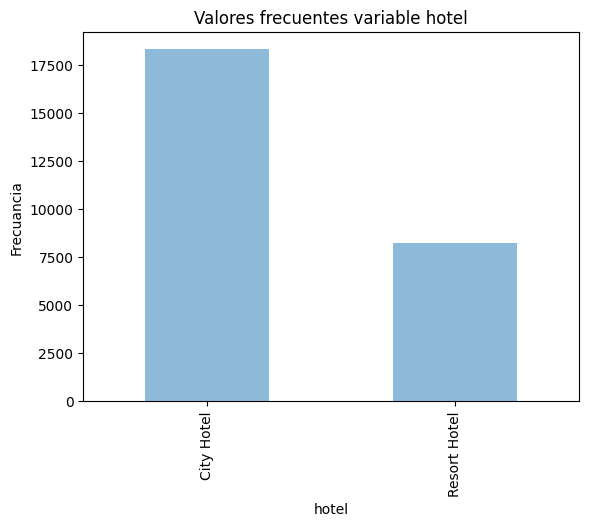

In [238]:
ds_hotels_train['hotel'].value_counts().plot.bar(alpha=0.5, title='Valores frecuentes variable hotel', xlabel='hotel', ylabel='Frecuancia')

ARRIVAL DATE MONTH: varible cuantivativa, mes donde hay mas reservas

<Axes: title={'center': 'Variable arrival date month'}, xlabel='mes', ylabel='Frecuencia'>

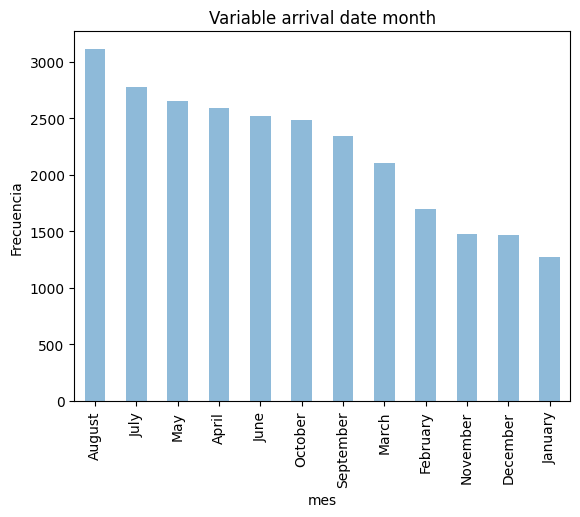

In [239]:
ds_hotels_train['arrival_date_month'].value_counts().plot.bar(alpha=0.5, title='Variable arrival date month', xlabel='mes', ylabel='Frecuencia')

MEAL: varible cuanlitativa, comidas del hotel

<Axes: title={'center': 'Variable meal'}, xlabel='meal', ylabel='Frecuencia'>

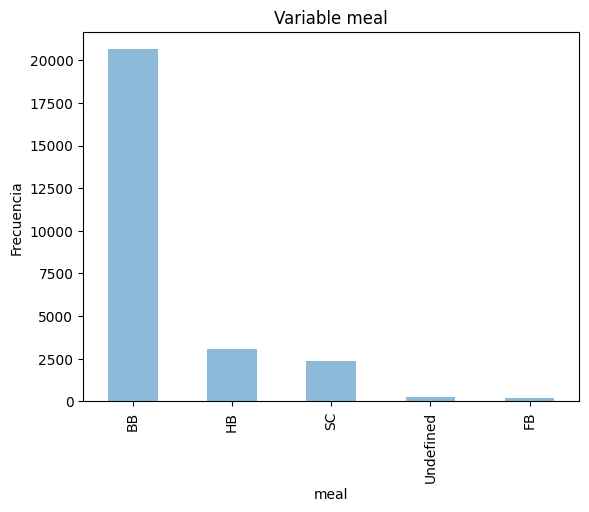

In [240]:
ds_hotels_train['meal'].value_counts().plot.bar(alpha=0.5, title='Variable meal', xlabel='meal', ylabel='Frecuencia')

COUNTRY: variable cualiataiva, país del que pide reservación

In [241]:
ds_hotels_train['country']

0        PRT
1        PRT
2        FRA
3        DEU
4        PRT
        ... 
26530    DEU
26531    GBR
26532    ESP
26533    PRT
26534    ESP
Name: country, Length: 26535, dtype: object

In [242]:
ds_hotels_train.groupby('country').agg(frequency=('country', 'count'))

frequency
country           
AGO             93
ALB              1
AND              1
ARE             13
ARG             44
...            ...
UZB              4
VEN             10
VNM              3
ZAF              6
ZWE              2

[135 rows x 1 columns]

MARKET SEGMENT: varible cualitativa

<Axes: title={'center': 'Variable market_segment'}, xlabel='market_segment', ylabel='Frecuencia'>

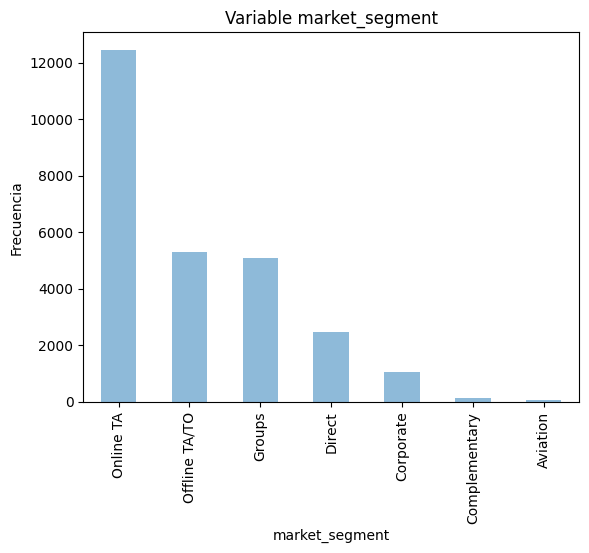

In [243]:
ds_hotels_train['market_segment'].value_counts().plot.bar(alpha=0.5, title='Variable market_segment', xlabel='market_segment', ylabel='Frecuencia')

DISTRIBUTION CHANNEL: varible cualitativa

<Axes: title={'center': 'Variable distribution_channel'}, xlabel='distribution_channel', ylabel='Frecuencia'>

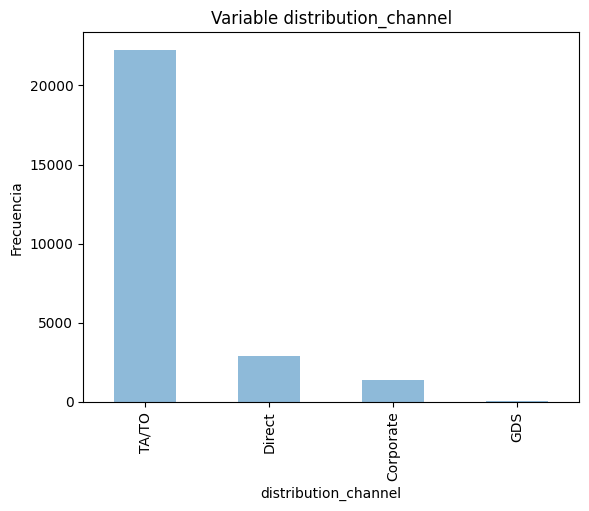

In [244]:
ds_hotels_train['distribution_channel'].value_counts().plot.bar(alpha=0.5, title='Variable distribution_channel', xlabel='distribution_channel', ylabel='Frecuencia')

RESERVED_ROOM_TYPE: variable cualitativa, tipo de habitación reservado

<Axes: title={'center': 'Variable reserved_room_type'}, xlabel='reserved_room_type', ylabel='Frecuencia'>

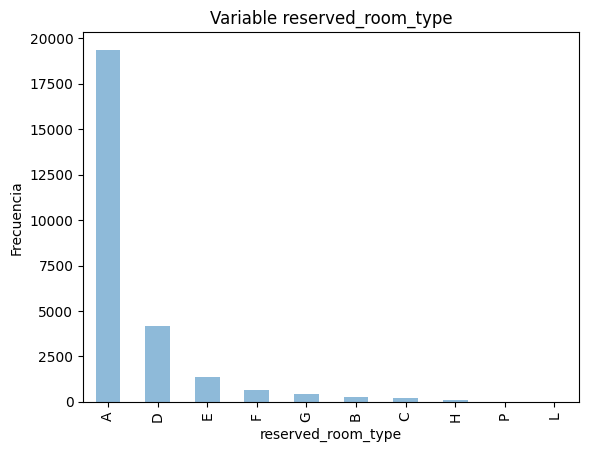

In [245]:
ds_hotels_train['reserved_room_type'].value_counts().plot.bar(alpha=0.5, title='Variable reserved_room_type', xlabel='reserved_room_type', ylabel='Frecuencia')

ASSIGNED_ROOM_TYPE: varible cualitativa, habitación asignada

<Axes: title={'center': 'Variable assigned_room_type'}, xlabel='assigned_room_type', ylabel='Frecuencia'>

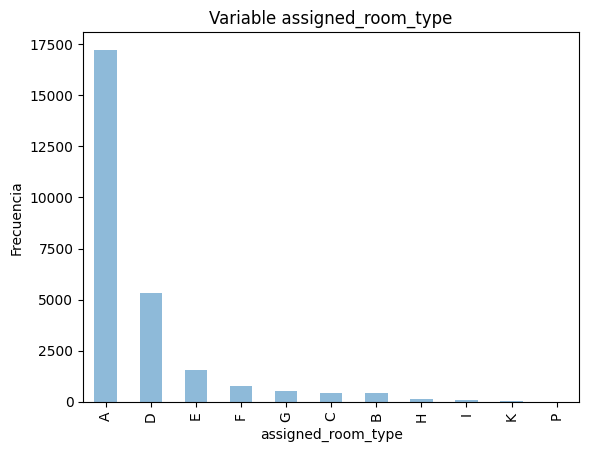

In [246]:
ds_hotels_train['assigned_room_type'].value_counts().plot.bar(alpha=0.5, title='Variable assigned_room_type', xlabel='assigned_room_type', ylabel='Frecuencia')

DEPOSIT_TYPE: varible cualitiva, tipo de deposito

<Axes: title={'center': 'Variable deposit_type'}, xlabel='deposit_type', ylabel='Frecuencia'>

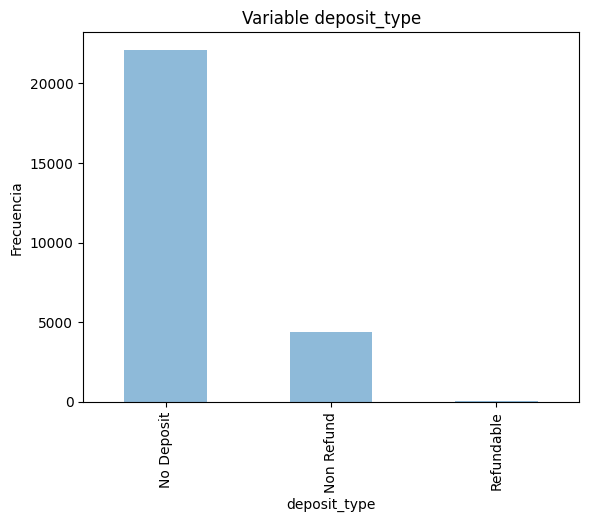

In [247]:
ds_hotels_train['deposit_type'].value_counts().plot.bar(alpha=0.5, title='Variable deposit_type', xlabel='deposit_type', ylabel='Frecuencia')

CUSTOMER TYPE: varible cualitativa, tipo de consumidor 

<Axes: title={'center': 'Variable customer_type'}, xlabel='customer_type', ylabel='Frecuencia'>

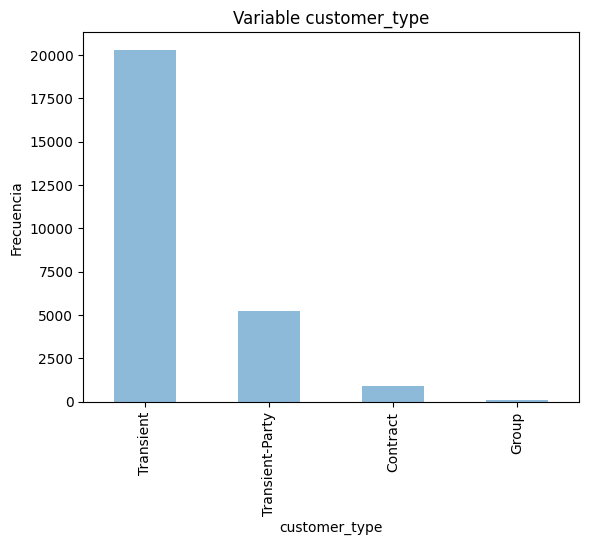

In [248]:
ds_hotels_train['customer_type'].value_counts().plot.bar(alpha=0.5, title='Variable customer_type', xlabel='customer_type', ylabel='Frecuencia')

VARIABLE CUANTITATIVAS lead_time, arrival_date_year, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, booking_changes, agent, company, days_in_waiting_list, adr, required_car_parking_spaces, total_of_special_requests

LEAD TIME: tiempo que trasncurre entre que la reservación hasta la llegada del cliente

In [325]:
print('LEAD TIME')
print('Media :',ds_hotels_train['lead_time'].mean())
print('Mediana:',ds_hotels_train['lead_time'].median())
print('Moda :',ds_hotels_train['lead_time'].mode())

LEAD TIME
Media : 112.24818697204141
Mediana: 78.0
Moda : 0    0
Name: lead_time, dtype: int64


ARRIVAL DATE YEAR: Año de arribo al hotel

In [326]:
print('ARRIVAL DATE YEAR')
print('Media :',ds_hotels_train['arrival_date_year'].mean())
print('Mediana:',ds_hotels_train['arrival_date_year'].median())
print('Moda :',ds_hotels_train['arrival_date_year'].mode())


ARRIVAL DATE YEAR
Media : 2016.1547494064253
Mediana: 2016.0
Moda : 0    2016
Name: arrival_date_year, dtype: int64


ARRIVAL DATE WEEK NUMBER : número de semana que arrivo

In [251]:
print('ARRIVAL DATE WEEK NUMBER')
print('Media :',ds_hotels_train['arrival_date_week_number'].mean())
print('Mediana:',ds_hotels_train['arrival_date_week_number'].median())
print('Moda :',ds_hotels_train['arrival_date_week_number'].mode())

ARRIVAL DATE WEEK NUMBER
Media : 27.183908045977013
Mediana: 27.0
Moda : 0    33
Name: arrival_date_week_number, dtype: int64


ARRIVAL DATE OF MONTH : numero del mes que arrivo

In [252]:
print('ARRIVAL DATE OF MONTH')
print('Media :',ds_hotels_train['arrival_date_day_of_month'].mean())
print('Mediana:',ds_hotels_train['arrival_date_day_of_month'].median())
print('Moda :',ds_hotels_train['arrival_date_day_of_month'].mode())

ARRIVAL DATE OF MONTH
Media : 15.78368192952704
Mediana: 16.0
Moda : 0    17
Name: arrival_date_day_of_month, dtype: int64


STAYS IN WEEKEND NIGHTS: cantidad de veces que se queda en las noches los fines de semana

In [253]:
print('STAYS IN WEEKEND NIGHTS')
print('Media :',ds_hotels_train['stays_in_weekend_nights'].mean())
print('Mediana:',ds_hotels_train['stays_in_weekend_nights'].median())
print('Moda :',ds_hotels_train['stays_in_weekend_nights'].mode())

STAYS IN WEEKEND NIGHTS
Media : 0.9286602600339174
Mediana: 1.0
Moda : 0    0
Name: stays_in_weekend_nights, dtype: int64


STAYS IN WEEK NIGHTS: cantidad de veces que se queda en las noches en la semana             stays_in_week_nights

In [254]:
print('STAYS IN WEEK NIGHTS')
print('Media :',ds_hotels_train['stays_in_week_nights'].mean())
print('Mediana:',ds_hotels_train['stays_in_week_nights'].median())
print('Moda :',ds_hotels_train['stays_in_week_nights'].mode())

STAYS IN WEEK NIGHTS
Media : 2.5205954399849255
Mediana: 2.0
Moda : 0    2
Name: stays_in_week_nights, dtype: int64


ADULT: cantidad de adultos

In [255]:
print('ADULTS')
print('Media :',ds_hotels_train['adults'].mean())
print('Mediana:',ds_hotels_train['adults'].median())
print('Moda :',ds_hotels_train['adults'].mode())

ADULTS
Media : 1.870736762766158
Mediana: 2.0
Moda : 0    2
Name: adults, dtype: int64


CHILDREN:
 

In [256]:
print('CHILDREN')
print('Media :',ds_hotels_train['children'].mean())
print('Mediana:',ds_hotels_train['children'].median())
print('Moda :',ds_hotels_train['children'].mode())

CHILDREN
Media : 0.10062182023742228
Mediana: 0.0
Moda : 0    0.0
Name: children, dtype: float64


BABIES: 

In [257]:
print('BABIES')
print('Media :',ds_hotels_train['babies'].mean())
print('Mediana:',ds_hotels_train['babies'].median())
print('Moda :',ds_hotels_train['babies'].mode())

BABIES
Media : 0.006632749199170907
Mediana: 0.0
Moda : 0    0
Name: babies, dtype: int64


IS REPEATED GUEST

In [258]:
print('IS REPEATED GUEST')
print('Media :',ds_hotels_train['is_repeated_guest'].mean())
print('Mediana:',ds_hotels_train['is_repeated_guest'].median())
print('Moda :',ds_hotels_train['is_repeated_guest'].mode())

IS REPEATED GUEST
Media : 0.027397776521575278
Mediana: 0.0
Moda : 0    0
Name: is_repeated_guest, dtype: int64


PREVIOUS CANCELLATIONS 



In [259]:
print('PREVIOUS CANCELLATIONS')
print('Media :',ds_hotels_train['previous_cancellations'].mean())
print('Mediana:',ds_hotels_train['previous_cancellations'].median())
print('Moda :',ds_hotels_train['previous_cancellations'].mode())

PREVIOUS CANCELLATIONS
Media : 0.10499340493687583
Mediana: 0.0
Moda : 0    0
Name: previous_cancellations, dtype: int64


PREVIOUS BOOKINGS


In [260]:
print('PREVIOUS BOOKINGS NOT CANCELED')
print('Media :',ds_hotels_train['previous_bookings_not_canceled'].mean())
print('Mediana:',ds_hotels_train['previous_bookings_not_canceled'].median())
print('Moda :',ds_hotels_train['previous_bookings_not_canceled'].mode())

PREVIOUS BOOKINGS NOT CANCELED
Media : 0.1120783870359902
Mediana: 0.0
Moda : 0    0
Name: previous_bookings_not_canceled, dtype: int64


BOOKING_CHANGES: 

In [261]:
print('BOOKING CHANGES')
print('Media :',ds_hotels_train['booking_changes'].mean())
print('Mediana:',ds_hotels_train['booking_changes'].median())
print('Moda :',ds_hotels_train['booking_changes'].mode())

BOOKING CHANGES
Media : 0.19604296212549463
Mediana: 0.0
Moda : 0    0
Name: booking_changes, dtype: int64


AGENT: 

In [262]:
print('AGENT')
print('Media :',ds_hotels_train['agent'].mean())
print('Mediana:',ds_hotels_train['agent'].median())
print('Moda :',ds_hotels_train['agent'].mode())

AGENT
Media : 82.75371137579837
Mediana: 10.0
Moda : 0    9.0
Name: agent, dtype: float64


COMPANY


In [263]:
print('COMPANY')
"""print('Media :',ds_hotels_train['company'].mean())
print('Mediana:',ds_hotels_train['company'].median())
print('Moda :',ds_hotels_train['company'].mode())
"""

COMPANY


"print('Media :',ds_hotels_train['company'].mean())\nprint('Mediana:',ds_hotels_train['company'].median())\nprint('Moda :',ds_hotels_train['company'].mode())\n"

DAYS IN WAINTING LIST: days_in_waiting_list

In [264]:
print('DAYS IN WAINTING LIST')
print('Media :',ds_hotels_train['days_in_waiting_list'].mean())
print('Mediana:',ds_hotels_train['days_in_waiting_list'].median())
print('Moda :',ds_hotels_train['days_in_waiting_list'].mode())

DAYS IN WAINTING LIST
Media : 2.387337478801583
Mediana: 0.0
Moda : 0    0
Name: days_in_waiting_list, dtype: int64


ADR: adr, required_car_parking_spaces, total_of_special_requests

In [265]:
print('ADR')
print('Media :',ds_hotels_train['adr'].mean())
print('Mediana:',ds_hotels_train['adr'].median())
print('Moda :',ds_hotels_train['adr'].mode())

ADR
Media : 102.64068023365365
Mediana: 95.0
Moda : 0    62.0
Name: adr, dtype: float64


REQUIRED CAR PARKING SPACES:

In [266]:
print('REQUIRED CAR PARKING SPACES')
print('Media :',ds_hotels_train['required_car_parking_spaces'].mean())
print('Mediana:',ds_hotels_train['required_car_parking_spaces'].median())
print('Moda :',ds_hotels_train['required_car_parking_spaces'].mode())

REQUIRED CAR PARKING SPACES
Media : 0.04590163934426229
Mediana: 0.0
Moda : 0    0
Name: required_car_parking_spaces, dtype: int64


TOTAL OF SPECIAL REQUESTS: 

In [267]:
print('REQUIRED CAR PARKING SPACES')
print('Media :',ds_hotels_train['total_of_special_requests'].mean())
print('Mediana:',ds_hotels_train['total_of_special_requests'].median())
print('Moda :',ds_hotels_train['total_of_special_requests'].mode())

REQUIRED CAR PARKING SPACES
Media : 0.5156208780855474
Mediana: 0.0
Moda : 0    0
Name: total_of_special_requests, dtype: int64


CORRELACION ENTE VARIABLES
            data['A'].corr(data['B'])
> Bloc con sangría



In [268]:
ds_hotels_train.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
days_in_waiting_list              

### **Gráficos**

---



In [269]:
ds_hotels_train_grafs=ds_hotels_train.copy()

In [270]:
ds_hotels_train_grafs.loc[:,"is_canceled"].replace(to_replace=[0,1],value=["No","Yes"],inplace=True)
ds_hotels_train_grafs.loc[:,"is_repeated_guest"].replace(to_replace=[0,1],value=["No","Yes"],inplace=True)

KeyError: 'is_canceled'

El primer gráfico que se hace es uno de barras que compare la cantidad de reservas en cada hotel y las cancelaciones en ambos. Esto se hace porque se cree que de esta forma se obtiene un gráfico claro de una de las cosas más importantes para el hotel, la cantidad de clientes que realmente tuvo.

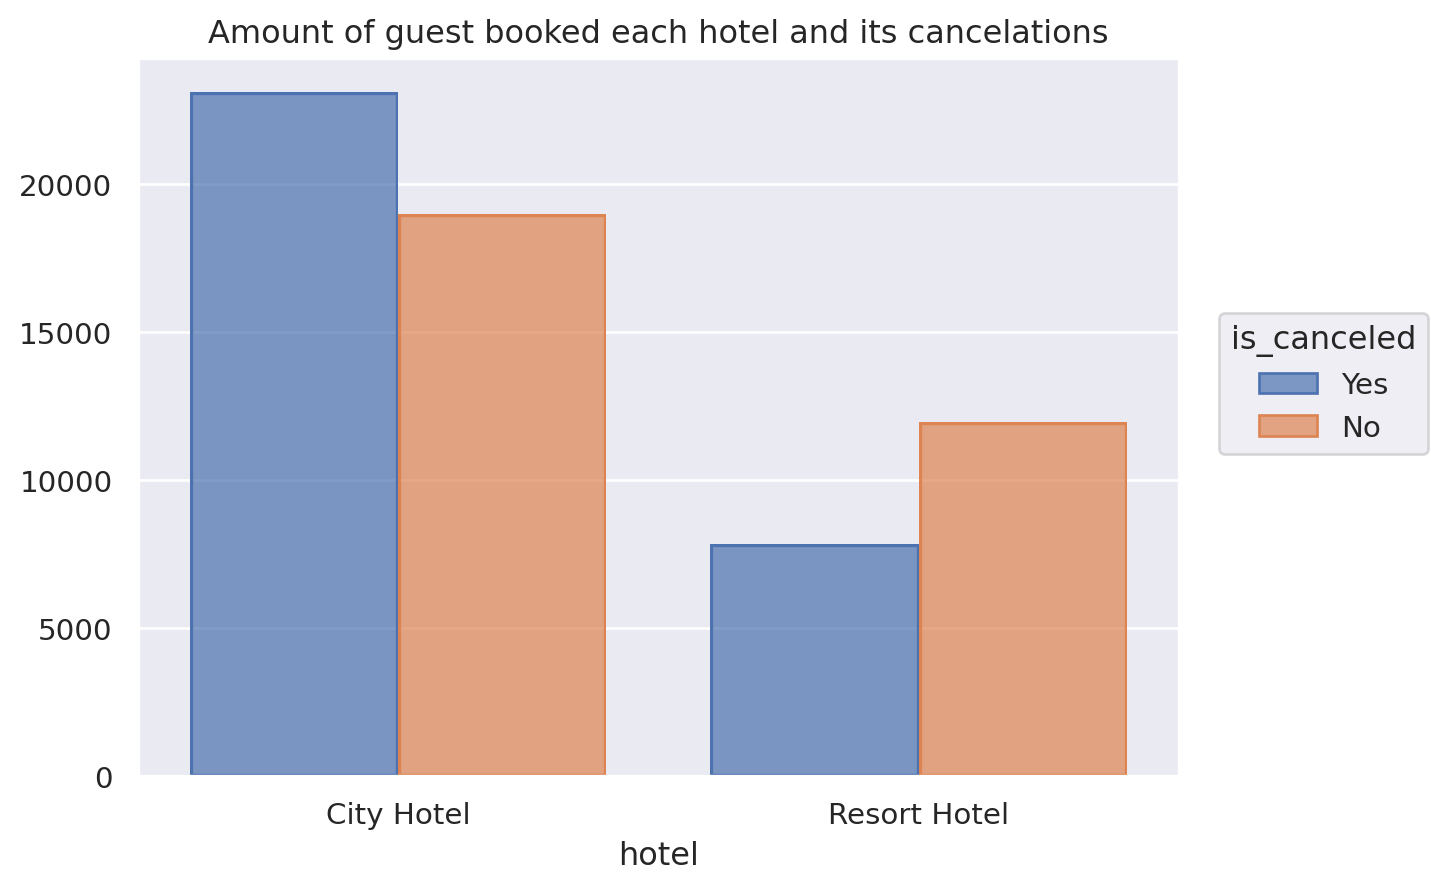

In [ ]:
resort_canceled=so.Plot(ds_hotels_train_grafs, x="hotel", color="is_canceled").add(so.Bar(), so.Hist(), so.Dodge())
resort_canceled.label(x="hotel", y="Count", color="")
resort_canceled.label(color=str.capitalize)
resort_canceled.label(title="Amount of guest booked each hotel and its cancelations")

Para saber si los huespedes están volviendo al hotel se comparó la cantidad de huespedes recurrentes con las cancelaciones en cada hotel.

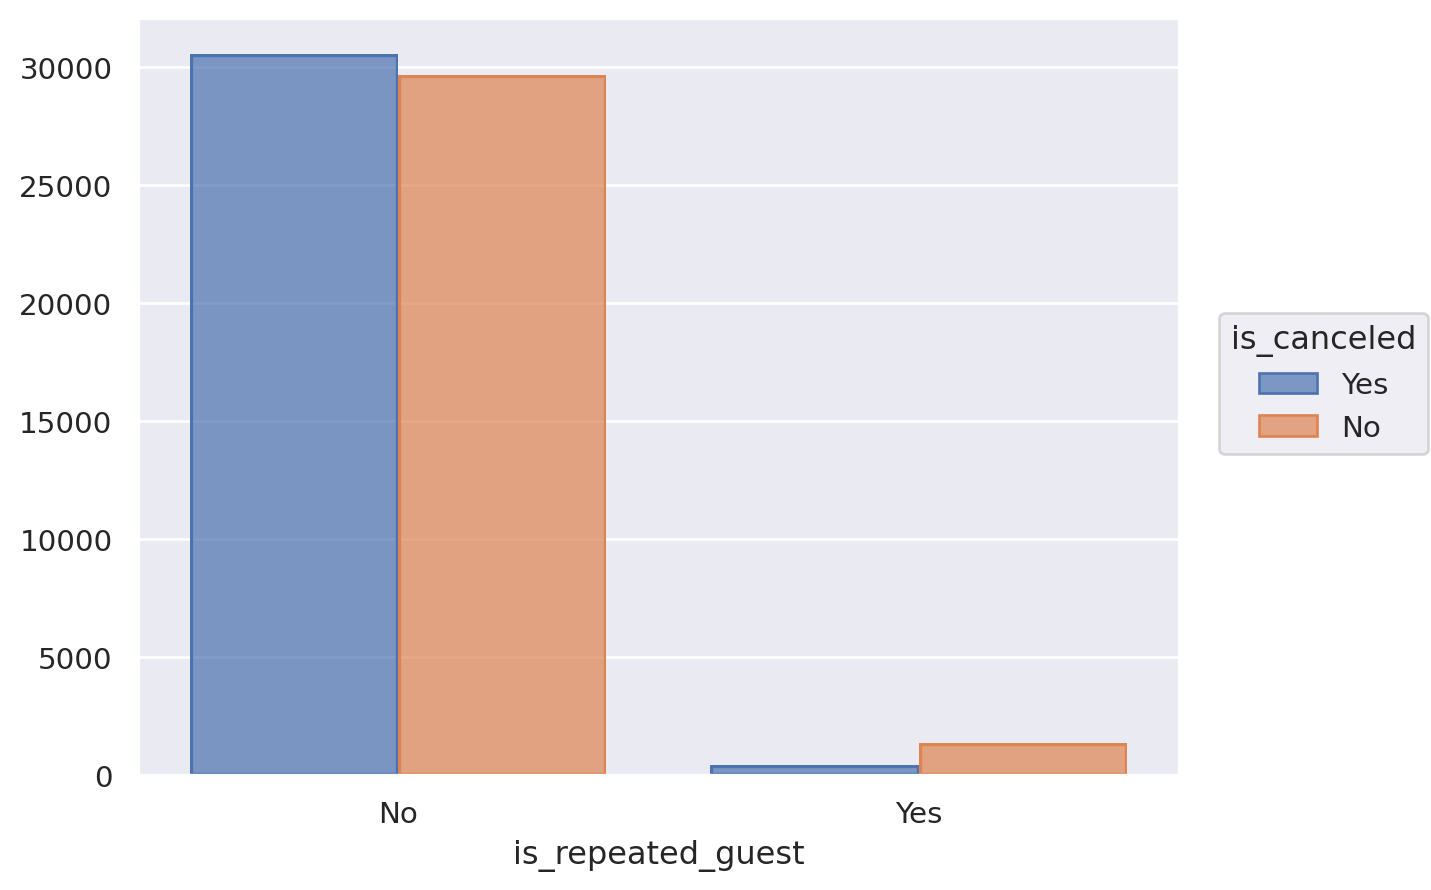

In [ ]:
so.Plot(ds_hotels_train_grafs, x='is_repeated_guest', color="is_canceled").add(so.Bar(), so.Hist(), so.Dodge())

Como este gráfico mostró poca recurrencia se utilizó un gráfico de caja con respecto a los precios para los huespedes recurrentes versus los que atendían por primera ves para ver si se les está haciendo en promedio algún descuento.

ValueError: ignored

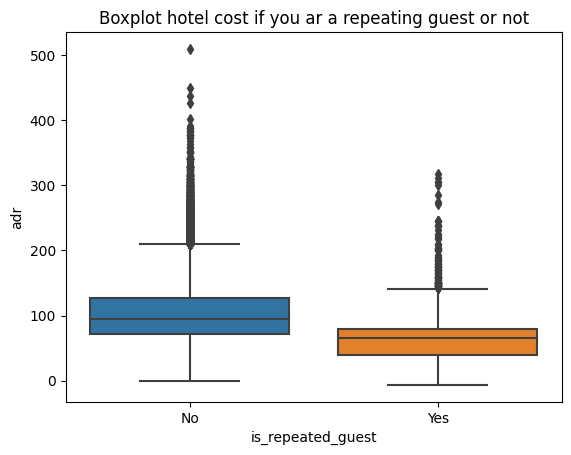

In [ ]:
sns.boxplot(y=ds_hotels_train_grafs["adr"],x=ds_hotels_train_grafs["is_repeated_guest"], data=ds_hotels_train_grafs).set(title="Boxplot hotel cost if you ar a repeating guest or not",xlabel=ds_hotels_train_grafs["adr"],ylabel=ds_hotels_train_grafs["is_repeated_guest"])

Se comparó la cantidad de reservas en días de semana y fin de semana según el hotel

ValueError: ignored

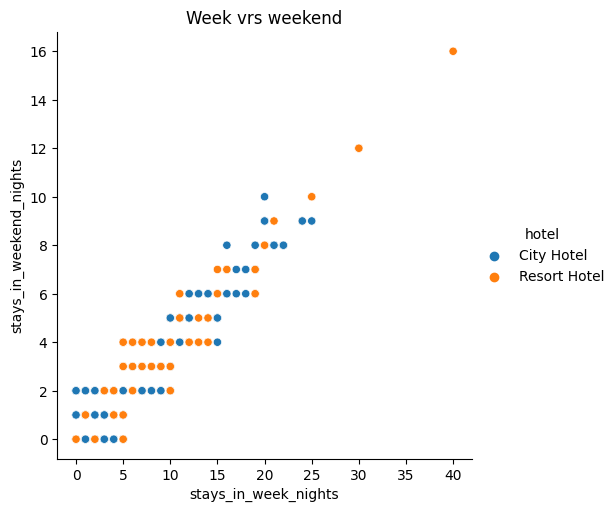

In [ ]:
graf_relplot=sns.relplot(data=ds_hotels_train,x=ds_hotels_train['stays_in_week_nights'],y=ds_hotels_train['stays_in_weekend_nights'], hue="hotel").set(title="Week vrs weekend",xlabel=ds_hotels_train['stays_in_week_nights'],ylabel=ds_hotels_train['stays_in_weekend_nights'])

Por otro lado se buscó ver los precios para los distintos tipos de clientes. Esto se logró mediante un boxplot

ValueError: ignored

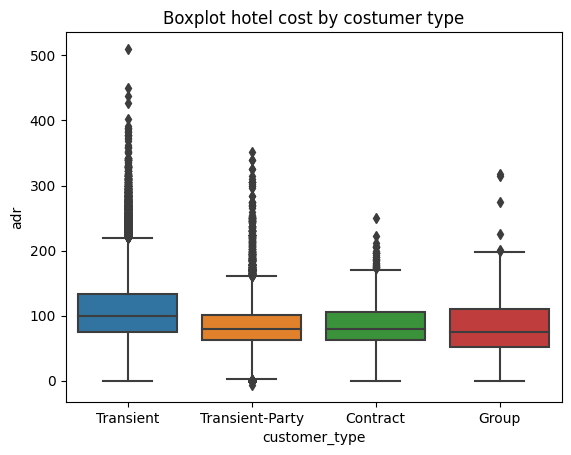

In [ ]:
sns.boxplot(y=ds_hotels_train_grafs["adr"],x=ds_hotels_train_grafs["customer_type"], data=ds_hotels_train_grafs).set(title="Boxplot hotel cost by costumer type",xlabel=ds_hotels_train_grafs["adr"],ylabel=ds_hotels_train_grafs["customer_type"])

Siguiendo la linea se miró que tipo de companía elgía cada tipo de cliente

ValueError: ignored

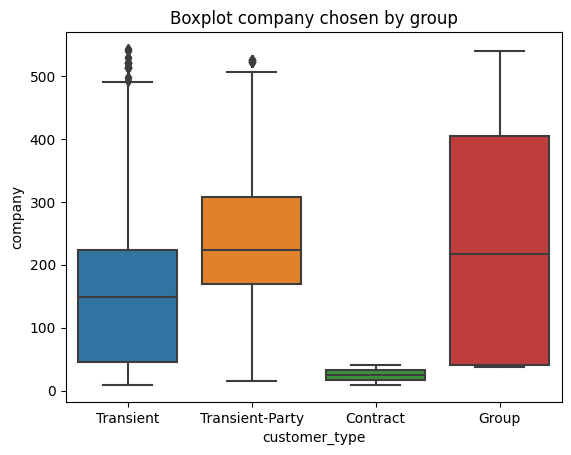

In [ ]:
sns.boxplot(y=ds_hotels_train_grafs["company"],x=ds_hotels_train_grafs["customer_type"], data=ds_hotels_train_grafs).set(title="Boxplot company chosen by group",xlabel=ds_hotels_train_grafs["company"],ylabel=ds_hotels_train_grafs["customer_type"])

Y entonces que tipo de reserva se hacía por cada companía

ValueError: ignored

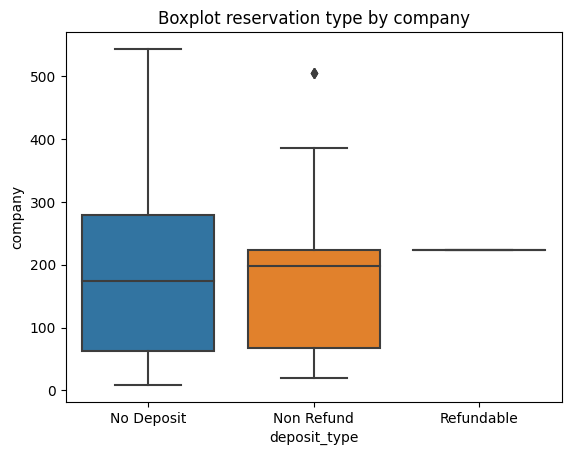

In [ ]:
sns.boxplot(y=ds_hotels_train_grafs["company"],x=ds_hotels_train_grafs["deposit_type"], data=ds_hotels_train_grafs).set(title="Boxplot reservation type by company",xlabel=ds_hotels_train_grafs["company"],ylabel=ds_hotels_train_grafs["deposit_type"])

Como esto parece marcar una baja cantidad de reservas completamente reintegrable. Se observó si por agencia pasaba lo mismo.

ValueError: ignored

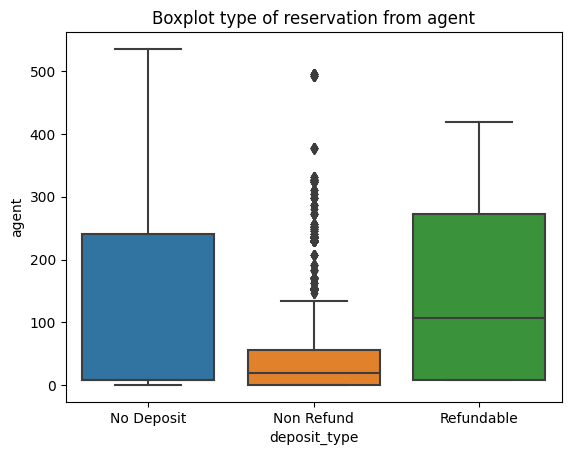

In [ ]:
sns.boxplot(y=ds_hotels_train_grafs["agent"],x=ds_hotels_train_grafs["deposit_type"], data=ds_hotels_train_grafs).set(title="Boxplot type of reservation from agent",xlabel=ds_hotels_train_grafs["agent"],ylabel=ds_hotels_train_grafs["deposit_type"])

Como esto estaba muy ligado con el tipo de reserva que se hizo se la compara con esto también

[Text(0.5, 1.0, 'Changes by reservation type')]

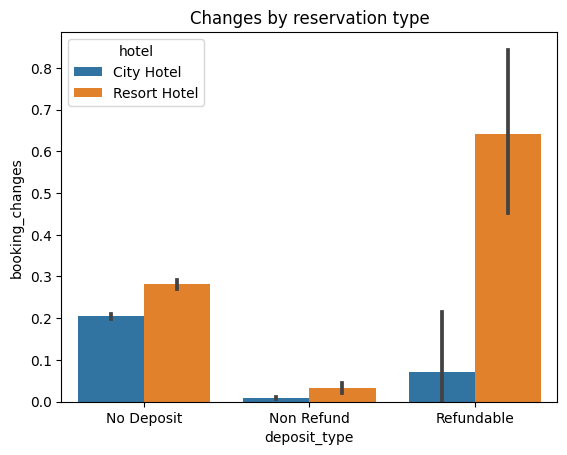

In [ ]:
sns.barplot(data=ds_hotels_train, y="booking_changes", x="deposit_type", hue="hotel").set(title="Changes by reservation type")

Asimismo se hizo un gráficos de barras, donde se compara la cantidad de llegadas al hotel por fecha y año, esto se hace para ver si está creciendo o no

[Text(0.5, 1.0, 'Arrivals by date each year')]

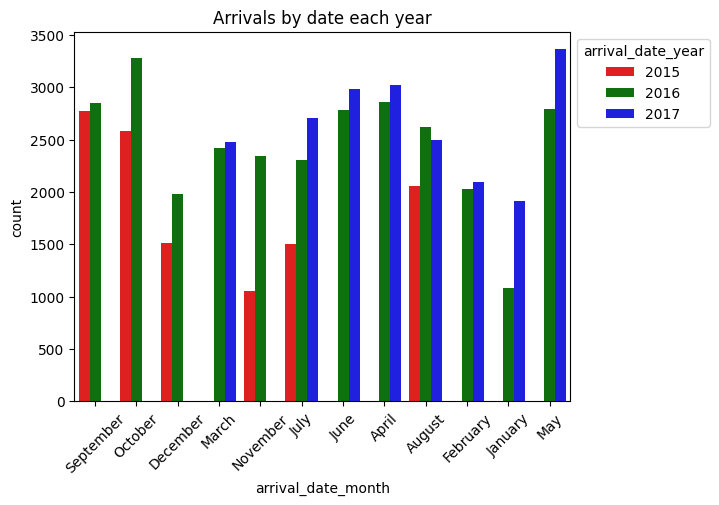

In [ ]:
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
ax=sns.countplot(data=ds_hotels_train, x="arrival_date_month", hue="arrival_date_year", palette=['r','g', 'b'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set(title="Arrivals by date each year")

Además se hizo un boxplot para observar la tarífa según el año y el hotel 

[Text(0.5, 1.0, 'Cost of Night each year')]

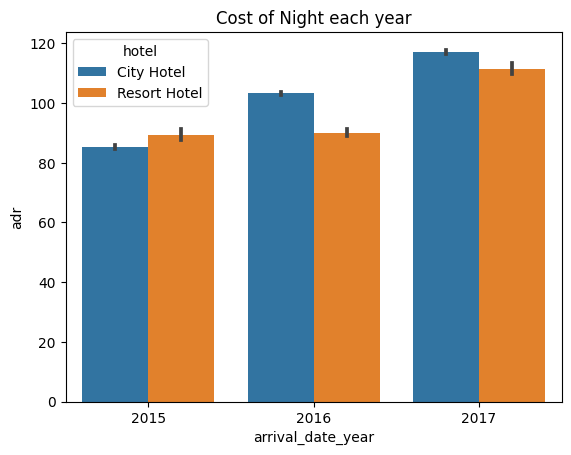

In [ ]:
sns.barplot(data=ds_hotels_train, x="arrival_date_year",y="adr", hue="hotel").set(title="Cost of Night each year")

Después se hicieron comparaciones de respecto de la habitación

ValueError: ignored

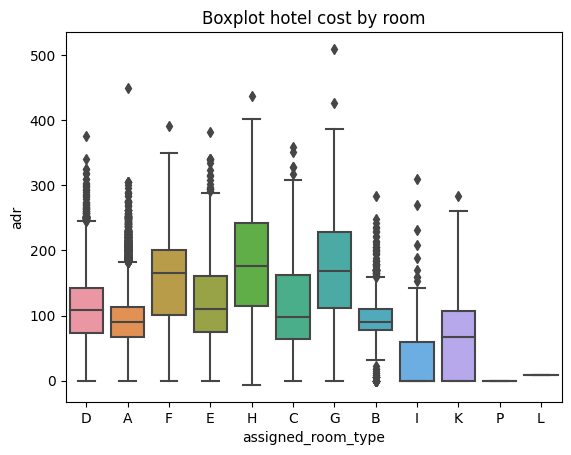

In [ ]:
sns.boxplot(y=ds_hotels_train_grafs["adr"],x=ds_hotels_train_grafs["assigned_room_type"], data=ds_hotels_train_grafs).set(title="Boxplot hotel cost by room",xlabel=ds_hotels_train_grafs["adr"],ylabel=ds_hotels_train_grafs["assigned_room_type"])

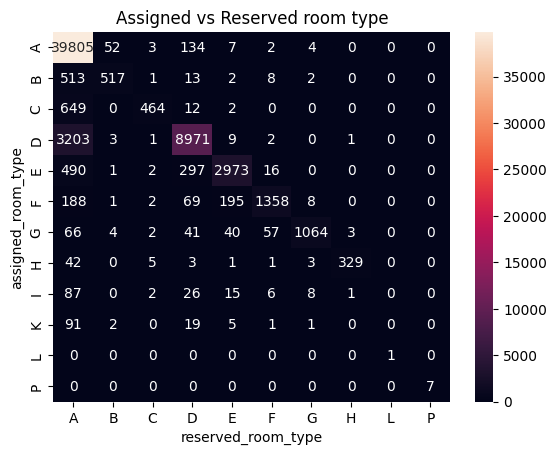

In [ ]:
tabla=pd.crosstab(ds_hotels_train_grafs["assigned_room_type"], ds_hotels_train_grafs["reserved_room_type"])
ax = plt.axes()
grf=sns.heatmap(tabla,annot=True,fmt='g').set(title="Assigned vs Reserved room type")

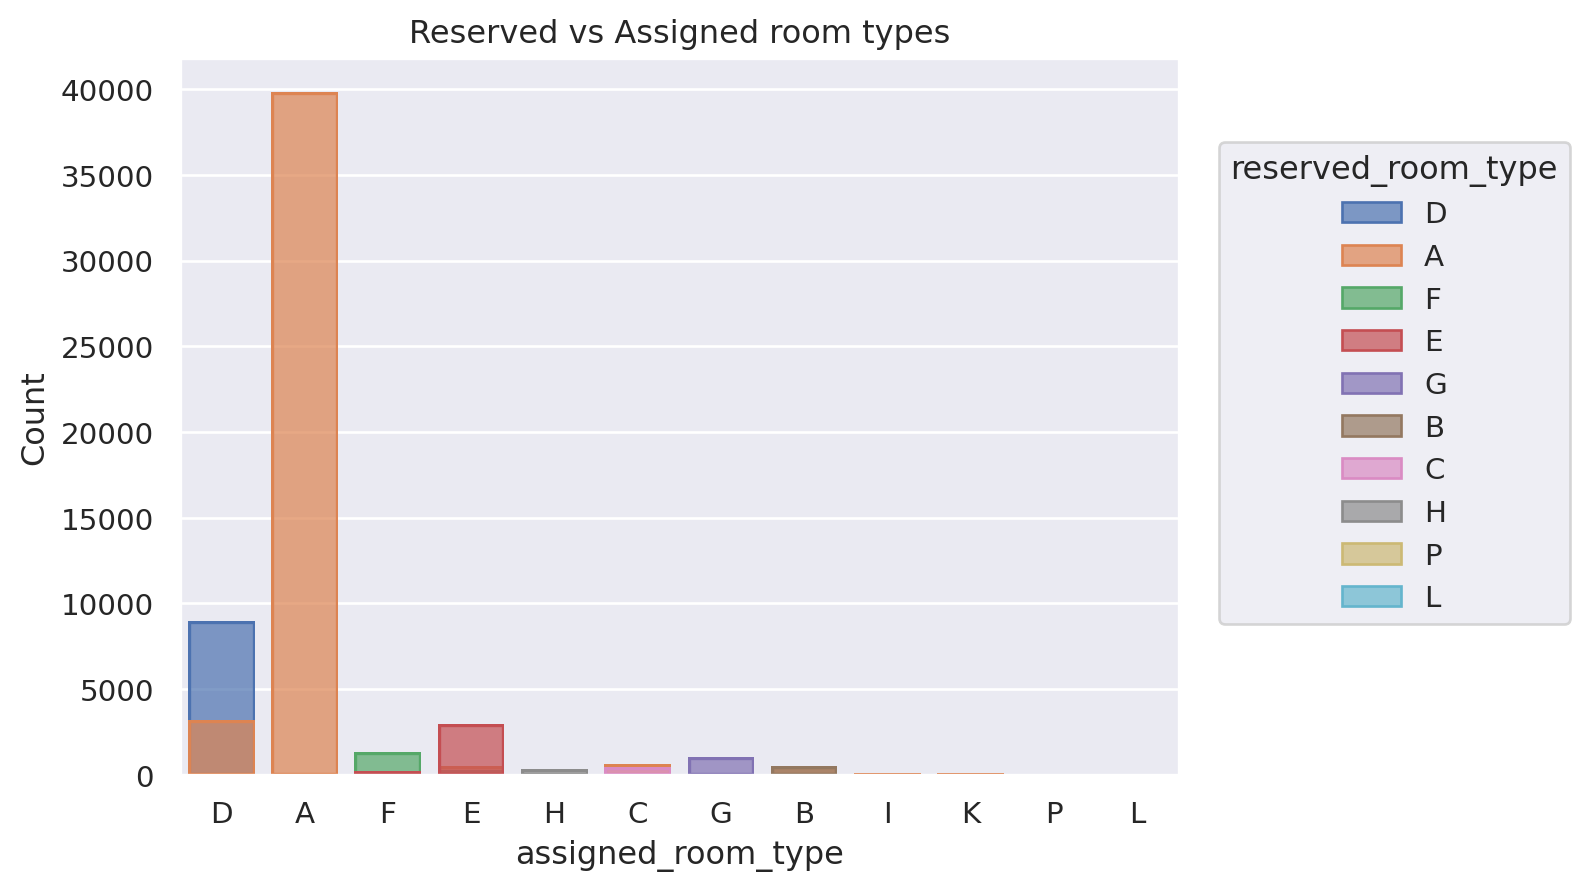

In [ ]:
#so.Plot(ds_hotels_train_grafs, "assigned_room_type", "reserved_room_type").add(so.Line())
so.Plot(ds_hotels_train_grafs, x="assigned_room_type").add(so.Bar(), so.Hist(),color="reserved_room_type").label(title="Reserved vs Assigned room types",y= "Count")

Estas permitieron observar que la habitación más reservada es la A y esta es una de las más baratas en promedio por noche y la que más se otorga si es reservada. Aunque si esta no está disponible se syele otorgar la D, y es por este grán incremento que es la segunda más ocupada

Asimismo, se comparó la historia de cancelaciones, donde se observa que si no se canceló previamente es menos probable que hay cancelado su última reserva.

ValueError: ignored

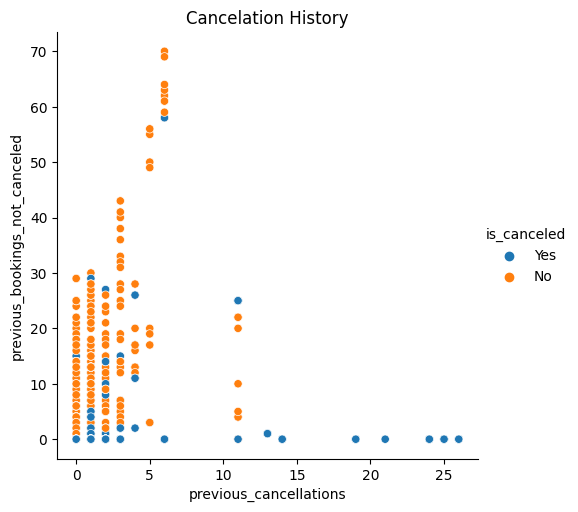

In [ ]:
graf_relplot=sns.relplot(data=ds_hotels_train_grafs,x=ds_hotels_train_grafs['previous_cancellations'],y=ds_hotels_train_grafs['previous_bookings_not_canceled'], hue="is_canceled").set(title="Cancelation History",xlabel=ds_hotels_train_grafs['previous_cancellations'],ylabel=ds_hotels_train_grafs['previous_bookings_not_canceled'])

Otra cosa que es importante para un negocio es ver que tanto están funcionando sus publicidades, entonces se hizo un heatmap para ver cuales estaban teniendo el mayor alcance, luego un gráfico de puntos para ver en que hotel funcionaba cual más.

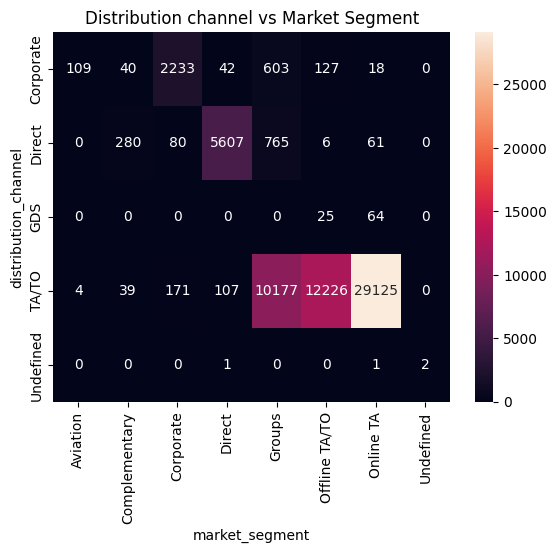

In [ ]:
tabla=pd.crosstab(ds_hotels_train_grafs["distribution_channel"], ds_hotels_train_grafs["market_segment"])
ax = plt.axes()
grf=sns.heatmap(tabla,annot=True,fmt='g').set(title="Heatmap Distribution channel vs Market Segment")

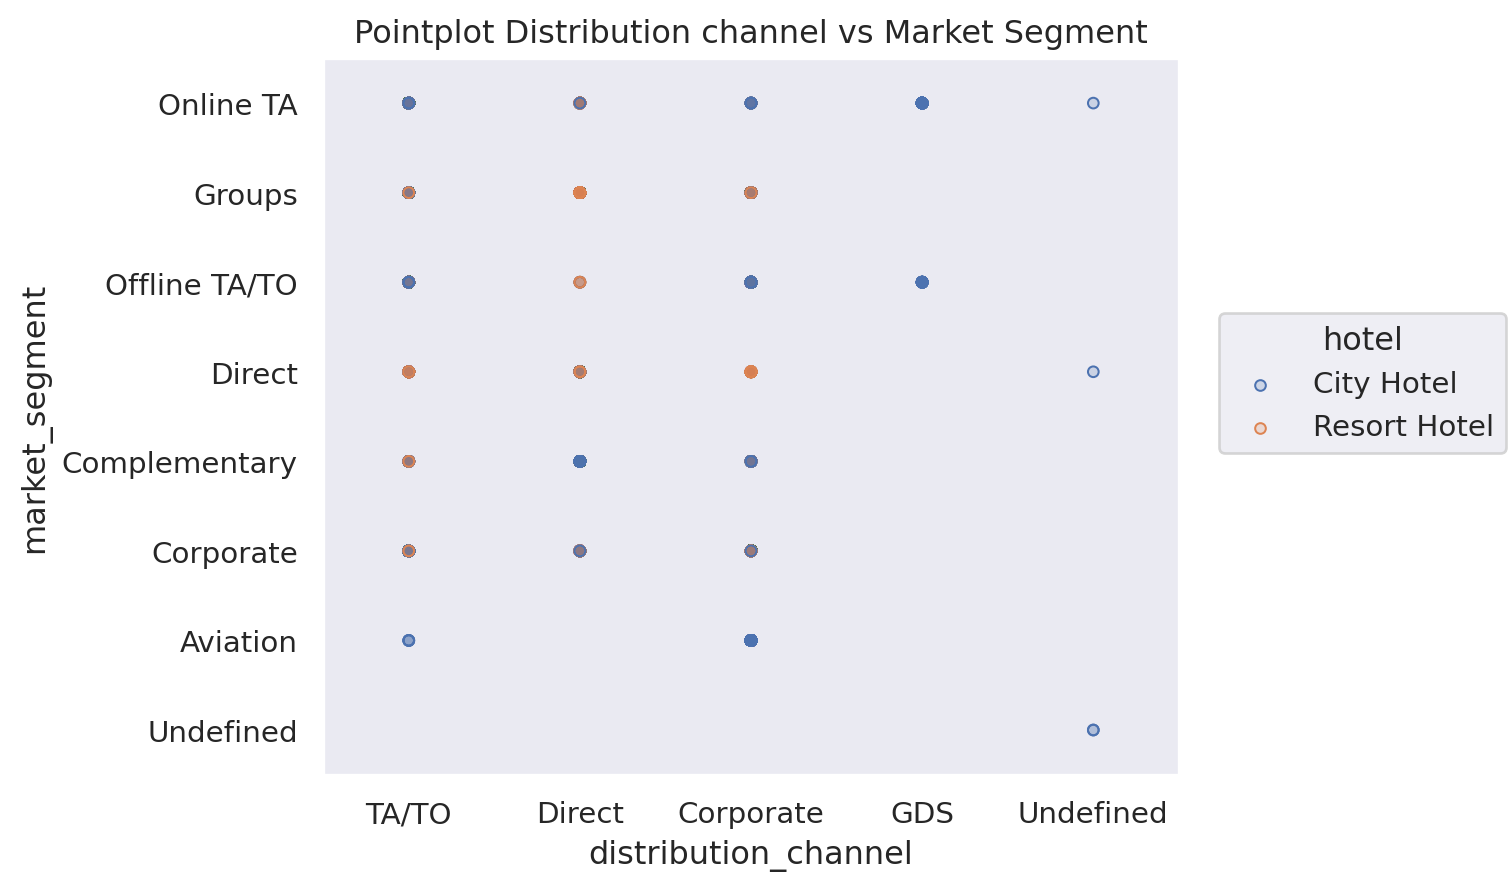

In [ ]:
so.Plot(ds_hotels_train_grafs, "distribution_channel","market_segment").add(so.Dots(), color="hotel").label(title="Pointplot Distribution channel vs Market Segment")

Adicionalmente se quizo comparar los precio según algún dato adicional, en cada hotel. Por lo tanto se comparó ADR con comidas, con estacionamiento y con niños y según fecha.

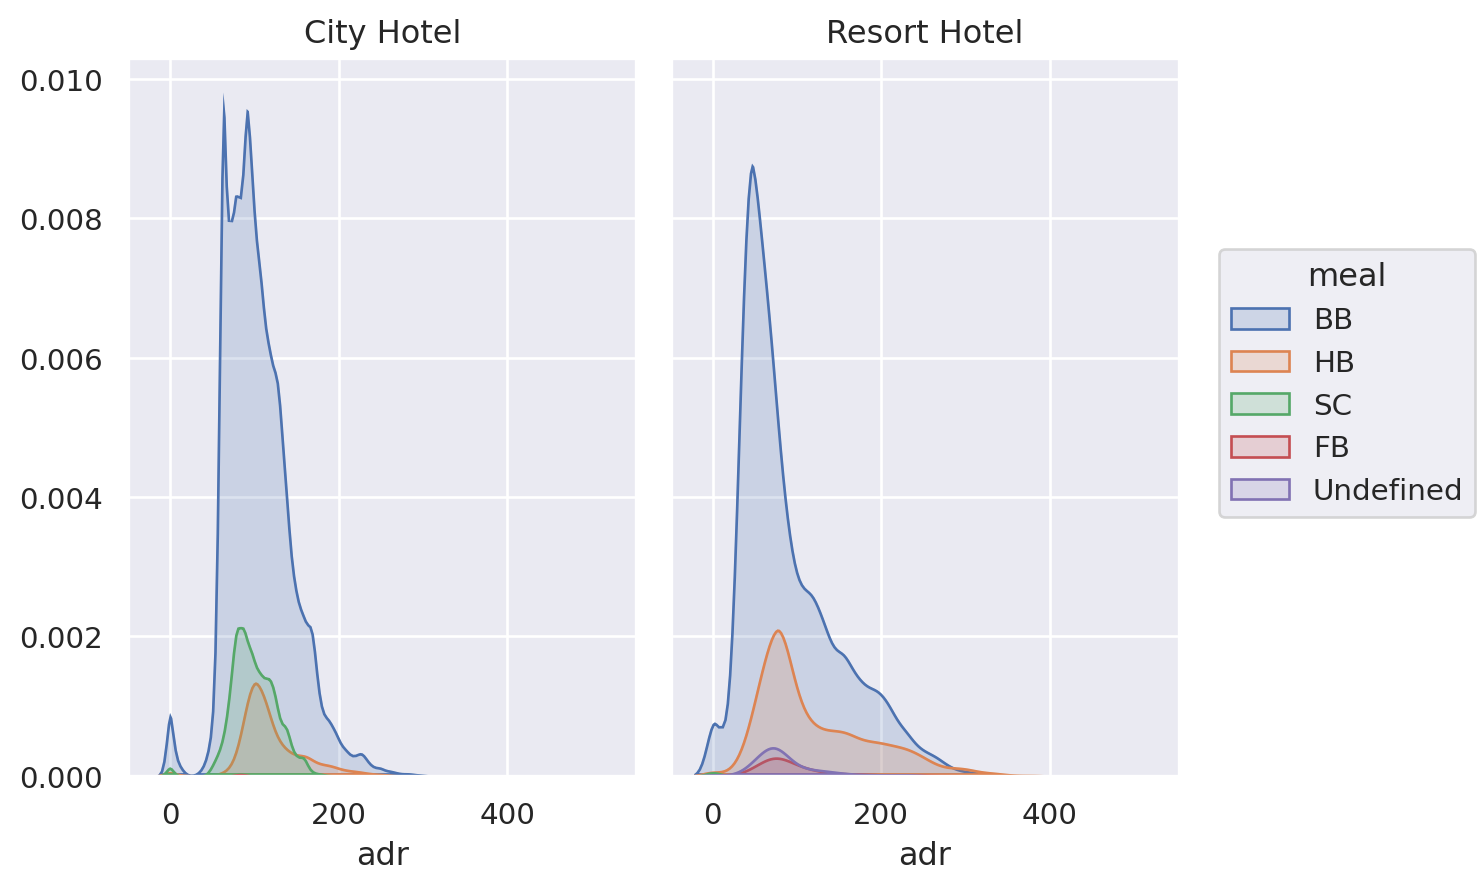

In [ ]:
so.Plot(ds_hotels_train_grafs, x="adr").facet("hotel").add(so.Area(), so.KDE(common_norm=["col"]), color="meal")

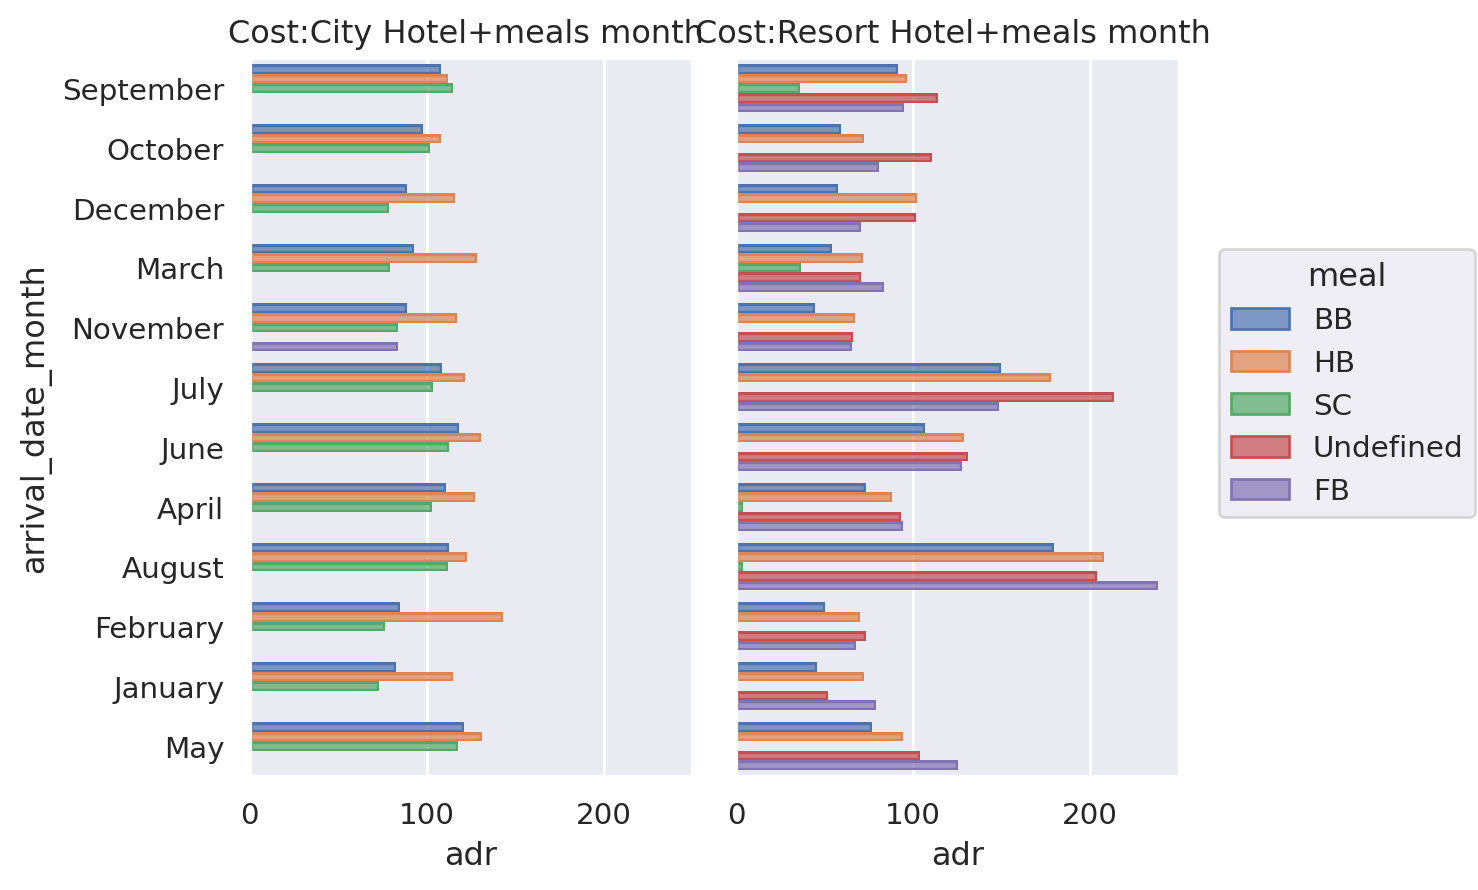

In [ ]:
so.Plot(ds_hotels_train_grafs, "adr","arrival_date_month",).facet("hotel").add(so.Bar(), so.Agg(),so.Dodge(), color="meal").label(title="Cost:{}+meals month ".format)

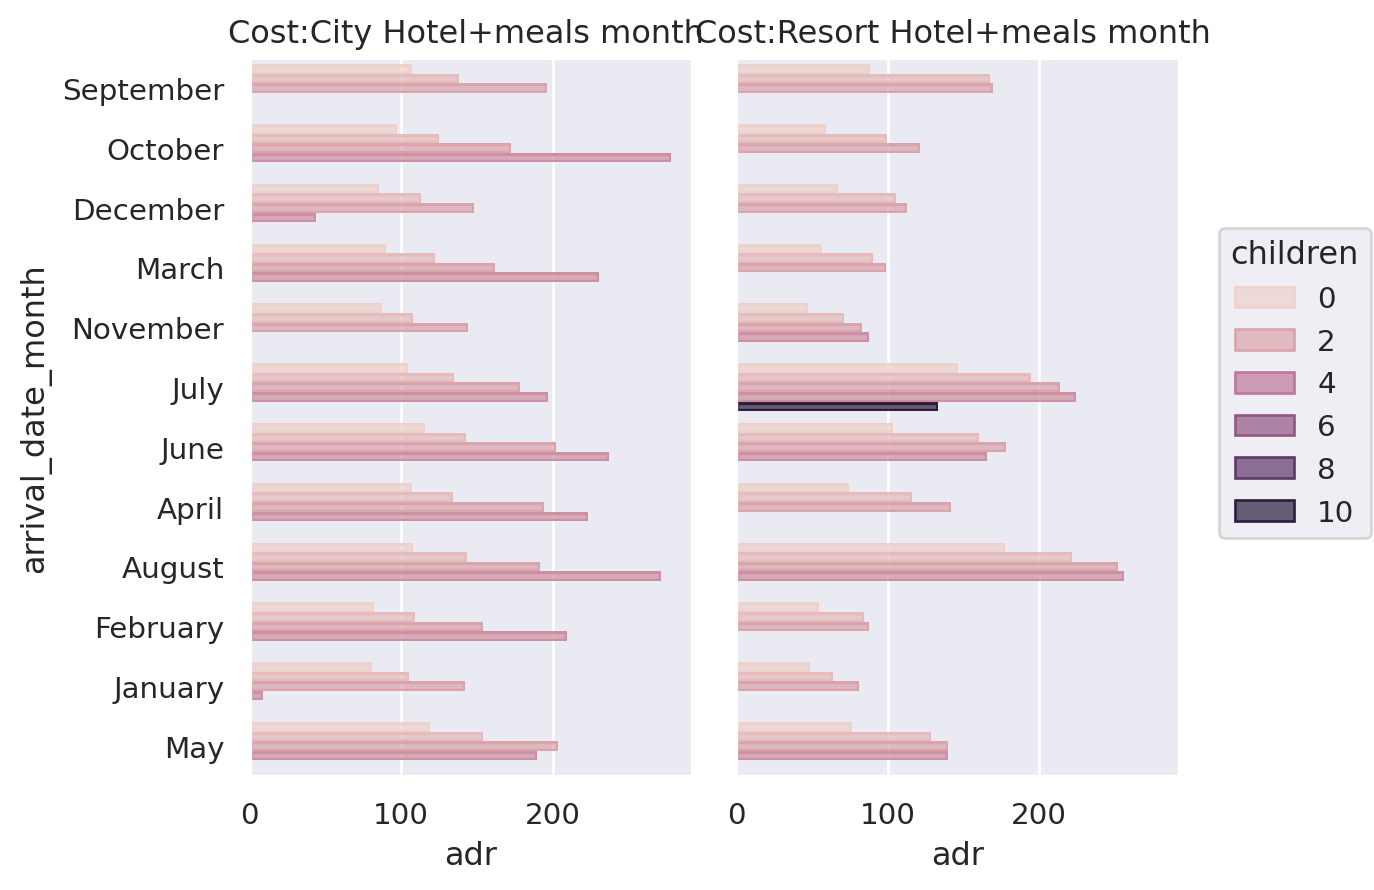

In [ ]:
so.Plot(ds_hotels_train_grafs, "adr","arrival_date_month").facet("hotel").add(so.Bar(), so.Agg(),so.Dodge(), color="children").label(title="Cost:{}+meals month ".format)

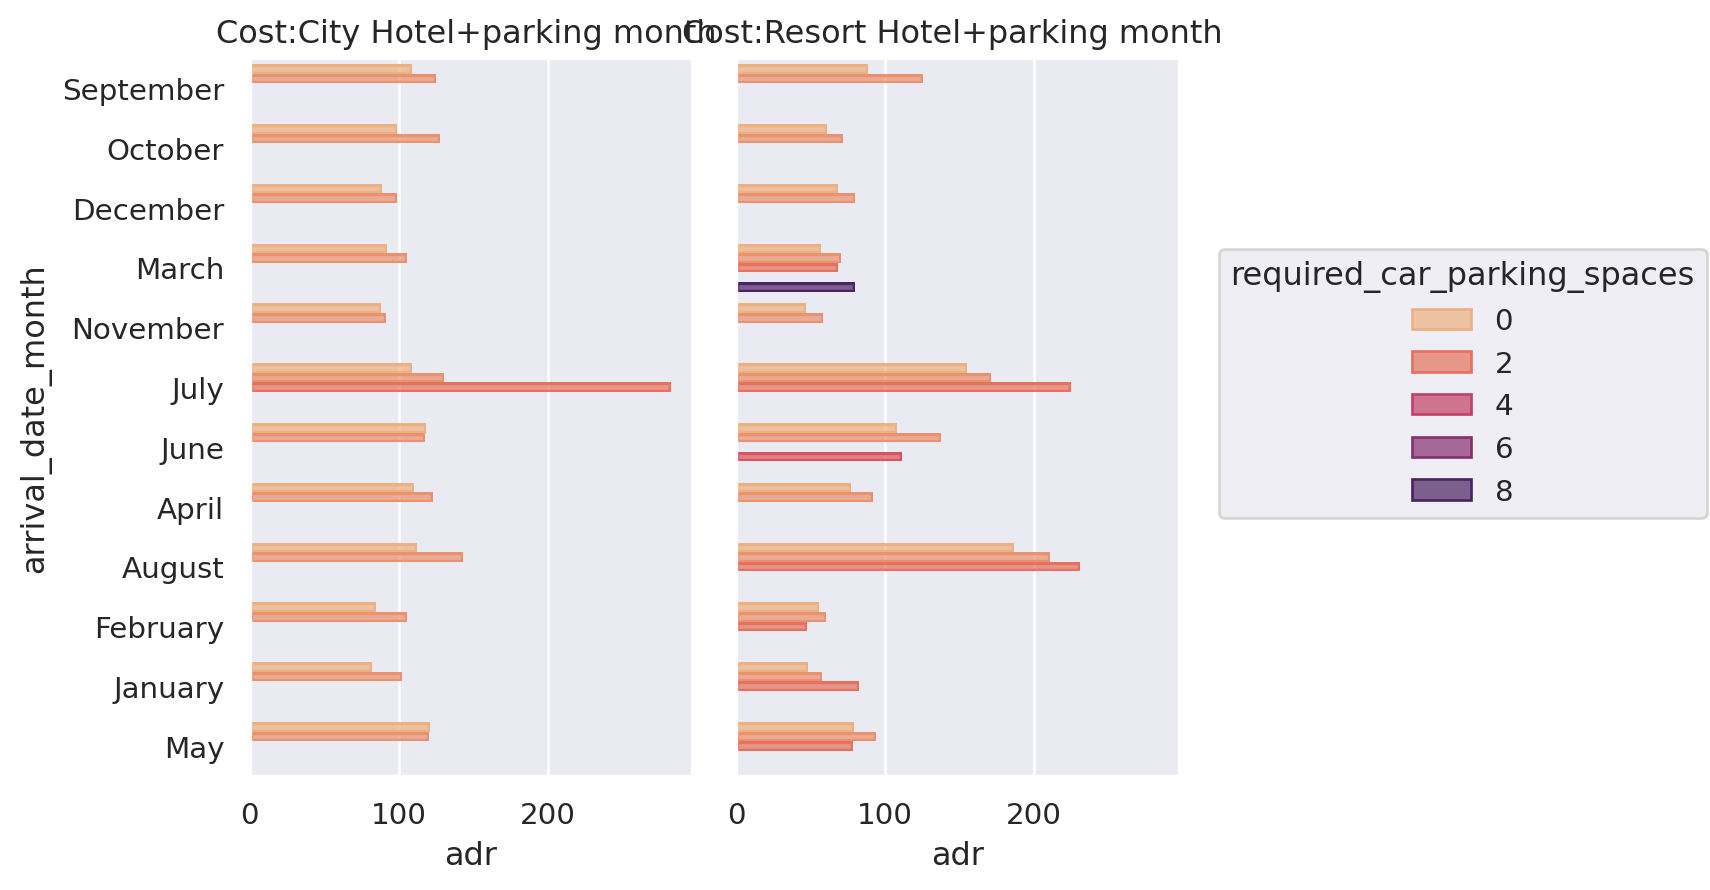

In [ ]:
so.Plot(ds_hotels_train_grafs, "adr","arrival_date_month").facet("hotel").add(so.Bar(), so.Agg(),so.Dodge(), color="required_car_parking_spaces").label(title="Cost:{}+parking month ".format).scale(color="flare")

Se quizo averiguar la cantidad de niños y bebes por hotel

<Axes: xlabel='children', ylabel='count'>

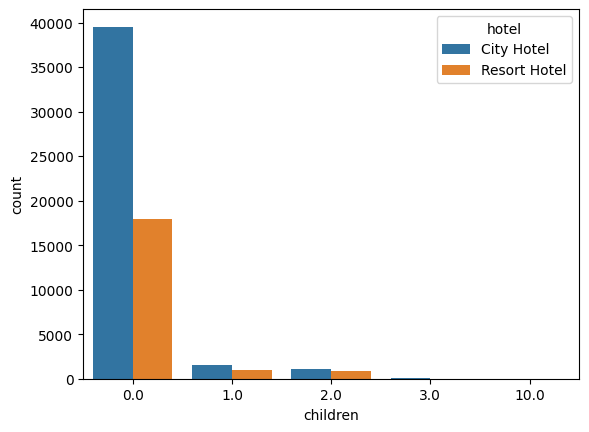

In [ ]:
sns.countplot(x='children', data=ds_hotels_train, hue="hotel")

<Axes: xlabel='babies', ylabel='count'>

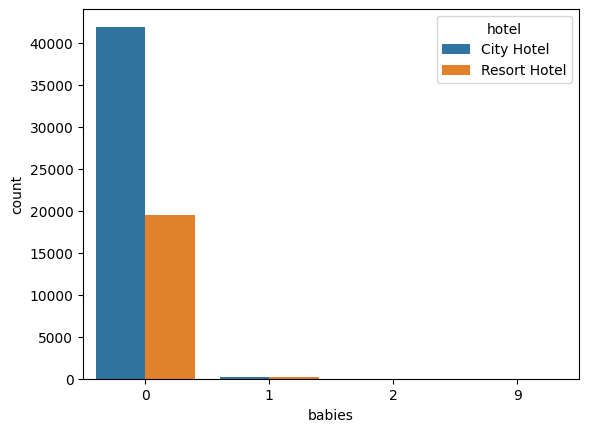

In [ ]:
sns.countplot(x='babies', data=ds_hotels_train, hue="hotel")

Finalmente se quiso observar en que país tenía que publicidad más alcance. 

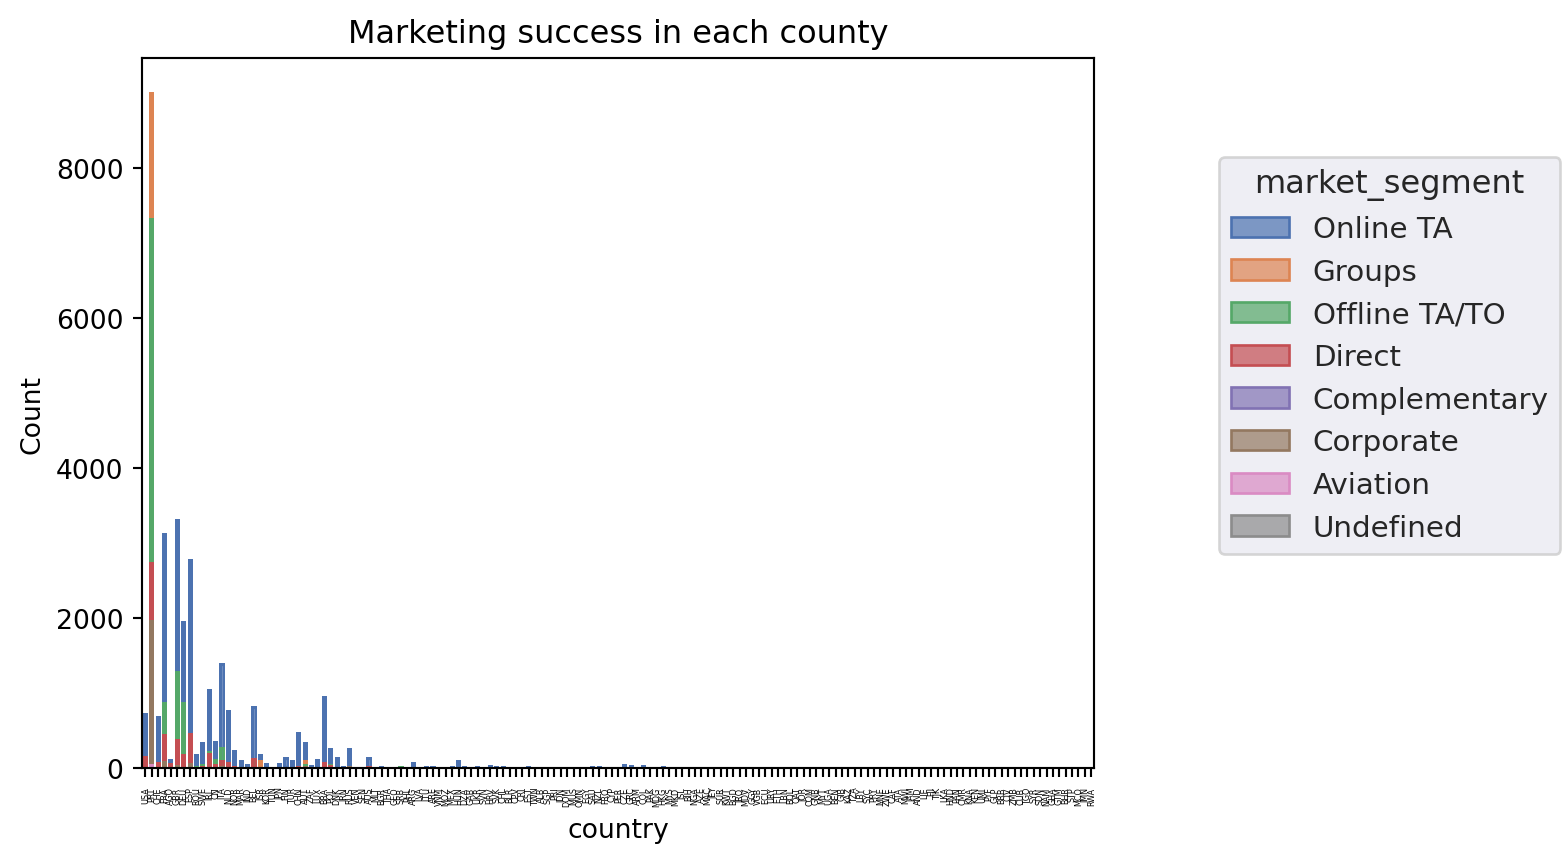

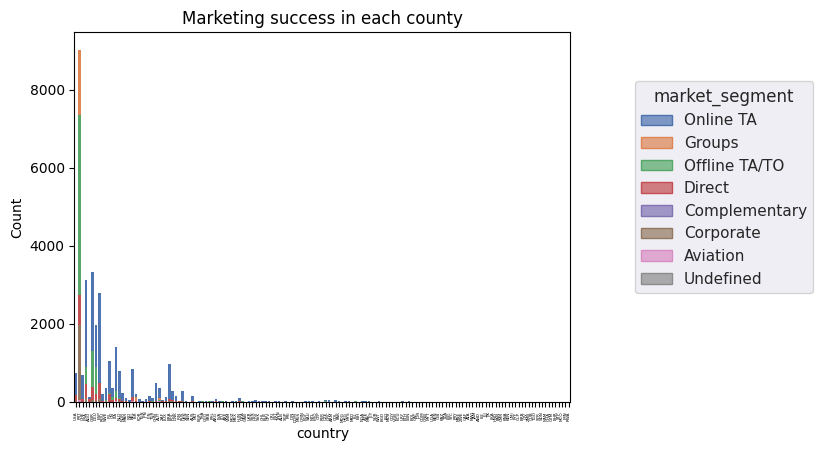

In [ ]:
fig, ax = plt.subplots()
plt.xticks(rotation=90, fontsize=3)
(so.Plot(ds_hotels_train_grafs, x="country")
 .add(so.Bar(), so.Hist(),color="market_segment")
 .label(title="Marketing success in each county",y= "Count")
  .on(ax))

Como la cantidad de países no deja observar corrrectamente lo grafic[ado se eligieron los 10 países cuyas nacionalidades eran las más recurrentes entre los huespedes de los hoteles y se repitió el gráfico.

[Text(0.5, 1.0, 'Marketing success in top 10 countries'),
 Text(0, 0.5, 'Count')]

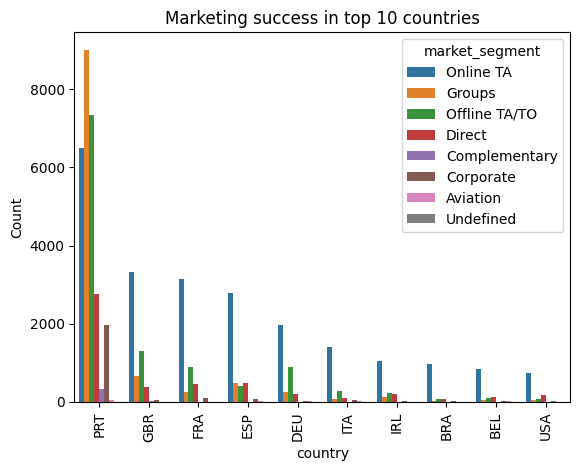

In [ ]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)
(sns.countplot(ds_hotels_train_grafs, x="country",order=pd.value_counts(ds_hotels_train_grafs['country']).iloc[:10].index,hue="market_segment")
 .set(title="Marketing success in top 10 countries",ylabel= "Count"))

# ANALISIS DE DATOS FALTANTES

dataset original: ds_hotels_original

dataset modificado: ds_hotels_modificado

In [5]:
ds_hotels_modificado = ds_hotels_original.copy()

In [6]:
ds_hotels_modificado2 = ds_testing.copy()

**Datos Indefinidos**



In [7]:
tienen_caracter_raro = ds_hotels_original.astype('str').eq('Undefined').any()
tienen_caracter_raro.to_frame('Posee datos indefinidos?')

Posee datos indefinidos?
hotel                                              False
lead_time                                          False
arrival_date_year                                  False
arrival_date_month                                 False
arrival_date_week_number                           False
arrival_date_day_of_month                          False
stays_in_weekend_nights                            False
stays_in_week_nights                               False
adults                                             False
children                                           False
babies                                             False
meal                                                True
country                                            False
market_segment                                      True
distribution_channel                                True
is_repeated_guest                                  False
previous_cancellations                             False
previous_bookings_not_canceled                     False
reserved_room_type                                 False
assigned_room_type                                 False
booking_changes                                    False
deposit_type                                       False
agent                                              False
company                                            False
days_in_waiting_list                               False
customer_type                                      False
adr                                                False
required_car_parking_spaces                        False
total_of_special_requests                          False
reservation_status_date                            False
id                                                 False
is_canceled                                        False

Se observa que las categorías "meal", "market_segment" y "distribution_channel" tienen valores Undefined.

Dichos datos representan los siguientes porcentajes en sus categorías:


In [8]:
columnas = ['meal','market_segment','distribution_channel']
tienen_caracter_raro = ds_hotels_original[columnas].astype('str').eq('Undefined').sum() * 100 / len(ds_hotels_original.index)
tienen_caracter_raro.round(3).to_frame('Porcentaje nulos')

Porcentaje nulos
meal                             0.955
market_segment                   0.003
distribution_channel             0.006

**DATOS NULOS**

In [9]:
tienen_datos_nulos = ds_hotels_original.isnull().any()
tienen_datos_nulos.to_frame('Posee datos nulos?')

Posee datos nulos?
hotel                                        False
lead_time                                    False
arrival_date_year                            False
arrival_date_month                           False
arrival_date_week_number                     False
arrival_date_day_of_month                    False
stays_in_weekend_nights                      False
stays_in_week_nights                         False
adults                                       False
children                                      True
babies                                       False
meal                                         False
country                                       True
market_segment                               False
distribution_channel                         False
is_repeated_guest                            False
previous_cancellations                       False
previous_bookings_not_canceled               False
reserved_room_type                           False
assigned_room_type                           False
booking_changes                              False
deposit_type                                 False
agent                                         True
company                                       True
days_in_waiting_list                         False
customer_type                                False
adr                                          False
required_car_parking_spaces                  False
total_of_special_requests                    False
reservation_status_date                      False
id                                           False
is_canceled                                  False

Las categorias "children", "country", "agent" y "company" poseen valores nulos.

Dichos datos representan los siguientes porcentajes en sus categorías:

In [10]:
columnas = ['children','country', 'agent', 'company']
tienen_datos_nulos = ds_hotels_original[columnas].isnull().sum() * 100 / len(ds_hotels_original.index)
tienen_datos_nulos.round(3).to_frame('Porcentaje nulos')

Porcentaje nulos
children             0.006
country              0.357
agent               12.744
company             94.909



---


**IMPUTACION DE DATOS INDEFINIDOS**

**Distribution channel:** Esta variable es categórica y toma los siguientes valores:


In [11]:
ds_hotels_modificado['distribution_channel'].unique()

array(['TA/TO', 'Direct', 'Corporate', 'GDS', 'Undefined'], dtype=object)

En cierto punto está relacionada con las variables 'agent' y 'company'. Sin embago al no ser tan clara la relación y ser pocos los registros indefinidos, se decide eliminar dichos valores.

In [12]:
ds_hotels_modificado2 = ds_hotels_modificado2.drop(ds_hotels_modificado2[ds_hotels_modificado2['distribution_channel'].astype('str').eq('Undefined')].index)
ds_hotels_modificado2.reset_index(drop=True, inplace=True)
# La linea de arriba resetea el indice, sin ésta siguen apareciendo las filas borradas
columnas = ['meal','market_segment','distribution_channel']
tienen_caracter_raro = ds_hotels_modificado2[columnas].astype('str').eq('Undefined').sum() * 100 / len(ds_hotels_modificado2.index)
tienen_caracter_raro.round(3).to_frame('Porcentaje nulos')

Porcentaje nulos
meal                             0.897
market_segment                   0.000
distribution_channel             0.000

In [13]:
ds_hotels_modificado = ds_hotels_modificado.drop(ds_hotels_modificado[ds_hotels_modificado['distribution_channel'].astype('str').eq('Undefined')].index)
ds_hotels_modificado.reset_index(drop=True, inplace=True)
# La linea de arriba resetea el indice, sin ésta siguen apareciendo las filas borradas
columnas = ['meal','market_segment','distribution_channel']
tienen_caracter_raro = ds_hotels_modificado[columnas].astype('str').eq('Undefined').sum() * 100 / len(ds_hotels_modificado.index)
tienen_caracter_raro.round(3).to_frame('Porcentaje nulos')

Porcentaje nulos
meal                             0.955
market_segment                   0.000
distribution_channel             0.000

**Market segment:** Los valores indefinidos de esta variable estaban incluidos en los de 'distribution_channel'. El análisis es análogo y se decide que permanezcan fuera del dataset.

**Meal:** Esta variable es categórica y toma los siguientes valores:

In [14]:
ds_hotels_modificado['meal'].unique()

array(['BB', 'HB', 'SC', 'Undefined', 'FB'], dtype=object)

En este caso, los valores 'SC' u 'Undefined' representan lo mismo, una reserva sin paquete de comida.
Se decide unificarlas en la de mayor cantidad de valores, que es SC:

In [15]:
columnas = ['meal']
tienen_caracter_raro = ds_hotels_modificado2[columnas].astype('str').eq('SC').sum()
tienen_caracter_raro.round(3).to_frame('Cantidad SC')

Cantidad SC
meal         2369

In [16]:
columnas = ['meal']
tienen_caracter_raro = ds_hotels_modificado[columnas].astype('str').eq('SC').sum()
tienen_caracter_raro.round(3).to_frame('Cantidad SC')

Cantidad SC
meal         5556

In [17]:
columnas = ['meal']
tienen_caracter_raro = ds_hotels_modificado2[columnas].astype('str').eq('Undefined').sum()
tienen_caracter_raro.round(3).to_frame('Cantidad Undefined')

Cantidad Undefined
meal                 238

In [18]:
columnas = ['meal']
tienen_caracter_raro = ds_hotels_modificado[columnas].astype('str').eq('Undefined').sum()
tienen_caracter_raro.round(3).to_frame('Cantidad Undefined')

Cantidad Undefined
meal                 591

In [19]:
ds_hotels_modificado2.loc[ds_hotels_modificado2['meal'].astype('str').eq('Undefined'), 'meal'] = 'SC'

In [20]:
ds_hotels_modificado.loc[ds_hotels_modificado['meal'].astype('str').eq('Undefined'), 'meal'] = 'SC'

Chequeo que estén resueltos los datos indefinidos:

In [21]:
columnas = ['meal','market_segment','distribution_channel']
tienen_caracter_raro = ds_hotels_modificado2[columnas].astype('str').eq('Undefined').sum() * 100 / len(ds_hotels_modificado2.index)
tienen_caracter_raro.round(3).to_frame('Porcentaje nulos')

Porcentaje nulos
meal                               0.0
market_segment                     0.0
distribution_channel               0.0

In [22]:
columnas = ['meal','market_segment','distribution_channel']
tienen_caracter_raro = ds_hotels_modificado[columnas].astype('str').eq('Undefined').sum() * 100 / len(ds_hotels_modificado.index)
tienen_caracter_raro.round(3).to_frame('Porcentaje nulos')

Porcentaje nulos
meal                               0.0
market_segment                     0.0
distribution_channel               0.0



---
**IMPUTACION DE DATOS NULOS**


Vuelvo a revisarlos:

In [23]:
columnas = ['children','country', 'agent', 'company']
tienen_datos_nulos = ds_hotels_modificado2[columnas].isnull().sum()
tienen_datos_nulos.round(3).to_frame('Registros nulos')

Registros nulos
children                0
country                95
agent                3363
company             25218

In [24]:
columnas = ['children','country', 'agent', 'company']
tienen_datos_nulos = ds_hotels_modificado[columnas].isnull().sum()
tienen_datos_nulos.round(3).to_frame('Registros nulos')

Registros nulos
children                0
country               221
agent                7888
company             58757

**Children**: Dichos registros coincidieron con los que fueron eliminados anteriormente. El porcentaje faltante era despreciable, por lo que se confirma esa decisión.

**Country:** Esta variable es categórica. Faltan 221 datos, se pueden considerar como "no informados" un una nueva categoría 'NOC'

In [25]:
ds_hotels_modificado2.loc[ds_hotels_modificado2['country'].isnull(), 'country'] = 'NOC'

In [26]:
ds_hotels_modificado.loc[ds_hotels_modificado['country'].isnull(), 'country'] = 'NOC'

**Agent:** Falta una cantidad significativa que representa cerca del 13%.

In [27]:
columnas = ['agent']
tienen_datos_nulos = ds_hotels_modificado[columnas].isnull().sum()* 100 / len(ds_hotels_modificado.index)
tienen_datos_nulos.round(3).to_frame('Porcentaje nulos')

Porcentaje nulos
agent            12.741

En este caso se decide completar estos valores nulos con 0, para seguir la regla numérica de la categoría agents. Esto es concecuencia de que todo el resto de los agents son números, como ningúno de estos es 0 se decide clasificar a 0 como Undifiened

In [28]:
ds_hotels_modificado2.loc[ds_hotels_modificado2['agent'].isnull(), 'agent'] = 0

In [29]:
ds_hotels_modificado.loc[ds_hotels_modificado['agent'].isnull(), 'agent'] = 0

<Axes: >

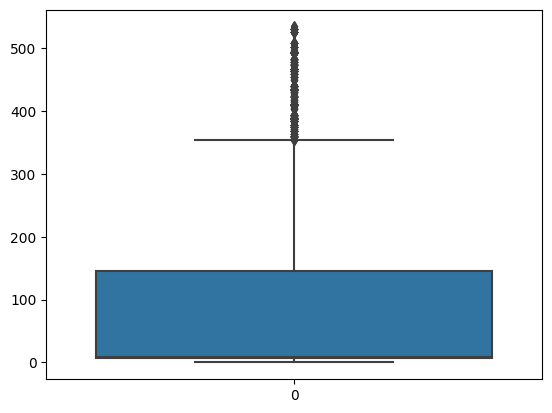

In [30]:
sns.boxplot(ds_hotels_modificado.agent)

In [31]:
#Cuartiles
Q1_altura=np.quantile(ds_hotels_modificado.agent,0.25)
Q3_altura=np.quantile(ds_hotels_modificado.agent,0.75)

#Rango intercuartil
IQR_altura=Q3_altura-Q1_altura

#Limite inferior Outliers
out_inf=Q1_altura-1.5*IQR_altura
out_sup=Q3_altura+1.5*IQR_altura
print(out_inf)
print(out_sup)

-201.5
354.5


**Company:** Falta cerca del 95% de los valores, la mayoría del dataset. Considero que dado la falta de datos, esta columna se puede eliminar.

In [32]:
ds_hotels_modificado2 = ds_hotels_modificado2.drop('company', axis=1)

In [33]:
ds_hotels_modificado = ds_hotels_modificado.drop('company', axis=1)

---

Chequeo las variables numéricas






In [34]:
columnas_con_numeros = ['lead_time','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','adults', 'children', 'babies', 'is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']
ds_hotels_modificado2[columnas_con_numeros].head()
(ds_hotels_modificado2[columnas_con_numeros] < 0).any().to_frame('Menor que 0 ?')

Menor que 0 ?
lead_time                               False
arrival_date_year                       False
arrival_date_week_number                False
arrival_date_day_of_month               False
stays_in_weekend_nights                 False
adults                                  False
children                                False
babies                                  False
is_repeated_guest                       False
previous_cancellations                  False
previous_bookings_not_canceled          False
booking_changes                         False
days_in_waiting_list                    False
adr                                     False
required_car_parking_spaces             False
total_of_special_requests               False

In [35]:
columnas_con_numeros = ['lead_time','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','adults', 'children', 'babies', 'is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','is_canceled']
ds_hotels_modificado[columnas_con_numeros].head()
(ds_hotels_modificado[columnas_con_numeros] < 0).any().to_frame('Menor que 0 ?')

Menor que 0 ?
lead_time                               False
arrival_date_year                       False
arrival_date_week_number                False
arrival_date_day_of_month               False
stays_in_weekend_nights                 False
adults                                  False
children                                False
babies                                  False
is_repeated_guest                       False
previous_cancellations                  False
previous_bookings_not_canceled          False
booking_changes                         False
days_in_waiting_list                    False
adr                                      True
required_car_parking_spaces             False
total_of_special_requests               False
is_canceled                             False

Se encontró un valor numérico negativo en el campo "adr", lo visualizamos para ver el contexto

In [36]:
(ds_hotels_modificado[ds_hotels_modificado['adr'] < 0])

hotel  lead_time  arrival_date_year arrival_date_month  \
21124  Resort Hotel        195               2017              March   

       arrival_date_week_number  arrival_date_day_of_month  \
21124                        10                          5   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
21124                        4                     6       2       0.0  ...   

       deposit_type  agent days_in_waiting_list    customer_type   adr  \
21124    No Deposit  273.0                    0  Transient-Party -6.38   

       required_car_parking_spaces  total_of_special_requests  \
21124                            0                          0   

       reservation_status_date                                    id  \
21124               2017-03-15  869f627f-35fb-42b0-8376-12869739d76e   

      is_canceled  
21124           0  

[1 rows x 31 columns]

Dado que el ADR es la tarifa diaria promedio, no tiene sentido que tome un valor negativo.
No se puede volver a calcular porque se desconoce el monto abonado.

Necesitamos otro método para sustituir el valor.
Aplico un método iterativo.
Ahora el adr fue calculado como 94.74

In [37]:
#Valor de datos comparables
ds_hotels_modificado.at[21124, 'adr'] = 210

In [38]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

columnas=['lead_time','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']
df_eliminar_nans_op3=ds_hotels_modificado[columnas].copy()

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=20, verbose=0, random_state=0) #imputation_order='roman'
df_eliminar_nans_op3_completo=imp.fit_transform(df_eliminar_nans_op3)
pd.DataFrame(df_eliminar_nans_op3_completo, columns=columnas).iloc[21124]
#df_eliminar_nans_op3_completo

lead_time                          195.0
arrival_date_year                 2017.0
arrival_date_week_number            10.0
arrival_date_day_of_month            5.0
stays_in_weekend_nights              4.0
stays_in_week_nights                 6.0
adults                               2.0
children                             0.0
babies                               0.0
previous_cancellations               0.0
previous_bookings_not_canceled       2.0
booking_changes                      2.0
days_in_waiting_list                 0.0
adr                                210.0
required_car_parking_spaces          0.0
total_of_special_requests            0.0
Name: 21124, dtype: float64

Analizo la distribucion nueva de Adr contra la anterior

In [132]:
import dtreeviz.trees as dtreeviz

#modelos y métricas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score#, precision_recall_curve, roc_curve,
from sklearn.metrics import confusion_matrix, classification_report
#preprocesamiento
from sklearn.preprocessing import MinMaxScaler

#configuración warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# ANÁLISIS VALORES ATÍPICOS

## Univariado

Análisis con boxplot

In [39]:
import scipy.stats as st

### ADR

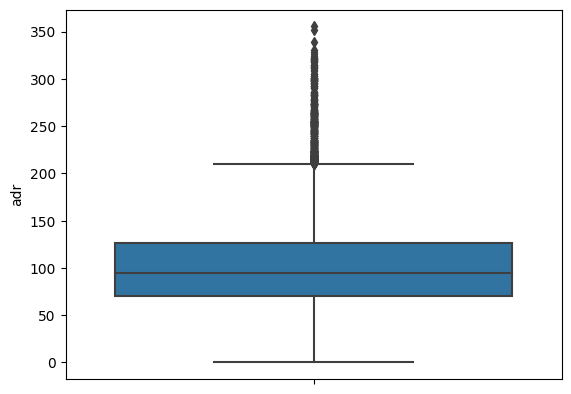

In [ ]:
sns.boxplot(y=ds_hotels_modificado.adr)
plt.show()

In [ ]:
#Cuartiles
#Redondeo para que funcione
#y=(ds_hotels_modificado.adr.round()).astype('Int64', errors='ignore')
y=ds_hotels_modificado.adr

Q1=np.quantile(y,0.25)
Q3=np.quantile(y,0.75)

#Rango intercuartil
IQR=Q3-Q1

#Limite inferior Outliers
out_inf=Q1-1.5*IQR
out_sup=Q3+1.5*IQR
print(out_inf)
print(out_sup)

-14.0
210.0


In [ ]:
ds_hotels_modificado[ds_hotels_modificado['adr'] > 210]['adr']

2        229.00
111      227.25
173      213.00
217      240.00
238      302.50
          ...  
61830    305.00
61845    232.33
61867    233.00
61885    263.00
61899    220.00
Name: adr, Length: 2025, dtype: float64

#### Lead Time

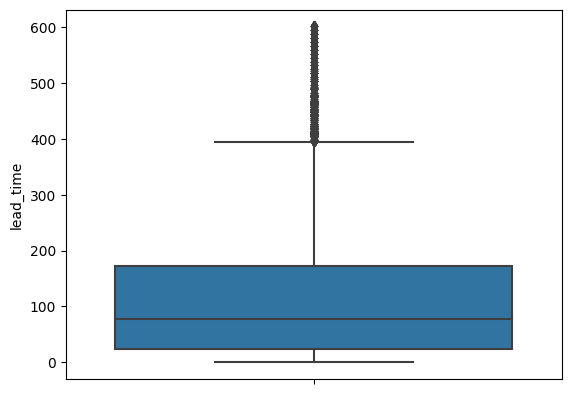

In [ ]:
sns.boxplot(y=ds_hotels_modificado.lead_time)
plt.show()

In [ ]:
#Cuartiles
y=ds_hotels_modificado.lead_time

Q1=np.quantile(y,0.25)
Q3=np.quantile(y,0.75)

#Rango intercuartil
IQR=Q3-Q1

#Limite inferior Outliers
out_inf=Q1-1.5*IQR
out_sup=Q3+1.5*IQR
print(out_inf)
print(out_sup)


-200.5
395.5


### Z-Score

### ADR

In [ ]:


df = pd.DataFrame()
df['z_score']=st.zscore(ds_hotels_modificado.adr)
df['adr'] = ds_hotels_modificado.adr
df2 = pd.DataFrame()
df2['z_score']=st.zscore(ds_hotels_modificado2.adr)
df2['adr'] = ds_hotels_modificado2.adr

In [ ]:
df[df['z_score']>3]


z_score    adr
238    4.197179  302.5
307    3.704316  279.0
320    3.926629  289.6
439    4.291557  307.0
481    3.500879  269.3
...         ...    ...
61685  3.033183  247.0
61741  4.153136  300.4
61826  3.536533  271.0
61830  4.249611  305.0
61885  3.368750  263.0

[773 rows x 2 columns]

In [ ]:
df[df['z_score']<-3]
df2[df2['z_score']<-3]

Empty DataFrame
Columns: [z_score, adr]
Index: []

In [ ]:
#z-score modificado Edad
mediana=np.median(df.adr)
MAD=np.median(np.absolute(df.adr-mediana))

df['z_score']=(df.adr - mediana)*0.6745/MAD
#z-score modificado Edad
mediana=np.median(df2.adr)
MAD=np.median(np.absolute(df2.adr-mediana))

df2['z_score']=(df2.adr - mediana)*0.6745/MAD



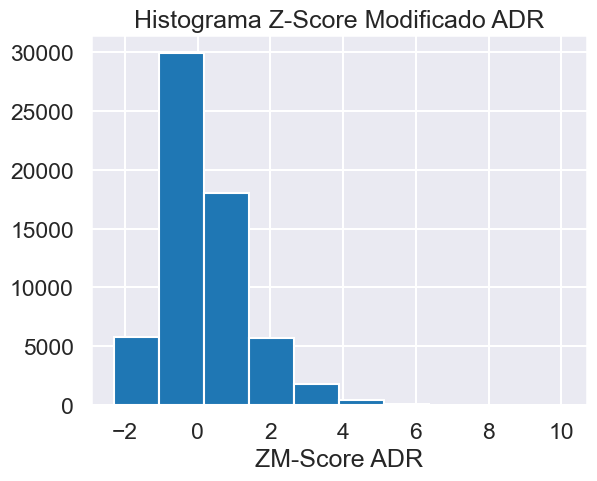

In [ ]:
plt.hist(df.z_score)
plt.title('Histograma Z-Score Modificado ADR')
plt.xlabel('ZM-Score ADR')
plt.show()

In [ ]:
ds_dm=ds_hotels_modificado.copy()
ds_dm['adr']=df['adr']
ds2_dm=ds_hotels_modificado2.copy()
ds2_dm['adr']=df2['adr']

In [ ]:
df['z_score_lt']=st.zscore(ds_hotels_modificado.lead_time)
df['lead_time'] = ds_hotels_modificado.lead_time

In [ ]:
df[df['z_score_lt']>3]

z_score     adr  z_score_lt  lead_time
15     0.429647  112.67    3.185999        465
51    -0.782945   62.80    3.402768        489
95    -0.802397   62.00    3.086647        454
426   -0.121575   90.00    3.691793        521
576   -0.782945   62.80    4.640155        626
...         ...     ...         ...        ...
61575 -1.060137   51.40    3.655664        517
61691 -0.680822   67.00    3.213095        468
61757 -0.782945   62.80    3.465992        496
61779 -0.802397   62.00    3.086647        454
61786 -0.782945   62.80    3.845337        538

[732 rows x 4 columns]

In [ ]:
mediana=np.median(df.lead_time)
MAD=np.median(np.absolute(df.lead_time-mediana))

df['z_score_lt']=(df.lead_time - mediana)*0.6745/MAD

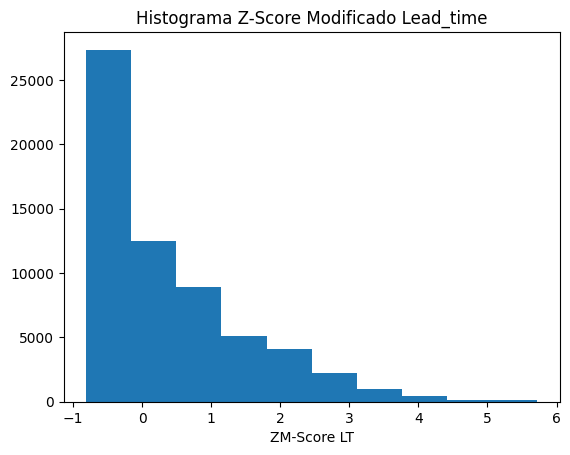

In [ ]:
plt.hist(df.z_score_lt)
plt.title('Histograma Z-Score Modificado Lead_time')
plt.xlabel('ZM-Score LT')
plt.show()

### General

A partir de darnos cuenta de lo desarrollado previamente, se generaron funciones que analizan el z-score (valores atípicos de forma univariada) y los corrije a los valores promedio de otros datos ingresados similares. Según si se quiere más precisión o no se pueden agregar mayores parámetros para reducir la cantidad de filas en condiciones similares

In [40]:
def univariado2(dataframe,parameter,str1,str2):
    sns.boxplot(y=dataframe[parameter])
    plt.show()
    #Cuartiles
    #Redondeo para que funcione
#   y=(ds_hotels_modificado.adr.round()).astype('Int64', errors='ignore')
    y=dataframe[parameter]

    Q1=np.quantile(y,0.25)
    Q3=np.quantile(y,0.75)

#Rango intercuartil
    IQR=Q3-Q1

#Limite inferior Outliers
    out_inf=Q1-1.5*IQR
    out_sup=Q3+1.5*IQR
    print(out_inf)
    print(out_sup)
    df = pd.DataFrame()
    df['z_score']=st.zscore(dataframe[parameter])
    df[parameter] = dataframe[parameter]
    mediana=np.median(df[parameter])
    MAD=np.median(np.absolute(df[parameter]-mediana))

    df['z_score']=(df[parameter] - mediana)*0.6745/MAD
    plt.hist(df.z_score)
    plt.title('Histograma Z-Score Modificado ADR')
    plt.xlabel('ZM-Score ADR')
    plt.show()
    for i in (df[df['z_score']>3].index):
        dataframe.at[i,parameter]=dataframe[(dataframe[str2]==dataframe.at[i,str2])& (dataframe[str1]==dataframe.at[i,str1])&(dataframe["deposit_type"]==dataframe.at[i,"deposit_type"])& (dataframe["adults"]==dataframe.at[i,"adults"])&(dataframe["customer_type"]==dataframe.at[i,"customer_type"])&(ds_hotels_modificado["hotel"]==ds_hotels_modificado.at[i,"hotel"])&(ds_hotels_modificado["arrival_date_month"]==ds_hotels_modificado.at[i,"arrival_date_month"])&(ds_hotels_modificado["stays_in_week_nights"]+ds_hotels_modificado["stays_in_weekend_nights"]==(ds_hotels_modificado.at[i,"stays_in_week_nights"]+ds_hotels_modificado.at[i,"stays_in_weekend_nights"]))&(ds_hotels_modificado["children"]+ds_hotels_modificado["babies"]==(dataframe.at[i,"babies"]+dataframe.at[i,"children"]))][parameter].mean()
    return dataframe

In [41]:
def univariado1(dataframe,parameter,str1):
    sns.boxplot(y=dataframe[parameter])
    plt.show()
    #Cuartiles
    #Redondeo para que funcione
#   y=(ds_hotels_modificado.adr.round()).astype('Int64', errors='ignore')
    y=dataframe[parameter]

    Q1=np.quantile(y,0.25)
    Q3=np.quantile(y,0.75)

#Rango intercuartil
    IQR=Q3-Q1

#Limite inferior Outliers
    out_inf=Q1-1.5*IQR
    out_sup=Q3+1.5*IQR
    print(out_inf)
    print(out_sup)
    df = pd.DataFrame()
    df['z_score']=st.zscore(dataframe[parameter])
    df[parameter] = dataframe[parameter]
    mediana=np.median(df[parameter])
    MAD=np.median(np.absolute(df[parameter]-mediana))

    df['z_score']=(df[parameter] - mediana)*0.6745/MAD
    plt.hist(df.z_score)
    plt.title('Histograma Z-Score Modificado ADR')
    plt.xlabel('ZM-Score ADR')
    plt.show()
    for i in (df[df['z_score']>3].index):
        print(dataframe.at[i,parameter])
        dataframe.at[i,parameter]=np.round(dataframe[(dataframe[str1]==dataframe.at[i,str1])&(dataframe["deposit_type"]==dataframe.at[i,"deposit_type"])& (dataframe["adults"]==dataframe.at[i,"adults"])&(dataframe["customer_type"]==dataframe.at[i,"customer_type"])&(ds_hotels_modificado["hotel"]==ds_hotels_modificado.at[i,"hotel"])&(ds_hotels_modificado["arrival_date_month"]==ds_hotels_modificado.at[i,"arrival_date_month"])&(ds_hotels_modificado["stays_in_week_nights"]+ds_hotels_modificado["stays_in_weekend_nights"]==(ds_hotels_modificado.at[i,"stays_in_week_nights"]+ds_hotels_modificado.at[i,"stays_in_weekend_nights"]))&(ds_hotels_modificado["children"]+ds_hotels_modificado["babies"]==(dataframe.at[i,"babies"]+dataframe.at[i,"children"]))][parameter].mean(),2)
        print(np.round(dataframe[(dataframe["deposit_type"]==dataframe.at[i,"deposit_type"])& (dataframe["adults"]==dataframe.at[i,"adults"])&(dataframe["customer_type"]==dataframe.at[i,"customer_type"])&(ds_hotels_modificado["hotel"]==ds_hotels_modificado.at[i,"hotel"])&(ds_hotels_modificado["arrival_date_month"]==ds_hotels_modificado.at[i,"arrival_date_month"])&(ds_hotels_modificado["stays_in_week_nights"]+ds_hotels_modificado["stays_in_weekend_nights"]==(ds_hotels_modificado.at[i,"stays_in_week_nights"]+ds_hotels_modificado.at[i,"stays_in_weekend_nights"]))&(ds_hotels_modificado["children"]+ds_hotels_modificado["babies"]==(dataframe.at[i,"babies"]+dataframe.at[i,"children"]))][parameter].mean(),2))
    return dataframe

In [42]:
def univariado(dataframe,parameter):
    sns.boxplot(y=dataframe[parameter])
    plt.show()
    #Cuartiles
    #Redondeo para que funcione
#   y=(ds_hotels_modificado.adr.round()).astype('Int64', errors='ignore')
    y=dataframe[parameter]

    Q1=np.quantile(y,0.25)
    Q3=np.quantile(y,0.75)

#Rango intercuartil
    IQR=Q3-Q1

#Limite inferior Outliers
    out_inf=Q1-1.5*IQR
    out_sup=Q3+1.5*IQR
    print(out_inf)
    print(out_sup)
    df = pd.DataFrame()
    df['z_score']=st.zscore(dataframe[parameter])
    df[parameter] = dataframe[parameter]
    mediana=np.median(df[parameter])
    MAD=np.median(np.absolute(df[parameter]-mediana))

    df['z_score']=(df[parameter] - mediana)*0.6745/MAD
    plt.hist(df.z_score)
    plt.title('Histograma Z-Score Modificado ADR')
    plt.xlabel('ZM-Score ADR')
    plt.show()
    for i in (df[df['z_score']>3].index):
        print(dataframe.at[i,parameter])
        dataframe.at[i,parameter]=np.round(dataframe[(dataframe["deposit_type"]==dataframe.at[i,"deposit_type"])& (dataframe["adults"]==dataframe.at[i,"adults"])&(dataframe["customer_type"]==dataframe.at[i,"customer_type"])&(ds_hotels_modificado["hotel"]==ds_hotels_modificado.at[i,"hotel"])&(ds_hotels_modificado["arrival_date_month"]==ds_hotels_modificado.at[i,"arrival_date_month"])&(ds_hotels_modificado["stays_in_week_nights"]+ds_hotels_modificado["stays_in_weekend_nights"]==(ds_hotels_modificado.at[i,"stays_in_week_nights"]+ds_hotels_modificado.at[i,"stays_in_weekend_nights"]))&(ds_hotels_modificado["children"]+ds_hotels_modificado["babies"]==(dataframe.at[i,"babies"]+dataframe.at[i,"children"]))][parameter].mean(),2)
        print(np.round(dataframe[(dataframe["deposit_type"]==dataframe.at[i,"deposit_type"])& (dataframe["adults"]==dataframe.at[i,"adults"])&(dataframe["customer_type"]==dataframe.at[i,"customer_type"])&(ds_hotels_modificado["hotel"]==ds_hotels_modificado.at[i,"hotel"])&(ds_hotels_modificado["arrival_date_month"]==ds_hotels_modificado.at[i,"arrival_date_month"])&(ds_hotels_modificado["stays_in_week_nights"]+ds_hotels_modificado["stays_in_weekend_nights"]==(ds_hotels_modificado.at[i,"stays_in_week_nights"]+ds_hotels_modificado.at[i,"stays_in_weekend_nights"]))&(ds_hotels_modificado["children"]+ds_hotels_modificado["babies"]==(dataframe.at[i,"babies"]+dataframe.at[i,"children"]))][parameter].mean(),2))
    return dataframe

Como hay valores que son enteros (como número de personas o solicitudes) se hace una función que devuelva el promedio de datos similares redondeado a un número entero.

In [43]:
def univarint(dataframe,parameter):
    sns.boxplot(y=dataframe[parameter])
    plt.show()
    #Cuartiles
    #Redondeo para que funcione
#   y=(ds_hotels_modificado.adr.round()).astype('Int64', errors='ignore')
    y=dataframe[parameter]

    Q1=np.quantile(y,0.25)
    Q3=np.quantile(y,0.75)

#Rango intercuartil
    IQR=Q3-Q1

#Limite inferior Outliers
    out_inf=Q1-1.5*IQR
    out_sup=Q3+1.5*IQR
    print(out_inf)
    print(out_sup)
    df = pd.DataFrame()
    df['z_score']=st.zscore(dataframe[parameter])
    df[parameter] = dataframe[parameter]
    mediana=np.median(df[parameter])
    MAD=np.median(np.absolute(df[parameter]-mediana))

    df['z_score']=(df[parameter] - mediana)*0.6745/MAD
    plt.hist(df.z_score)
    plt.title('Histograma Z-Score Modificado ADR')
    plt.xlabel('ZM-Score ADR')
    plt.show()
    for i in (df[df['z_score']>3].index):
        print(dataframe.at[i,parameter])
        dataframe.at[i,parameter]=np.round(dataframe[(dataframe["deposit_type"]==dataframe.at[i,"deposit_type"])& (dataframe["adults"]==dataframe.at[i,"adults"])&(dataframe["customer_type"]==dataframe.at[i,"customer_type"])&(ds_hotels_modificado["hotel"]==ds_hotels_modificado.at[i,"hotel"])&(ds_hotels_modificado["arrival_date_month"]==ds_hotels_modificado.at[i,"arrival_date_month"])&(ds_hotels_modificado["stays_in_week_nights"]+ds_hotels_modificado["stays_in_weekend_nights"]==(ds_hotels_modificado.at[i,"stays_in_week_nights"]+ds_hotels_modificado.at[i,"stays_in_weekend_nights"]))&(ds_hotels_modificado["children"]+ds_hotels_modificado["babies"]==(dataframe.at[i,"babies"]+dataframe.at[i,"children"]))][parameter].mean())
        print(np.round(dataframe[(dataframe["deposit_type"]==dataframe.at[i,"deposit_type"])& (dataframe["adults"]==dataframe.at[i,"adults"])&(dataframe["customer_type"]==dataframe.at[i,"customer_type"])&(ds_hotels_modificado["hotel"]==ds_hotels_modificado.at[i,"hotel"])&(ds_hotels_modificado["arrival_date_month"]==ds_hotels_modificado.at[i,"arrival_date_month"])&(ds_hotels_modificado["stays_in_week_nights"]+ds_hotels_modificado["stays_in_weekend_nights"]==(ds_hotels_modificado.at[i,"stays_in_week_nights"]+ds_hotels_modificado.at[i,"stays_in_weekend_nights"]))&(ds_hotels_modificado["children"]+ds_hotels_modificado["babies"]==(dataframe.at[i,"babies"]+dataframe.at[i,"children"]))][parameter].mean()))
    return dataframe

In [137]:
d1=ds_hotels_modificado.copy()

In [218]:
ds_hotels_modificado=d1.copy()

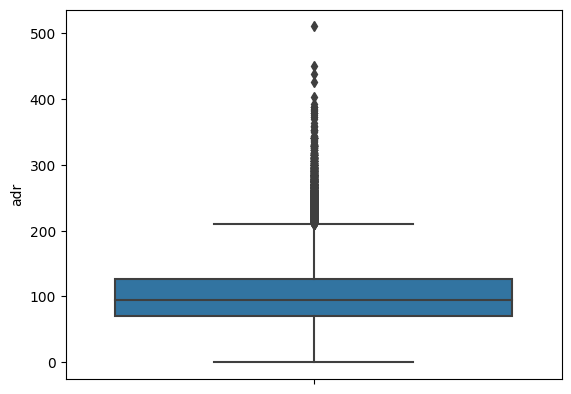

-14.0
210.0


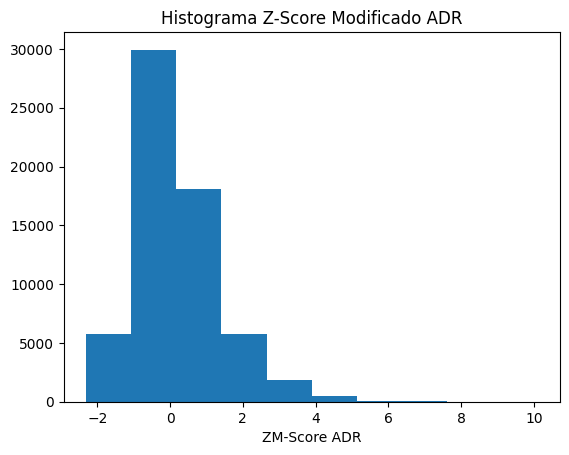

229.0
170.05
227.25
250.31
240.0
197.14
302.5
199.93
219.0
180.78
279.0
179.53
289.6
223.34
307.0
200.26
239.0
186.65
269.3
262.32
282.5
282.5
266.0
190.79
283.0
193.82
240.0
265.27
223.0
211.31
230.0
230.0
250.0
250.0
340.0
322.07
228.33
161.93
264.44
224.45
305.0
151.42
221.6
173.58
237.33
271.68
221.0
114.96
246.0
246.0
221.0
205.24
225.0
196.11
227.1
233.96
240.0
181.46
219.0
199.96
241.0
147.81
231.0
191.75
259.0
218.88
352.0
352.0
353.0
207.15
245.0
147.51
224.0
142.12
262.0
207.49
245.0
147.21
240.0
165.32
242.33
180.03
219.0
189.17
273.0
199.21
249.0
206.99
238.57
167.82
222.0
111.46
229.0
148.88
275.0
147.44
231.0
199.12
236.71
167.56
230.0
167.33
246.55
241.64
250.0
116.71
292.0
228.16
225.0
125.14
226.5
210.17
219.0
179.87
265.67
255.4
231.0
203.5
305.0
355.5
290.01
199.01
260.0
260.0
234.54
281.67
243.17
206.29
253.57
173.48
218.72
119.32
285.0
253.12
224.8
182.7
230.43
201.27
246.0
199.04
240.3
196.94
256.0
180.64
234.36
233.58
266.43
207.5
238.1
214.26
227.22
164.64
235.0

hotel  lead_time  arrival_date_year arrival_date_month  \
0        City Hotel         49               2016          September   
1      Resort Hotel          4               2015            October   
2        City Hotel         25               2016            October   
3        City Hotel         26               2016           December   
4        City Hotel        104               2017              March   
...             ...        ...                ...                ...   
61904  Resort Hotel         24               2017            January   
61905    City Hotel          0               2016          September   
61906    City Hotel         10               2017                May   
61907  Resort Hotel        143               2015            October   
61908    City Hotel         57               2016              April   

       arrival_date_week_number  arrival_date_day_of_month  \
0                            37                          5   
1                            44                         31   
2                            42                         13   
3                            51                         12   
4                            12                         19   
...                         ...                        ...   
61904                         4                         27   
61905                        36                          2   
61906                        19                          8   
61907                        41                         10   
61908                        17                         17   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                            1                     2       1       0.0  ...   
1                            0                     1       2       0.0  ...   
2                            0                     1       2       2.0  ...   
3                            2                     5       2       0.0  ...   
4                            2                     5       2       0.0  ...   
...                        ...                   ...     ...       ...  ...   
61904                        0                     2       2       0.0  ...   
61905                        0                     1       1       0.0  ...   
61906                        1                     2       1       0.0  ...   
61907                        2                     5       2       0.0  ...   
61908                        2                     5       2       0.0  ...   

       deposit_type  agent days_in_waiting_list    customer_type     adr  \
0        No Deposit    9.0                    0        Transient  115.50   
1        No Deposit    0.0                    0        Transient   42.00   
2        No Deposit    9.0                    0        Transient  174.58   
3        Non Refund  154.0                    0        Transient   75.00   
4        No Deposit   20.0                    0  Transient-Party   75.00   
...             ...    ...                  ...              ...     ...   
61904    No Deposit  240.0                    0        Transient   48.00   
61905    No Deposit    0.0                    0        Transient  149.00   
61906    No Deposit    0.0                    0        Transient   95.00   
61907    Non Refund   96.0                    0        Transient   36.05   
61908    No Deposit    9.0                    0        Transient  143.29   

       required_car_parking_spaces  total_of_special_requests  \
0                                0                          1   
1                                1                          0   
2                                0                          2   
3                                0                          0   
4                                0                          1   
...                            ...                        ...   
61904                            0                          1   
61905                 

In [219]:
univariado(ds_hotels_modificado,"adr")

In [152]:
parameter="total_of_special_requests"
dataframe=d1.copy()

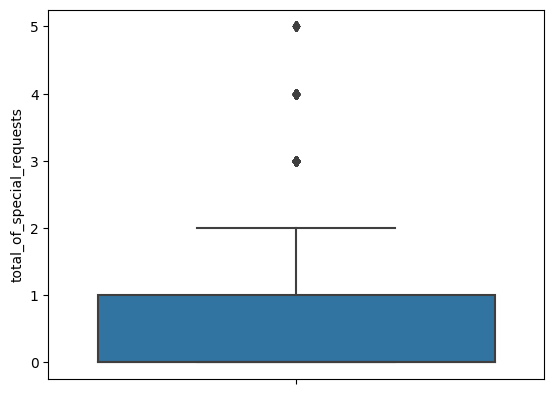

-1.5
2.5


In [153]:
sns.boxplot(y=dataframe[parameter])
plt.show()
    #Cuartiles
    #Redondeo para que funcione
#   y=(ds_hotels_modificado.adr.round()).astype('Int64', errors='ignore')
y=dataframe[parameter]

Q1=np.quantile(y,0.25)
Q3=np.quantile(y,0.75)

#Rango intercuartil
IQR=Q3-Q1

#Limite inferior Outliers
out_inf=Q1-1.5*IQR
out_sup=Q3+1.5*IQR
print(out_inf)
print(out_sup)


In [183]:
np.round(2.51)

3.0

In [185]:
ds_hotels_modificado=d1.copy()

Como hay algunos datos para los que el z-score no es suficiente se genera otra función que redusca a partir de otro parámetro.

In [186]:
def noz(dataframe, parametro,max):
    df=pd.DataFrame
    for i in (dataframe[dataframe[parametro]>max].index):
        print(dataframe.at[i,parameter])
        dataframe.at[i,parameter]=np.round(dataframe[(dataframe["deposit_type"]==dataframe.at[i,"deposit_type"])& (dataframe["adults"]==dataframe.at[i,"adults"])&(dataframe["customer_type"]==dataframe.at[i,"customer_type"])&(ds_hotels_modificado["hotel"]==ds_hotels_modificado.at[i,"hotel"])&(ds_hotels_modificado["arrival_date_month"]==ds_hotels_modificado.at[i,"arrival_date_month"])&(ds_hotels_modificado["stays_in_week_nights"]+ds_hotels_modificado["stays_in_weekend_nights"]==(ds_hotels_modificado.at[i,"stays_in_week_nights"]+ds_hotels_modificado.at[i,"stays_in_weekend_nights"]))&(ds_hotels_modificado["children"]+ds_hotels_modificado["babies"]==(dataframe.at[i,"babies"]+dataframe.at[i,"children"]))][parameter].mean())
        print(np.round(dataframe[(dataframe["deposit_type"]==dataframe.at[i,"deposit_type"])& (dataframe["adults"]==dataframe.at[i,"adults"])&(dataframe["customer_type"]==dataframe.at[i,"customer_type"])&(ds_hotels_modificado["hotel"]==ds_hotels_modificado.at[i,"hotel"])&(ds_hotels_modificado["arrival_date_month"]==ds_hotels_modificado.at[i,"arrival_date_month"])&(ds_hotels_modificado["stays_in_week_nights"]+ds_hotels_modificado["stays_in_weekend_nights"]==(ds_hotels_modificado.at[i,"stays_in_week_nights"]+ds_hotels_modificado.at[i,"stays_in_weekend_nights"]))][parameter].mean()))
    return dataframe

In [220]:
noz(ds_hotels_modificado,"total_of_special_requests",2.5)

3
3.0
3
1.0
3
1.0
3
0.0
3
1.0
3
1.0
4
1.0
3
1.0
3
1.0
3
2.0
4
1.0
3
1.0
3
2.0
3
1.0
3
1.0
4
2.0
3
3.0
3
1.0
3
1.0
4
1.0
3
0.0
3
1.0
3
1.0
3
1.0
3
1.0
3
1.0
3
1.0
4
1.0
3
1.0
3
1.0
3
1.0
3
1.0
3
1.0
3
1.0
3
1.0
4
1.0
3
1.0
3
1.0
4
1.0
3
1.0
3
1.0
3
3.0
3
1.0
3
1.0
3
1.0
3
1.0
3
1.0
3
1.0
3
0.0
4
1.0
4
1.0
3
1.0
3
1.0
3
1.0
4
1.0
3
1.0
3
2.0
3
1.0
3
1.0
5
2.0
3
1.0
3
1.0
3
0.0
3
1.0
3
1.0
3
2.0
3
1.0
3
1.0
3
1.0
3
1.0
3
1.0
4
2.0
3
1.0
4
1.0
3
1.0
3
1.0
4
1.0
3
1.0
3
1.0
3
1.0
3
1.0
3
1.0
3
0.0
3
1.0
3
1.0
3
1.0
3
1.0
3
0.0
3
1.0
4
1.0
3
1.0
3
0.0
3
1.0
3
1.0
3
1.0
3
1.0
4
1.0
3
0.0
3
1.0
3
1.0
3
2.0
3
1.0
3
1.0
3
1.0
3
1.0
3
1.0
3
1.0
3
1.0
3
1.0
3
1.0
3
1.0
3
1.0
3
1.0
4
1.0
3
1.0
3
0.0
3
0.0
3
0.0
3
1.0
3
1.0
3
1.0
3
1.0
3
1.0
4
1.0
3
1.0
3
2.0
4
2.0
3
1.0
3
1.0
3
1.0
3
1.0
3
1.0
3
0.0
3
1.0
3
1.0
3
1.0
3
1.0
4
1.0
4
1.0
3
1.0
3
0.0
3
1.0
3
1.0
3
0.0
3
1.0
3
1.0
3
1.0
3
0.0
3
1.0
3
1.0
3
1.0
3
1.0
3
1.0
3
3.0
3
2.0
3
1.0
3
1.0
3
1.0
3
3.0
3
2.0
3
0.0
3
1.0
4
1.0
3
1.0
3
1.0
3
1.0
3
1.

hotel  lead_time  arrival_date_year arrival_date_month  \
0        City Hotel         49               2016          September   
1      Resort Hotel          4               2015            October   
2        City Hotel         25               2016            October   
3        City Hotel         26               2016           December   
4        City Hotel        104               2017              March   
...             ...        ...                ...                ...   
61904  Resort Hotel         24               2017            January   
61905    City Hotel          0               2016          September   
61906    City Hotel         10               2017                May   
61907  Resort Hotel        143               2015            October   
61908    City Hotel         57               2016              April   

       arrival_date_week_number  arrival_date_day_of_month  \
0                            37                          5   
1                            44                         31   
2                            42                         13   
3                            51                         12   
4                            12                         19   
...                         ...                        ...   
61904                         4                         27   
61905                        36                          2   
61906                        19                          8   
61907                        41                         10   
61908                        17                         17   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                            1                     2       1       0.0  ...   
1                            0                     1       2       0.0  ...   
2                            0                     1       2       2.0  ...   
3                            2                     5       2       0.0  ...   
4                            2                     5       2       0.0  ...   
...                        ...                   ...     ...       ...  ...   
61904                        0                     2       2       0.0  ...   
61905                        0                     1       1       0.0  ...   
61906                        1                     2       1       0.0  ...   
61907                        2                     5       2       0.0  ...   
61908                        2                     5       2       0.0  ...   

       deposit_type  agent days_in_waiting_list    customer_type     adr  \
0        No Deposit    9.0                    0        Transient  115.50   
1        No Deposit    0.0                    0        Transient   42.00   
2        No Deposit    9.0                    0        Transient  174.58   
3        Non Refund  154.0                    0        Transient   75.00   
4        No Deposit   20.0                    0  Transient-Party   75.00   
...             ...    ...                  ...              ...     ...   
61904    No Deposit  240.0                    0        Transient   48.00   
61905    No Deposit    0.0                    0        Transient  149.00   
61906    No Deposit    0.0                    0        Transient   95.00   
61907    Non Refund   96.0                    0        Transient   36.05   
61908    No Deposit    9.0                    0        Transient  143.29   

       required_car_parking_spaces  total_of_special_requests  \
0                                0                          1   
1                                1                          0   
2                                0                          2   
3                                0                          0   
4                                0                          1   
...                            ...                        ...   
61904                            0                          1   
61905                 

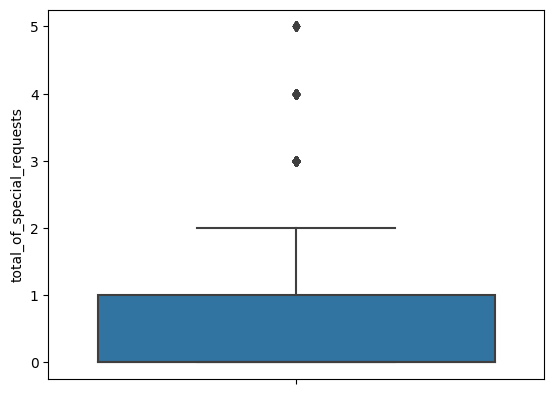

-1.5
2.5


ValueError: supplied range of [inf, inf] is not finite

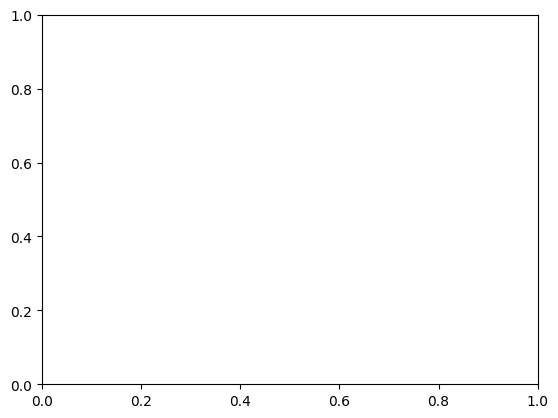

In [149]:
univariado1(ds_hotels_modificado,"total_of_special_requests","adr")

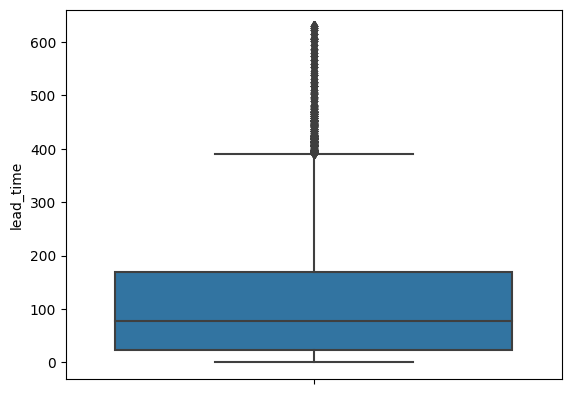

-197.5
390.5


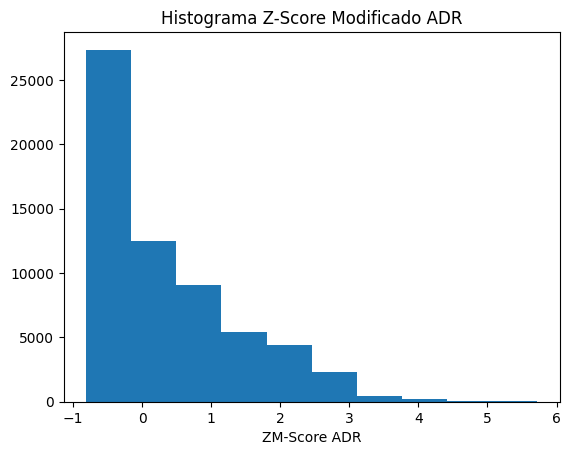

408
381.0
368
360.0
524
524.0
378
378.0
413
413.0
413
413.0
422
422.0
389
389.0
401
399.0
407
380.0
584
586.0
406
379.0
431
411.0
413
413.0
399
399.0
430
410.0
404
378.0
462
462.0
428
409.0
495
496.0
427
409.0
403
378.0
426
408.0
584
587.0
378
378.0
378
378.0
402
377.0
401
376.0
400
375.0
462
462.0
398
375.0
397
374.0
424
407.0
423
407.0
396
373.0
378
378.0
462
462.0
462
462.0
523
524.0
462
462.0
395
373.0
471
471.0
401
399.0
523
524.0
524
524.0
394
372.0
406
406.0
414
413.0
414
413.0
392
372.0
494
496.0
468
468.0
422
406.0
391
371.0
493
497.0
420
405.0
389
371.0
399
399.0
494
497.0
387
370.0
386
370.0
414
413.0
384
369.0
462
462.0
399
399.0
378
378.0
418
405.0
416
404.0
414
413.0
462
462.0
382
369.0
414
413.0
414
412.0
434
434.0
414
412.0
378
378.0
414
404.0
415
412.0
471
471.0
471
471.0
413
412.0
378
378.0
462
462.0
471
471.0
414
238.0
411
412.0
379
351.0
423
184.0
444
367.0
426
229.0
386
180.0
423
182.0
414
230.0
510
525.0
420
201.0
447
215.0
373
151.0
419
214.0
423
181.0
412
324.0


In [222]:
ds_hotels_modificado=univarint(ds_hotels_modificado,"lead_time")

In [223]:
ds_hotels_modificado["lead_time"].max()

588

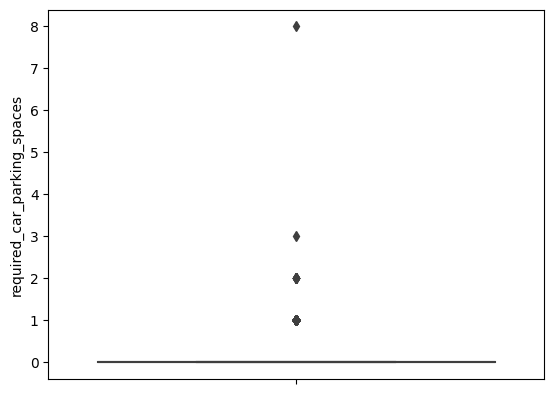

0.0
0.0


ValueError: supplied range of [inf, inf] is not finite

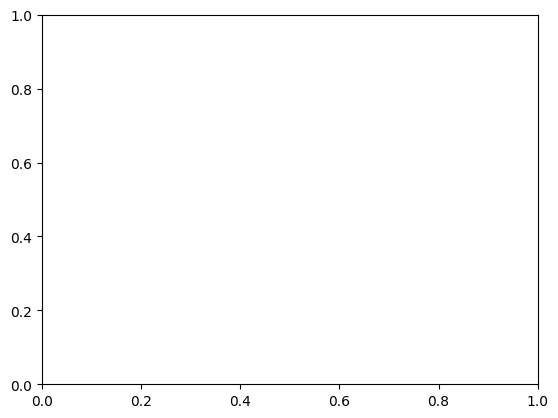

In [224]:
univariado(ds_hotels_modificado,"required_car_parking_spaces")

In [225]:
noz(ds_hotels_modificado,"required_car_parking_spaces",1)

1
0.0
0
0.0
0
0.0
1
0.0
0
0.0
2
1.0
0
1.0
0
1.0
0
0.0
0
0.0
0
0.0
1
1.0
1
1.0
1
1.0


hotel  lead_time  arrival_date_year arrival_date_month  \
0        City Hotel         49               2016          September   
1      Resort Hotel          4               2015            October   
2        City Hotel         25               2016            October   
3        City Hotel         26               2016           December   
4        City Hotel        104               2017              March   
...             ...        ...                ...                ...   
61904  Resort Hotel         24               2017            January   
61905    City Hotel          0               2016          September   
61906    City Hotel         10               2017                May   
61907  Resort Hotel        143               2015            October   
61908    City Hotel         57               2016              April   

       arrival_date_week_number  arrival_date_day_of_month  \
0                            37                          5   
1                            44                         31   
2                            42                         13   
3                            51                         12   
4                            12                         19   
...                         ...                        ...   
61904                         4                         27   
61905                        36                          2   
61906                        19                          8   
61907                        41                         10   
61908                        17                         17   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                            1                     2       1       0.0  ...   
1                            0                     1       2       0.0  ...   
2                            0                     1       2       2.0  ...   
3                            2                     5       2       0.0  ...   
4                            2                     5       2       0.0  ...   
...                        ...                   ...     ...       ...  ...   
61904                        0                     2       2       0.0  ...   
61905                        0                     1       1       0.0  ...   
61906                        1                     2       1       0.0  ...   
61907                        2                     5       2       0.0  ...   
61908                        2                     5       2       0.0  ...   

       deposit_type  agent days_in_waiting_list    customer_type     adr  \
0        No Deposit    9.0                    0        Transient  115.50   
1        No Deposit    0.0                    0        Transient   42.00   
2        No Deposit    9.0                    0        Transient  174.58   
3        Non Refund  154.0                    0        Transient   75.00   
4        No Deposit   20.0                    0  Transient-Party   75.00   
...             ...    ...                  ...              ...     ...   
61904    No Deposit  240.0                    0        Transient   48.00   
61905    No Deposit    0.0                    0        Transient  149.00   
61906    No Deposit    0.0                    0        Transient   95.00   
61907    Non Refund   96.0                    0        Transient   36.05   
61908    No Deposit    9.0                    0        Transient  143.29   

       required_car_parking_spaces  total_of_special_requests  \
0                                0                          1   
1                                1                          0   
2                                0                          2   
3                                0                          0   
4                                0                          1   
...                            ...                        ...   
61904                            0                          1   
61905                 

#### Valores atípicos univariados particulares

Hay algunos valores atípicos que son predecibles debido a situaciones reales. Por lo tanto se analizaron y modificaron estos casos particulares

In [40]:
ds_hotels_modificado[ds_hotels_modificado["children"]==10]

hotel  lead_time  arrival_date_year arrival_date_month  \
49179  Resort Hotel         55               2015               July   

       arrival_date_week_number  arrival_date_day_of_month  \
49179                        29                         12   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
49179                        4                    10       2      10.0  ...   

       deposit_type agent days_in_waiting_list customer_type     adr  \
49179    No Deposit   8.0                    0      Contract  133.16   

       required_car_parking_spaces  total_of_special_requests  \
49179                            0                          1   

       reservation_status_date                                    id  \
49179               2015-07-12  44093355-c1c8-41eb-bcb4-40dc494fa1a9   

      is_canceled  
49179           1  

[1 rows x 31 columns]

In [41]:
ds_hotels_modificado[(ds_hotels_modificado["deposit_type"]=="No Deposit")&(ds_hotels_modificado["total_of_special_requests"]==1)&(ds_hotels_modificado["hotel"]=="Resort Hotel")&(ds_hotels_modificado["arrival_date_month"]=="July")&(ds_hotels_modificado["stays_in_week_nights"]+ds_hotels_modificado["stays_in_weekend_nights"]>10)]

hotel  lead_time  arrival_date_year arrival_date_month  \
813    Resort Hotel        151               2016               July   
2469   Resort Hotel        115               2017               July   
4865   Resort Hotel        139               2015               July   
8783   Resort Hotel        162               2016               July   
10497  Resort Hotel        114               2015               July   
11462  Resort Hotel        186               2017               July   
11657  Resort Hotel         20               2017               July   
12010  Resort Hotel        283               2017               July   
13386  Resort Hotel        312               2017               July   
13662  Resort Hotel        268               2017               July   
14381  Resort Hotel        154               2017               July   
14862  Resort Hotel        315               2016               July   
15604  Resort Hotel         69               2015               July   
15892  Resort Hotel        335               2017               July   
16836  Resort Hotel        203               2017               July   
17635  Resort Hotel        311               2015               July   
17799  Resort Hotel        115               2017               July   
17805  Resort Hotel        115               2017               July   
18440  Resort Hotel        241               2017               July   
18608  Resort Hotel        206               2016               July   
19627  Resort Hotel        228               2017               July   
19914  Resort Hotel         53               2017               July   
20639  Resort Hotel        320               2017               July   
20706  Resort Hotel        312               2017               July   
21193  Resort Hotel         73               2017               July   
21551  Resort Hotel        196               2016               July   
23417  Resort Hotel        137               2016               July   
23839  Resort Hotel        175               2016               July   
25002  Resort Hotel        139               2015               July   
27849  Resort Hotel        158               2016               July   
28220  Resort Hotel        190               2017               July   
28724  Resort Hotel        104               2016               July   
29880  Resort Hotel        190               2017               July   
34467  Resort Hotel        274               2017               July   
35453  Resort Hotel        183               2015               July   
36122  Resort Hotel        164               2015               July   
37225  Resort Hotel        184               2016               July   
40481  Resort Hotel        203               2017               July   
40606  Resort Hotel        221               2016               July   
43459  Resort Hotel        304               2016               July   
45420  Resort Hotel         59               2015               July   
46296  Resort Hotel        254               2016               July   
46576  Resort Hotel        354               2017               July   
49179  Resort Hotel         55               2015               July   
49520  Resort Hotel        128               2015               July   
52747  Resort Hotel        173               2016               July   
53164  Resort Hotel         71               2016               July   
53252  Resort Hotel        198               2016               July   
54800  Resort Hotel        220               2017               July   
56880  Resort Hotel        127               2015               July   
58091  Resort Hotel        142               2015               July   
60546  Resort Hotel        141               2017               July   

       arrival_date_week_number  arrival_date_day_of_month  \
813                          29                         16   
2469                         29                         16   
4865       

Por comparación con 51 otras filas con datos similares suponemos que hubo un error de tipeo y es 1 niño en vez de 10

In [40]:
ds_hotels_modificado.loc[49179,"children"]=1

In [43]:
ds_hotels_modificado[ds_hotels_modificado["adr"]==510]

hotel  lead_time  arrival_date_year arrival_date_month  \
55457  City Hotel          0               2017                May   

       arrival_date_week_number  arrival_date_day_of_month  \
55457                        19                          9   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
55457                        0                     1       1       0.0  ...   

       deposit_type  agent days_in_waiting_list customer_type    adr  \
55457    No Deposit  159.0                    0     Transient  510.0   

       required_car_parking_spaces  total_of_special_requests  \
55457                            0                          0   

       reservation_status_date                                    id  \
55457               2017-05-10  fe474061-f3b2-4e15-8ba0-672366ab7ef1   

      is_canceled  
55457           0  

[1 rows x 31 columns]

In [44]:
dl=pd.DataFrame
dl=ds_hotels_modificado[(ds_hotels_modificado["customer_type"]=="Transient")&(ds_hotels_modificado["deposit_type"]=="No Deposit")&(ds_hotels_modificado["total_of_special_requests"]==0)&(ds_hotels_modificado["hotel"]=="City Hotel")&(ds_hotels_modificado["arrival_date_month"]=="May")&(ds_hotels_modificado["stays_in_week_nights"]+ds_hotels_modificado["stays_in_weekend_nights"]==1)]

In [45]:
dl['adr'].mean()

123.79391156462586

In [41]:
ds_hotels_modificado.loc[55457,"adr"]=123.79

In [47]:
ds_hotels_modificado[ds_hotels_modificado["babies"]>3]

hotel  lead_time  arrival_date_year arrival_date_month  \
12659  City Hotel         11               2015            October   

       arrival_date_week_number  arrival_date_day_of_month  \
12659                        42                         11   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
12659                        2                     1       1       0.0  ...   

       deposit_type agent days_in_waiting_list    customer_type   adr  \
12659    No Deposit  95.0                    0  Transient-Party  95.0   

       required_car_parking_spaces  total_of_special_requests  \
12659                            0                          0   

       reservation_status_date                                    id  \
12659               2015-10-14  a864cf91-980a-48da-9b71-c0b487096239   

      is_canceled  
12659           0  

[1 rows x 31 columns]

In [48]:
ds_hotels_modificado.loc[12659,"babies"]

9

In [49]:
db=pd.DataFrame
db=ds_hotels_modificado[(ds_hotels_modificado["customer_type"]=="Transient-Party")&(ds_hotels_modificado["deposit_type"]=="No Deposit")&(ds_hotels_modificado["total_of_special_requests"]==0)&(ds_hotels_modificado["hotel"]=="City Hotel")&(ds_hotels_modificado["arrival_date_month"]=="October")&(ds_hotels_modificado["stays_in_week_nights"]+ds_hotels_modificado["stays_in_weekend_nights"]<5)]

In [50]:
db['babies'].mean()

0.011947431302270013

In [42]:
ds_hotels_modificado.loc[12659,"babies"]=0

## Multivariados 1

Se comenzaron analizando categorías que podían tener relación entre sí para la evalución de valores atípicos de forma multivariada

Para tanto la parte 1 como la 2 del análisis de valores atípicos de forma multivariada, si se creyó nesesario modificarlo se utilizó un promedio de los valores perteneciente al parametro a modificar cuyo resto de datos los ponían en cituaciones similares

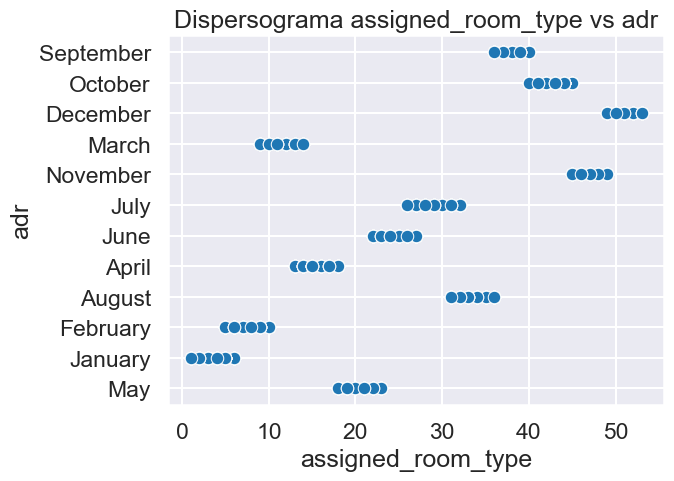

In [733]:
#Scatter Plot
es=ds_hotels_modificado['arrival_date_year']
#Grafico scatter
sns.scatterplot(x=ds_hotels_modificado.arrival_date_week_number,y=ds_hotels_modificado.arrival_date_month)
plt.title('Dispersograma assigned_room_type vs adr')
plt.xlabel('assigned_room_type')
plt.ylabel('adr')
plt.show()

In [45]:
ds_m=ds_hotels_modificado.copy()

In [720]:
ds_m.loc[:,"arrival_date_month"].replace(to_replace=["January","February","March","April","May","June","July","August","September",
 'October','November','December'],value=[1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)

In [737]:
#Calulo el vector de medias
vmedias=np.mean(ds_m[['arrival_date_week_number','arrival_date_month']])

#Calculo la diferencia entre las observaciones y el vector de medias
x_dif = ds_m[['arrival_date_week_number','arrival_date_month']] - vmedias

#Calculo matriz de covarianza y su inversa
cov=ds_m[['arrival_date_week_number','arrival_date_month']].cov().values
inv_cov = np.linalg.inv(cov)

#Calculamos el cuadrado de la distancia de mahalanobis
mahal =np.dot( np.dot(x_dif, inv_cov) , x_dif.T)

ds_m['mahalanobis']=mahal.diagonal()

<Axes: ylabel='mahalanobis'>

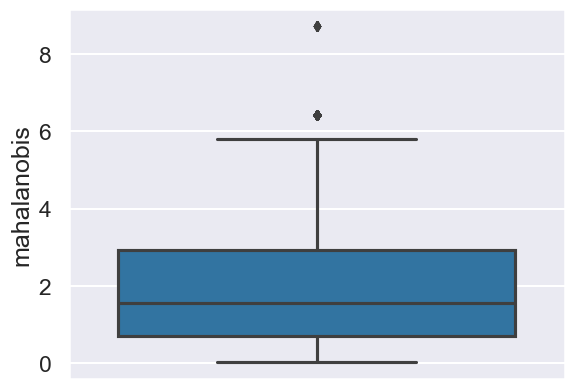

In [738]:
sns.boxplot(y=ds_m.mahalanobis)

In [742]:
np.sort(ds_m.mahalanobis)

array([0.02752844, 0.02752844, 0.02752844, ..., 8.720767  , 8.720767  ,
       8.720767  ])

In [743]:
#Defino umbral
umbral=8

#Observacione anómalas
ds_m[ds_m['mahalanobis']>umbral]

hotel  lead_time  arrival_date_year  arrival_date_month  \
4901   Resort Hotel         22               2016                   1   
9548   Resort Hotel         16               2016                   1   
16081    City Hotel         11               2016                   1   
19240    City Hotel         16               2016                   1   
29673    City Hotel         16               2016                   1   
29813    City Hotel         33               2016                   1   
34041  Resort Hotel          1               2016                   1   
42741    City Hotel         34               2016                   1   
47123    City Hotel         20               2016                   1   
52805  Resort Hotel          9               2016                   1   
58825    City Hotel          9               2016                   1   
59810    City Hotel         30               2016                   1   

       arrival_date_week_number  arrival_date_day_of_month  \
4901                          6                         31   
9548                          6                         31   
16081                         6                         31   
19240                         6                         31   
29673                         6                         31   
29813                         6                         31   
34041                         6                         31   
42741                         6                         31   
47123                         6                         31   
52805                         6                         31   
58825                         6                         31   
59810                         6                         31   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
4901                         2                     2       2       0.0  ...   
9548                         4                     6       2       0.0  ...   
16081                        2                     0       1       0.0  ...   
19240                        2                     2       1       0.0  ...   
29673                        2                     2       1       0.0  ...   
29813                        2                     5       2       0.0  ...   
34041                        1                     0       2       0.0  ...   
42741                        2                     4       2       0.0  ...   
47123                        2                     1       2       0.0  ...   
52805                        2                     4       2       0.0  ...   
58825                        2                     0       1       0.0  ...   
59810                        2                     0       2       0.0  ...   

       agent days_in_waiting_list customer_type    adr  \
4901   240.0                    0     Transient  52.80   
9548   250.0                    0     Transient  74.50   
16081    9.0                    0     Transient  67.40   
19240   27.0                    0     Transient  43.00   
29673   27.0                    0     Transient  43.00   
29813    9.0                    0     Transient  71.53   
34041  240.0                    0     Transient  58.00   
42741   27.0                    0     Transient  50.33   
47123   28.0                    0     Transient  66.00   
52805  241.0                    0     Transient  35.11   
58825    0.0                    0     Transient  66.00   
59810    9.0                    0     Transient  79.60   

      required_car_parking_spaces  total_of_special_requests  \
4901                            0                          2   
9548                            0                          1   
16081                           0                          0   
19240                           0                          0   
29673                           0                          0   
29813                           0                          0   
34041                     

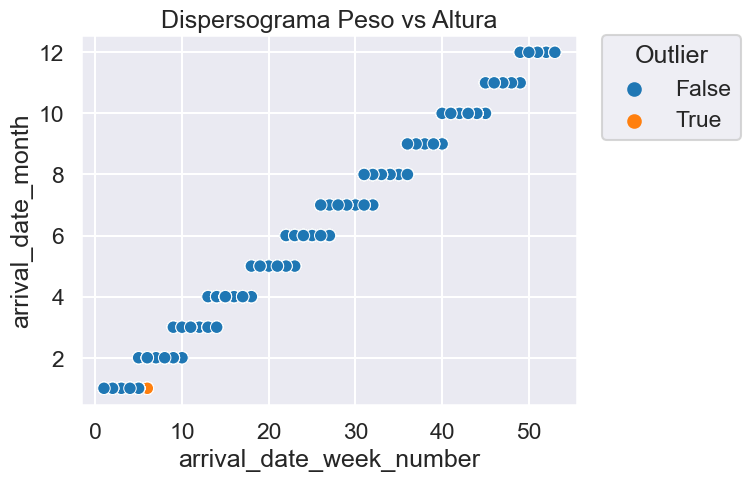

In [744]:
#Grafico scatter
es_outlier = (ds_m['mahalanobis'] > umbral)

sns.scatterplot(x=ds_m.arrival_date_week_number,y=ds_m.arrival_date_month, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma Peso vs Altura')
plt.show()

Se observó la existencia de una semana 6 extraña en enero del 2016 pero luego de fijarce el número de semana del 1 de febrero de dicho año y del 7 del mismo se descubrío que era un valor real

In [746]:
ds_hotels_modificado[(ds_hotels_modificado["arrival_date_month"]=="February")&(ds_hotels_modificado["arrival_date_year"]==2016)& (ds_m['arrival_date_day_of_month']==7)]

hotel  lead_time  arrival_date_year arrival_date_month  \
3890   Resort Hotel          2               2016           February   
4410   Resort Hotel         82               2016           February   
4470     City Hotel          3               2016           February   
4581     City Hotel         26               2016           February   
5510   Resort Hotel          4               2016           February   
...             ...        ...                ...                ...   
58518  Resort Hotel         82               2016           February   
59505  Resort Hotel          3               2016           February   
59684    City Hotel         48               2016           February   
60553  Resort Hotel         82               2016           February   
61429  Resort Hotel          2               2016           February   

       arrival_date_week_number  arrival_date_day_of_month  \
3890                          7                          7   
4410                          7                          7   
4470                          7                          7   
4581                          7                          7   
5510                          7                          7   
...                         ...                        ...   
58518                         7                          7   
59505                         7                          7   
59684                         7                          7   
60553                         7                          7   
61429                         7                          7   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
3890                         2                     3       2       0.0  ...   
4410                         2                     0       2       0.0  ...   
4470                         2                     0       2       0.0  ...   
4581                         2                     2       2       0.0  ...   
5510                         2                     1       1       0.0  ...   
...                        ...                   ...     ...       ...  ...   
58518                        2                     0       2       0.0  ...   
59505                        2                     1       2       0.0  ...   
59684                        2                     1       2       0.0  ...   
60553                        2                     0       2       0.0  ...   
61429                        2                     0       2       0.0  ...   

       deposit_type  agent days_in_waiting_list    customer_type    adr  \
3890     No Deposit    2.0                    0         Contract  71.00   
4410     No Deposit   67.0                    0  Transient-Party  72.00   
4470     No Deposit    9.0                    0        Transient  79.00   
4581     No Deposit   11.0                    0        Transient  64.64   
5510     No Deposit  250.0                    0        Transient  39.00   
...             ...    ...                  ...              ...    ...   
58518    No Deposit   67.0                    0  Transient-Party  86.00   
59505    No Deposit  177.0                    0        Transient  29.00   
59684    No Deposit   28.0                    0        Transient  74.00   
60553    No Deposit   67.0                    0  Transient-Party  72.00   
61429    No Deposit  177.0                    0        Transient  63.00   

       required_car_parking_spaces  total_of_special_requests  \
3890                             0                          0   
4410                             0                          0   
4470                             0                          0   
4581                             0                          0   
5510                             0                          0   
...                            ...                        ...   
58518                            0                          0   
59505                            0

In [53]:
ds_m.loc[:,"assigned_room_type"].replace(to_replace=["A","B","C","D","E","F","G","H","I","K","L","P"],value=[1,2,3,4,5,6,7,8,9,11,12,16],inplace=True)

In [54]:
ds_m.loc[:,"reserved_room_type"].replace(to_replace=["A","B","C","D","E","F","G","H","I","K","L","P"],value=[1,2,3,4,5,6,7,8,9,11,12,16],inplace=True)

In [55]:
#Calulo el vector de medias
vmedias=np.mean(ds_m[['assigned_room_type','reserved_room_type']])

#Calculo la diferencia entre las observaciones y el vector de medias
x_dif = ds_m[['assigned_room_type','reserved_room_type']] - vmedias

#Calculo matriz de covarianza y su inversa
cov=ds_m[['assigned_room_type','reserved_room_type']].cov().values
inv_cov = np.linalg.inv(cov)

#Calculamos el cuadrado de la distancia de mahalanobis
mahal =np.dot(np.dot(x_dif, inv_cov),x_dif.T)

ds_m['mahalanobis']=mahal.diagonal()

<Axes: ylabel='mahalanobis'>

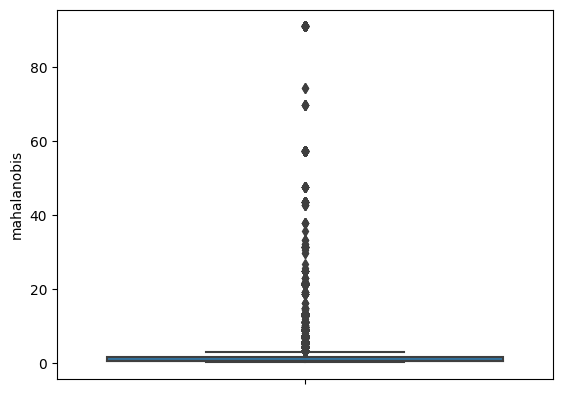

In [56]:
sns.boxplot(y=ds_m.mahalanobis)

In [57]:
np.sort(ds_m.mahalanobis)

array([7.55326074e-02, 7.55326074e-02, 7.55326074e-02, ...,
       9.08648026e+01, 9.08648026e+01, 9.08648026e+01])

In [59]:
#Defino umbral
umbral=90

#Observacione anómalas
ds_m[ds_m['mahalanobis']>umbral]

hotel  lead_time  arrival_date_year arrival_date_month  \
464    City Hotel         64               2015            October   
1551   City Hotel         32               2016           November   
2408   City Hotel          0               2017              March   
2489   City Hotel         33               2016             August   
2585   City Hotel          2               2017           February   
...           ...        ...                ...                ...   
59385  City Hotel          0               2015             August   
60184  City Hotel          0               2016          September   
60704  City Hotel         29               2017            January   
60937  City Hotel          0               2015           November   
60999  City Hotel         57               2016           November   

       arrival_date_week_number  arrival_date_day_of_month  \
464                          42                         16   
1551                         47                         15   
2408                         11                         17   
2489                         33                         11   
2585                          8                         24   
...                         ...                        ...   
59385                        33                         11   
60184                        38                         16   
60704                         3                         18   
60937                        48                         23   
60999                        46                          9   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
464                          2                     3       0       0.0  ...   
1551                         0                     0       1       0.0  ...   
2408                         0                     0       0       0.0  ...   
2489                         0                     1       2       1.0  ...   
2585                         0                     1       2       0.0  ...   
...                        ...                   ...     ...       ...  ...   
59385                        2                    10       0       0.0  ...   
60184                        1                     2       2       0.0  ...   
60704                        0                     3       1       0.0  ...   
60937                        0                     0       2       0.0  ...   
60999                        0                     2       0       0.0  ...   

       agent days_in_waiting_list    customer_type     adr  \
464     50.0                    0  Transient-Party    0.00   
1551     7.0                    0        Transient    0.00   
2408     9.0                    0        Transient    0.00   
2489     9.0                    0        Transient  152.10   
2585     0.0                    0        Transient   97.00   
...      ...                  ...              ...     ...   
59385    0.0                    0            Group    0.00   
60184   14.0                    0        Transient   78.80   
60704  171.0                    0  Transient-Party   65.00   
60937    8.0                    0        Transient    0.00   
60999   14.0                    0        Transient  165.38   

      required_car_parking_spaces  total_of_special_requests  \
464                             0                          0   
1551                            0                          1   
2408                            0                          0   
2489                            0                          1   
2585                            1                          1   
...                           ...                        ...   
59385                           0                          0   
60184                           0                          0   
60704                           0                          0   
60937                           0                          0   
60999                       

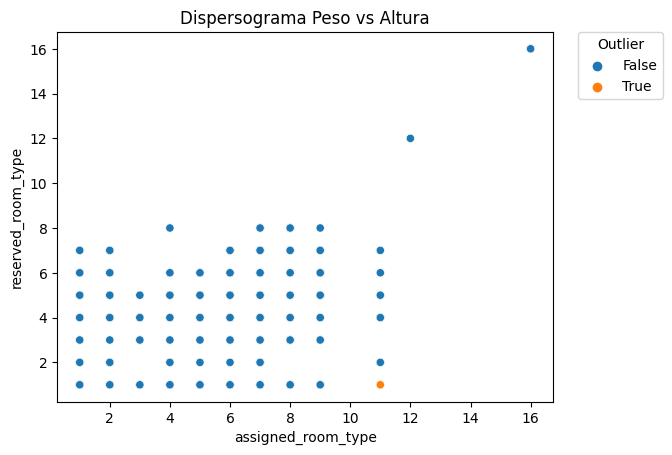

In [60]:
#Grafico scatter
es_outlier = (ds_m['mahalanobis'] > umbral)

sns.scatterplot(x=ds_m.assigned_room_type,y=ds_m.reserved_room_type, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma Peso vs Altura')
plt.show()

No se encontró ningún día fuera de los esperado

In [28]:
ds_hotels_modificado[(ds_hotels_modificado["arrival_date_month"]=="February")&(ds_hotels_modificado["arrival_date_year"]==2016)& (ds_hotels_modificado['arrival_date_day_of_month']>29)]

Empty DataFrame
Columns: [hotel, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status_date, id, is_canceled]
Index: []

[0 rows x 31 columns]

In [37]:
month_31=['January',"March","May","July","August","October","December"]

In [38]:
ds_hotels_modificado[(ds_hotels_modificado["arrival_date_month"].isin(month_31))& (ds_hotels_modificado['arrival_date_day_of_month']>31)]


Empty DataFrame
Columns: [hotel, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status_date, id, is_canceled]
Index: []

[0 rows x 31 columns]

In [39]:
ds_hotels_modificado[~(ds_hotels_modificado["arrival_date_month"].isin(month_31))& (ds_hotels_modificado['arrival_date_day_of_month']>30)]


Empty DataFrame
Columns: [hotel, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status_date, id, is_canceled]
Index: []

[0 rows x 31 columns]

In [50]:
#Calulo el vector de medias
vmedias=np.mean(ds_m[['adr','lead_time']])

#Calculo la diferencia entre las observaciones y el vector de medias
x_dif = ds_m[['adr','lead_time']]- vmedias

#Calculo matriz de covarianza y su inversa
cov=ds_m[['adr','lead_time']].cov().values
inv_cov = np.linalg.inv(cov)

#Calculamos el cuadrado de la distancia de mahalanobis
mahal =np.dot( np.dot(x_dif, inv_cov) , x_dif.T)

ds_m['mahalanobis']=mahal.diagonal()

<Axes: ylabel='mahalanobis'>

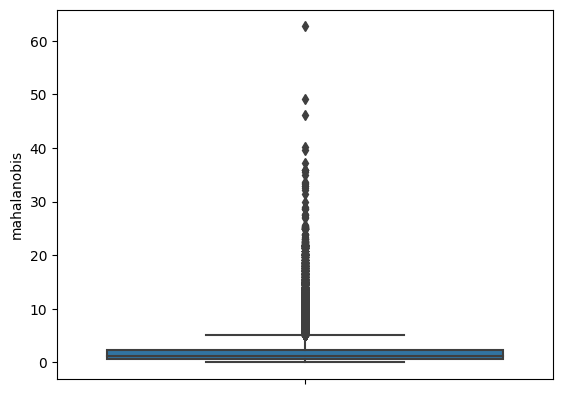

In [51]:
sns.boxplot(y=ds_m.mahalanobis)

In [53]:
np.sort(ds_m.mahalanobis)

array([2.37252189e-05, 2.84405146e-04, 3.37530473e-04, ...,
       4.60551804e+01, 4.91874896e+01, 6.26740411e+01])

In [60]:
#Defino umbral
umbral=45

#Observacione anómalas
ds_m[ds_m['mahalanobis']>umbral]

hotel  lead_time  arrival_date_year arrival_date_month  \
8690   Resort Hotel         31               2017             August   
50238  Resort Hotel        378               2017             August   
53999  Resort Hotel         59               2017             August   

       arrival_date_week_number  arrival_date_day_of_month  \
8690                         31                          1   
50238                        31                          1   
53999                        33                         13   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
8690                         2                     6       2       2.0  ...   
50238                        4                    10       2       0.0  ...   
53999                        2                     4       2       2.0  ...   

       agent days_in_waiting_list customer_type     adr  \
8690   250.0                    0     Transient  426.25   
50238  314.0                    0     Transient  450.00   
53999  250.0                    0     Transient  437.00   

      required_car_parking_spaces  total_of_special_requests  \
8690                            0                          2   
50238                           0                          0   
53999                           0                          0   

       reservation_status_date                                    id  \
8690                2017-08-09  ccc86404-4867-4942-b984-b0a0a56451be   
50238               2016-07-22  3342817f-3e59-40a4-8b8a-8a7ba49e3184   
53999               2017-08-03  f4678f81-0634-4705-95fb-84262ace90fc   

      is_canceled mahalanobis  
8690            0   46.055180  
50238           1   62.674041  
53999           1   49.187490  

[3 rows x 32 columns]

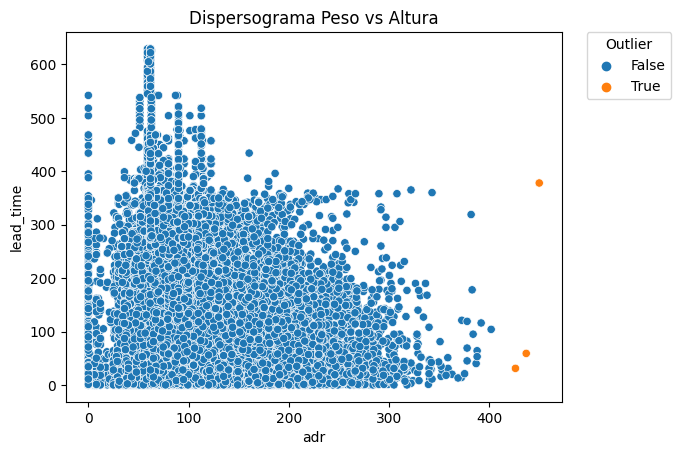

In [61]:
#Grafico scatter
es_outlier = (ds_m['mahalanobis'] > umbral)

sns.scatterplot(x=ds_m.adr,y=ds_m.lead_time, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma adr vs lead time')
plt.show()

In [44]:
#Calulo el vector de medias
vmedias=np.mean(ds_m[['adr','is_canceled']])

#Calculo la diferencia entre las observaciones y el vector de medias
x_dif = ds_m[['adr','is_canceled']]- vmedias

#Calculo matriz de covarianza y su inversa
cov=ds_m[['adr','is_canceled']].cov().values
inv_cov = np.linalg.inv(cov)

#Calculamos el cuadrado de la distancia de mahalanobis
mahal =np.dot( np.dot(x_dif, inv_cov) , x_dif.T)

ds_m['mahalanobis']=mahal.diagonal()

<Axes: ylabel='mahalanobis'>

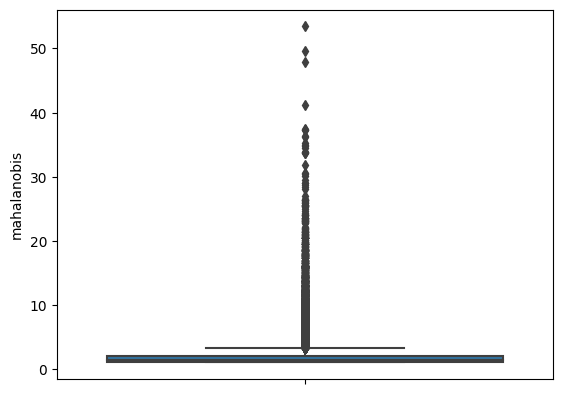

In [45]:
sns.boxplot(y=ds_m.mahalanobis)

In [46]:
np.sort(ds_m.mahalanobis)

array([ 0.99885381,  0.998854  ,  0.9988542 , ..., 47.83213953,
       49.58321266, 53.45928389])

In [47]:
#Defino umbral
umbral=45

#Observacione anómalas
ds_m[ds_m['mahalanobis']>umbral]

hotel  lead_time  arrival_date_year arrival_date_month  \
8690   Resort Hotel         31               2017             August   
50238  Resort Hotel        378               2017             August   
53999  Resort Hotel         59               2017             August   

       arrival_date_week_number  arrival_date_day_of_month  \
8690                         31                          1   
50238                        31                          1   
53999                        33                         13   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
8690                         2                     6       2       2.0  ...   
50238                        4                    10       2       0.0  ...   
53999                        2                     4       2       2.0  ...   

       agent days_in_waiting_list customer_type     adr  \
8690   250.0                    0     Transient  426.25   
50238  314.0                    0     Transient  450.00   
53999  250.0                    0     Transient  437.00   

      required_car_parking_spaces  total_of_special_requests  \
8690                            0                          2   
50238                           0                          0   
53999                           0                          0   

       reservation_status_date                                    id  \
8690                2017-08-09  ccc86404-4867-4942-b984-b0a0a56451be   
50238               2016-07-22  3342817f-3e59-40a4-8b8a-8a7ba49e3184   
53999               2017-08-03  f4678f81-0634-4705-95fb-84262ace90fc   

      is_canceled mahalanobis  
8690            0   47.832140  
50238           1   53.459284  
53999           1   49.583213  

[3 rows x 32 columns]

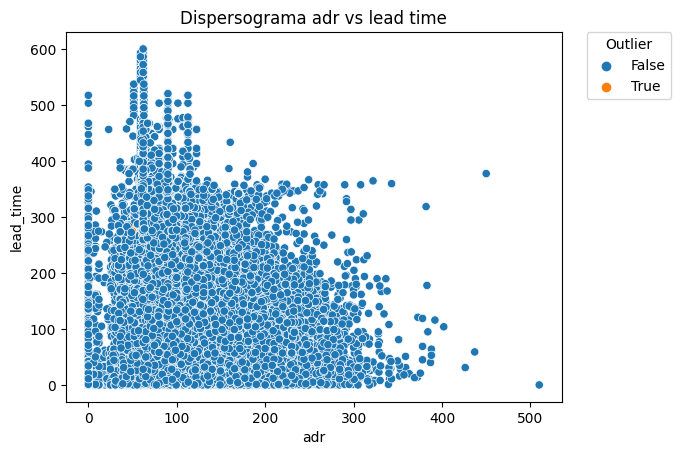

In [230]:
#Grafico scatter
es_outlier = (ds_m['mahalanobis'] > umbral)

sns.scatterplot(x=ds_m.adr,y=ds_m.lead_time, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma adr vs lead time')
plt.show()

In [59]:
ds_hotels_modificado[(ds_hotels_modificado["customer_type"]=="Transient")&(ds_hotels_modificado["adults"]==2)&(ds_hotels_modificado["children"]+ds_hotels_modificado["babies"]==2)&(ds_hotels_modificado["deposit_type"]=="No Deposit")&(ds_hotels_modificado["hotel"]=="Resort Hotel")&(ds_hotels_modificado["arrival_date_month"]=="August")&(ds_hotels_modificado["stays_in_week_nights"]+ds_hotels_modificado["stays_in_weekend_nights"]==8)]['adr'].mean()

286.1666666666667

In [60]:
ds_hotels_modificado.at[8690,'adr']=286.17

In [61]:
ds_hotels_modificado[(ds_hotels_modificado["customer_type"]=="Transient")&(ds_hotels_modificado["adults"]==2)&(ds_hotels_modificado["children"]+ds_hotels_modificado["babies"]==0)&(ds_hotels_modificado["deposit_type"]=="No Deposit")&(ds_hotels_modificado["hotel"]=="Resort Hotel")&(ds_hotels_modificado["arrival_date_month"]=="August")&(ds_hotels_modificado["stays_in_week_nights"]+ds_hotels_modificado["stays_in_weekend_nights"]==14)]

hotel  lead_time  arrival_date_year arrival_date_month  \
904    Resort Hotel        231               2016             August   
1259   Resort Hotel        239               2016             August   
3113   Resort Hotel        352               2017             August   
4518   Resort Hotel        212               2016             August   
6504   Resort Hotel         36               2015             August   
6683   Resort Hotel        358               2017             August   
8848   Resort Hotel        187               2017             August   
12748  Resort Hotel        161               2017             August   
13114  Resort Hotel        175               2017             August   
13947  Resort Hotel        212               2016             August   
16328  Resort Hotel         76               2016             August   
25364  Resort Hotel        291               2016             August   
28004  Resort Hotel        324               2017             August   
29565  Resort Hotel        209               2016             August   
30892  Resort Hotel        181               2017             August   
31453  Resort Hotel         77               2015             August   
32762  Resort Hotel        143               2016             August   
32948  Resort Hotel         85               2015             August   
33357  Resort Hotel        264               2017             August   
34807  Resort Hotel        193               2017             August   
34816  Resort Hotel        212               2016             August   
36125  Resort Hotel        209               2016             August   
37771  Resort Hotel        218               2016             August   
38157  Resort Hotel        194               2016             August   
38998  Resort Hotel        169               2016             August   
41147  Resort Hotel        187               2016             August   
44726  Resort Hotel        367               2016             August   
49492  Resort Hotel        157               2016             August   
50194  Resort Hotel        204               2017             August   
50238  Resort Hotel        378               2017             August   
50363  Resort Hotel        105               2016             August   
50568  Resort Hotel        250               2017             August   
51323  Resort Hotel        227               2016             August   
53042  Resort Hotel        152               2015             August   

       arrival_date_week_number  arrival_date_day_of_month  \
904                          36                         31   
1259                         33                         11   
3113                         31                          1   
4518                         34                         14   
6504                         34                         22   
6683                         31                          1   
8848                         31                          2   
12748                        35                         31   
13114                        31                          3   
13947                        34                         14   
16328                        33                         10   
25364                        36                         30   
28004                        31                          5   
29565                        32                          1   
30892                        34                         26   
31453                        33                         15   
32762                        34                         16   
32948                        33                         12   
33357                        34                         26   
34807                        32                         12   
34816                        34                         14   
36125                        32                          2   
37771                        34                         20   
38157

In [62]:
ds_hotels_modificado[(ds_hotels_modificado["customer_type"]=="Transient")&(ds_hotels_modificado["adults"]==2)&(ds_hotels_modificado["children"]+ds_hotels_modificado["babies"]==0)&(ds_hotels_modificado["deposit_type"]=="No Deposit")&(ds_hotels_modificado["hotel"]=="Resort Hotel")&(ds_hotels_modificado["arrival_date_month"]=="August")&(ds_hotels_modificado["stays_in_week_nights"]+ds_hotels_modificado["stays_in_weekend_nights"]==14)]['adr'].mean()

152.5994117647059

In [64]:
ds_hotels_modificado[(ds_hotels_modificado["customer_type"]=="Transient")&(ds_hotels_modificado["adults"]==2)&(ds_hotels_modificado["children"]+ds_hotels_modificado["babies"]==2)&(ds_hotels_modificado["deposit_type"]=="No Deposit")&(ds_hotels_modificado["hotel"]=="Resort Hotel")&(ds_hotels_modificado["arrival_date_month"]=="August")&(ds_hotels_modificado["stays_in_week_nights"]+ds_hotels_modificado["stays_in_weekend_nights"]==6)]['adr'].mean()

273.4738461538461

In [65]:
ds_hotels_modificado.at[53999,'adr']=273.47

In [63]:
ds_hotels_modificado.at[50238,'adr']=153.6

In [73]:
pred.shape

(61909,)

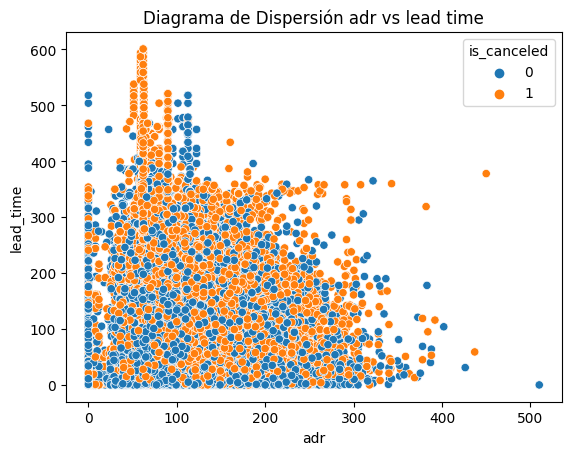

In [229]:
#Grafico dispersograma
color=df['is_canceled']

sns.scatterplot(x=df['adr'],y=df['lead_time'],hue=color)
plt.title('Diagrama de Dispersión adr vs lead time')
plt.show()

In [74]:
ds_hotels_modificado['is_canceled'].shape

(61909,)

## Multivariados 2

Como el otro análisis requiere de mucha memoria se dessarrolló una nueva función

In [44]:
import scipy as sc
def mahal_dists(X):
    sample_X = X.sample(frac=0.1)
    mu = sample_X.mean()
    X_diff = X - mu
    X_diff = X_diff.values.T
    cov = np.cov(sample_X.values.T)
    inv_cov = np.linalg.inv(cov)
    W = sc.linalg.sqrtm(inv_cov)
    Wx = np.matmul(W, X_diff)
    return np.array([np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])])

In [46]:
ds_m=ds_hotels_modificado.copy() #Lo puse aca para que ignores el resto pero cuidado que ya esta

In [59]:
ds_m['mahalanobis']=mahal_dists(ds_m.loc[:,['adr','lead_time']])

<Axes: ylabel='mahalanobis'>

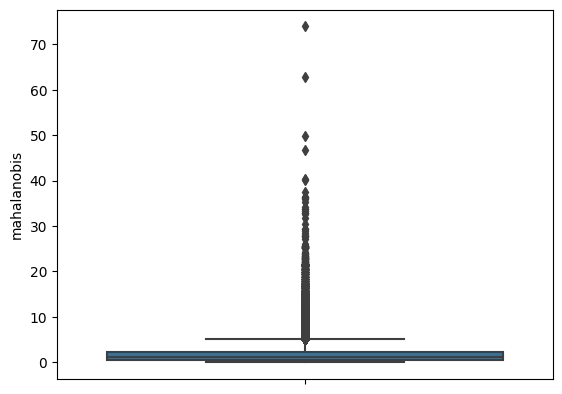

In [60]:
sns.boxplot(y=ds_m.mahalanobis)

In [61]:

np.sort(ds_m.mahalanobis)

array([8.98903402e-05, 2.18909269e-04, 3.00315501e-04, ...,
       4.97730286e+01, 6.26891379e+01, 7.39117326e+01])

In [62]:

#Defino umbral
umbral=45

#Observacione anómalas
ds_m[ds_m['mahalanobis']>umbral]


hotel  lead_time  arrival_date_year arrival_date_month  \
8690   Resort Hotel         31               2017             August   
50238  Resort Hotel        378               2017             August   
53999  Resort Hotel         59               2017             August   
55457    City Hotel          0               2017                May   

       arrival_date_week_number  arrival_date_day_of_month  \
8690                         31                          1   
50238                        31                          1   
53999                        33                         13   
55457                        19                          9   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
8690                         2                     6       2       2.0  ...   
50238                        4                    10       2       0.0  ...   
53999                        2                     4       2       2.0  ...   
55457                        0                     1       1       0.0  ...   

       agent days_in_waiting_list customer_type     adr  \
8690   250.0                    0     Transient  426.25   
50238  314.0                    0     Transient  450.00   
53999  250.0                    0     Transient  437.00   
55457  159.0                    0     Transient  510.00   

      required_car_parking_spaces  total_of_special_requests  \
8690                            0                          2   
50238                           0                          0   
53999                           0                          0   
55457                           0                          0   

       reservation_status_date                                    id  \
8690                2017-08-09  ccc86404-4867-4942-b984-b0a0a56451be   
50238               2016-07-22  3342817f-3e59-40a4-8b8a-8a7ba49e3184   
53999               2017-08-03  f4678f81-0634-4705-95fb-84262ace90fc   
55457               2017-05-10  fe474061-f3b2-4e15-8ba0-672366ab7ef1   

      is_canceled mahalanobis  
8690            0   46.644617  
50238           1   62.689138  
53999           1   49.773029  
55457           0   73.911733  

[4 rows x 32 columns]

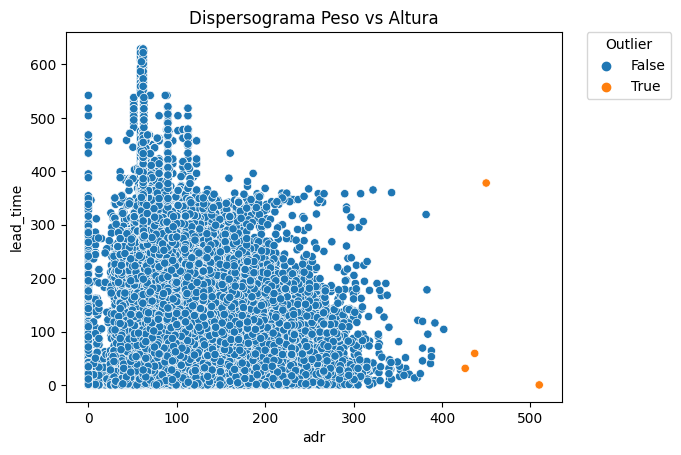

In [63]:
#Grafico scatter
es_outlier = (ds_m['mahalanobis'] > umbral)

sns.scatterplot(x=ds_m.adr,y=ds_m.lead_time, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma Peso vs Altura')
plt.show()

In [65]:
def multivar2(dataFrame,str1,str2):
    dataFrame['mahalanobis']=mahal_dists(dataFrame.loc[:,[str1,str2]])
    sns.boxplot(y=ds_m.mahalanobis)
    plt.show()
    print(np.sort(ds_m.mahalanobis))
    return(dataFrame)

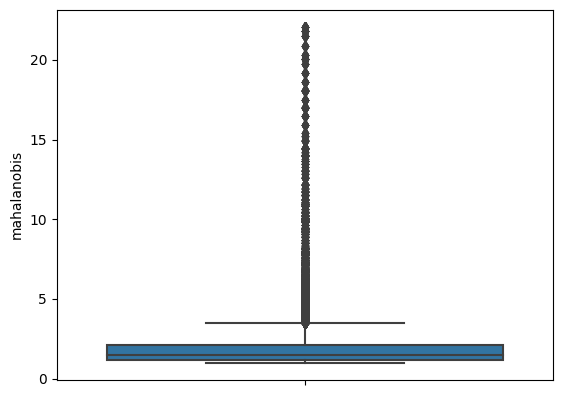

[ 0.98732977  0.98732977  0.98732977 ... 22.0811019  22.0811019
 22.0811019 ]


In [68]:
 #Defino umbral
ds_m=multivar2(ds_m,"lead_time","is_canceled")

In [69]:
umbral=20#lo pones segun lo de arriva

#Observacione anómalas
ds_m[ds_m['mahalanobis']>umbral]

hotel  lead_time  arrival_date_year arrival_date_month  \
576    City Hotel        626               2016           November   
976    City Hotel        608               2017              March   
2623   City Hotel        626               2016           November   
3223   City Hotel        605               2016            October   
3383   City Hotel        605               2016            October   
...           ...        ...                ...                ...   
59862  City Hotel        608               2017              March   
60199  City Hotel        615               2017              March   
60377  City Hotel        629               2017              March   
61120  City Hotel        605               2016            October   
61301  City Hotel        622               2017              March   

       arrival_date_week_number  arrival_date_day_of_month  \
576                          46                          7   
976                          10                          9   
2623                         46                          7   
3223                         43                         17   
3383                         43                         17   
...                         ...                        ...   
59862                        10                          9   
60199                        11                         16   
60377                        13                         30   
61120                        43                         17   
61301                        12                         23   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
576                          1                     2       2       0.0  ...   
976                          0                     2       2       0.0  ...   
2623                         1                     2       2       0.0  ...   
3223                         1                     2       2       0.0  ...   
3383                         1                     2       2       0.0  ...   
...                        ...                   ...     ...       ...  ...   
59862                        0                     2       2       0.0  ...   
60199                        0                     2       2       0.0  ...   
60377                        0                     2       2       0.0  ...   
61120                        1                     2       2       0.0  ...   
61301                        0                     2       2       0.0  ...   

       agent days_in_waiting_list customer_type   adr  \
576      1.0                    0     Transient  62.8   
976      1.0                    0     Transient  62.0   
2623     1.0                    0     Transient  62.8   
3223     1.0                    0     Transient  60.0   
3383     1.0                    0     Transient  60.0   
...      ...                  ...           ...   ...   
59862    1.0                    0     Transient  62.0   
60199    1.0                    0     Transient  62.0   
60377    1.0                    0     Transient  62.0   
61120    1.0                    0     Transient  60.0   
61301    1.0                    0     Transient  62.0   

      required_car_parking_spaces  total_of_special_requests  \
576                             0                          0   
976                             0                          0   
2623                            0                          0   
3223                            0                          0   
3383                            0                          0   
...                           ...                        ...   
59862                           0                          0   
60199                           0                          0   
60377                           0                          0   
61120                           0                          0   
61301                           0                          0   

       reservation_stat

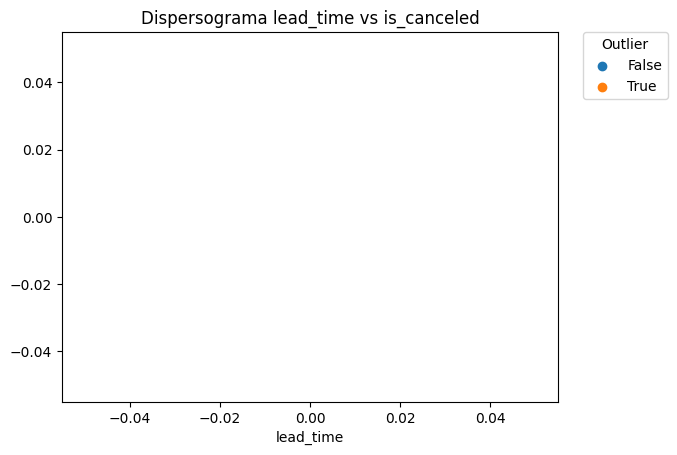

In [116]:
#Grafico scatter
es_outlier = (ds_m['mahalanobis'] > umbral)

sns.scatterplot(x=ds_m.adr,y=ds_m.lead_time, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma lead_time vs is_canceled')
plt.show()

In [204]:
def mah(dataframe, parameter, umbral):
    df=pd.DataFrame
    for i in (dataframe[dataframe['mahalanobis']>umbral].index):
        #print(dataframe.at[i,parameter])
        dataframe.at[i,parameter]=np.round(dataframe[(dataframe["deposit_type"]==dataframe.at[i,"deposit_type"])& (dataframe["adults"]==dataframe.at[i,"adults"])&(dataframe["customer_type"]==dataframe.at[i,"customer_type"])&(ds_hotels_modificado["hotel"]==ds_hotels_modificado.at[i,"hotel"])&(ds_hotels_modificado["arrival_date_month"]==ds_hotels_modificado.at[i,"arrival_date_month"])&(ds_hotels_modificado["stays_in_week_nights"]+ds_hotels_modificado["stays_in_weekend_nights"]==(ds_hotels_modificado.at[i,"stays_in_week_nights"]+ds_hotels_modificado.at[i,"stays_in_weekend_nights"]))&(ds_hotels_modificado["children"]+ds_hotels_modificado["babies"]==(dataframe.at[i,"babies"]+dataframe.at[i,"children"]))][parameter].mean())
        print(dataframe[(dataframe["deposit_type"]==dataframe.at[i,"deposit_type"])& (dataframe["adults"]==dataframe.at[i,"adults"])&(dataframe["customer_type"]==dataframe.at[i,"customer_type"])&(ds_hotels_modificado["hotel"]==ds_hotels_modificado.at[i,"hotel"])&(ds_hotels_modificado["arrival_date_month"]==ds_hotels_modificado.at[i,"arrival_date_month"])&(ds_hotels_modificado["stays_in_week_nights"]+ds_hotels_modificado["stays_in_weekend_nights"]==(ds_hotels_modificado.at[i,"stays_in_week_nights"]+ds_hotels_modificado.at[i,"stays_in_weekend_nights"]))])
    return dataframe

In [75]:
ds_m=mah(ds_m,"lead_time",20)

626
300.0
608
255.0
626
298.0
605
234.0
605
232.0
605
230.0
605
228.0
622
253.0
626
297.0
622
316.0
622
251.0
615
249.0
629
247.0
629
245.0
626
296.0
622
243.0
622
241.0
605
227.0
542
274.0
622
240.0
629
238.0
629
236.0
605
225.0
605
223.0
626
295.0
626
294.0
605
222.0
626
293.0
626
292.0
608
234.0
615
232.0
605
220.0
626
291.0
608
230.0
608
228.0
622
226.0
608
224.0
605
218.0
608
287.0
542
273.0
629
253.0
542
269.0
622
222.0
608
220.0
542
265.0
542
260.0
605
216.0
626
290.0
626
289.0
622
218.0
629
216.0
542
256.0
605
215.0
615
214.0
605
213.0
605
211.0
605
209.0
615
212.0
626
288.0
629
210.0
629
207.0
605
207.0
626
286.0
626
285.0
615
217.0
622
205.0
622
203.0
622
201.0
629
199.0
615
197.0
605
206.0
622
176.0
629
195.0
605
204.0
615
192.0
605
202.0
622
190.0
605
200.0
605
198.0
608
188.0
605
196.0
626
284.0
626
283.0
626
282.0
542
251.0
629
186.0
542
246.0
629
184.0
626
281.0
626
280.0
615
181.0
615
179.0
629
177.0
608
175.0
608
172.0
615
170.0
629
168.0
605
195.0
622
166.0


In [76]:
ds_hotels_modificado.loc[:,'lead_time']=ds_m.loc[:,'lead_time']

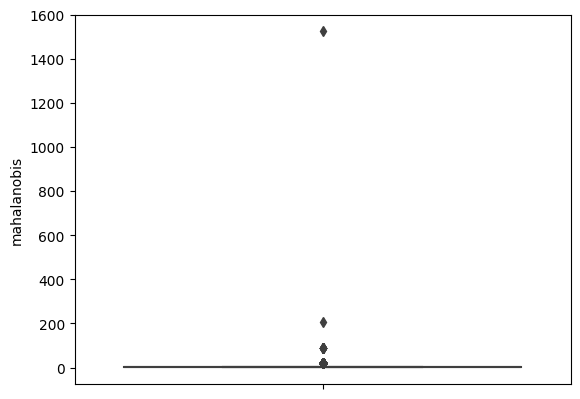

[9.68365022e-01 9.68365022e-01 9.68365022e-01 ... 8.98502679e+01
 2.07220642e+02 1.52467911e+03]


In [112]:
 #Defino umbral
ds_m=multivar2(ds_m,"required_car_parking_spaces","is_canceled")


In [113]:
umbral=80#lo pones segun lo de arriva

#Observacione anómalas
ds_m[ds_m['mahalanobis']>umbral]

hotel  lead_time  arrival_date_year arrival_date_month  \
621      City Hotel          1               2017               July   
2168   Resort Hotel        223               2016                May   
8269   Resort Hotel        138               2017              March   
9683   Resort Hotel         32               2016             August   
11056  Resort Hotel          0               2017            January   
11820  Resort Hotel         36               2016              March   
13713  Resort Hotel        205               2017               June   
14389  Resort Hotel         44               2015               July   
22088  Resort Hotel        225               2016                May   
38630  Resort Hotel          5               2017           February   
42626  Resort Hotel        169               2016              March   
51267  Resort Hotel        180               2016             August   
53938  Resort Hotel         37               2017                May   
55501  Resort Hotel         15               2017            January   

       arrival_date_week_number  arrival_date_day_of_month  \
621                          28                         13   
2168                         22                         24   
8269                         12                         19   
9683                         36                         30   
11056                         5                         29   
11820                        11                         10   
13713                        26                         26   
14389                        28                          5   
22088                        22                         26   
38630                         9                         28   
42626                        14                         31   
51267                        32                          1   
53938                        22                         28   
55501                         1                          6   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
621                          0                     1       3       0.0  ...   
2168                         1                     5       2       0.0  ...   
8269                         2                     2       2       0.0  ...   
9683                         0                     1       3       1.0  ...   
11056                        1                     0       2       2.0  ...   
11820                        2                     5       2       0.0  ...   
13713                        3                    10       2       0.0  ...   
14389                        2                     0       3       0.0  ...   
22088                        2                     3       2       0.0  ...   
38630                        1                     5       2       0.0  ...   
42626                        1                     3       2       0.0  ...   
51267                        1                     4       2       1.0  ...   
53938                        2                     1       2       0.0  ...   
55501                        0                     2       2       0.0  ...   

       agent days_in_waiting_list    customer_type     adr  \
621     14.0                    0        Transient  283.00   
2168     0.0                    0  Transient-Party   52.00   
8269     0.0                  122  Transient-Party   80.00   
9683   240.0                    0        Transient  274.00   
11056    0.0                    0  Transient-Party   85.00   
11820  240.0                    0        Transient   59.14   
13713  250.0                    0        Transient  111.00   
14389  240.0                    0        Transient  225.00   
22088    0.0                    0  Transient-Party   80.00   
38630    0.0                    0  Transient-Party   47.50   
42626    0.0                    0  Transient-Party   78.00   
51267  241.0                    0        Transient  187.80   
53938  242

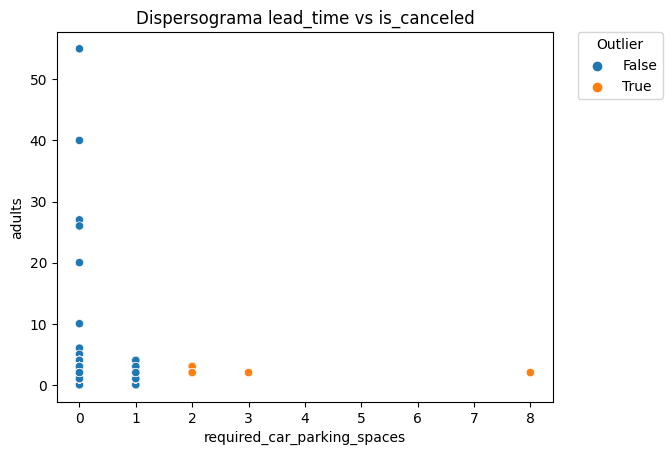

In [119]:
#Grafico scatter
es_outlier = (ds_m['mahalanobis'] > umbral)

sns.scatterplot(x=ds_m.required_car_parking_spaces,y=ds_m.adults, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma lead_time vs is_canceled')
plt.show()

In [120]:
ds_m=mah(ds_m,"required_car_parking_spaces",umbral)

In [121]:
ds_hotels_modificado.loc[:,'required_car_parking_spaces']=ds_m.loc[:,'required_car_parking_spaces']

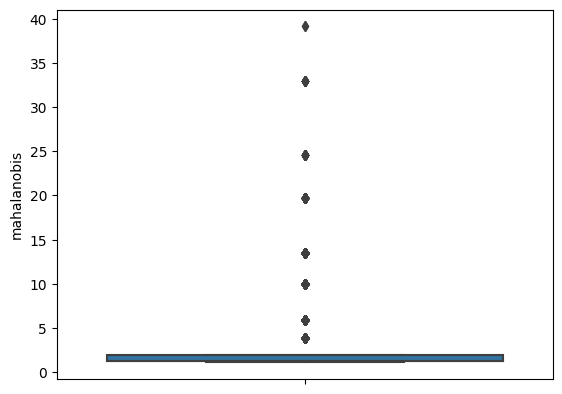

[ 1.10832174  1.10832174  1.10832174 ... 32.90919874 39.14591485
 39.14591485]


In [149]:
 #Defino umbral
ds_m=multivar2(ds_m,"total_of_special_requests","is_canceled")


In [150]:
umbral=30#lo pones segun lo de arriva

#Observacione anómalas
ds_m[ds_m['mahalanobis']>umbral]

hotel  lead_time  arrival_date_year arrival_date_month  \
2317   Resort Hotel         76               2016                May   
9779   Resort Hotel         24               2017              March   
11860  Resort Hotel        178               2017             August   
18018    City Hotel        120               2017              April   
22688    City Hotel        219               2017               July   
23833    City Hotel         46               2016           November   
29832    City Hotel         51               2017               June   
30911    City Hotel        207               2017               June   
31861    City Hotel         23               2016           November   
44767    City Hotel        125               2016          September   
48519    City Hotel         30               2015            October   
49978    City Hotel         26               2016            October   
51200    City Hotel        201               2017                May   
52212    City Hotel         54               2016          September   
57367    City Hotel         30               2015            October   
57471    City Hotel        205               2017             August   
57969  Resort Hotel         22               2015               July   
59322  Resort Hotel        231               2017             August   
60468  Resort Hotel         39               2016             August   
61129    City Hotel        105               2016          September   

       arrival_date_week_number  arrival_date_day_of_month  \
2317                         21                         20   
9779                         13                         29   
11860                        33                         14   
18018                        16                         17   
22688                        28                         14   
23833                        47                         18   
29832                        23                          9   
30911                        25                         24   
31861                        46                         11   
44767                        37                          4   
48519                        42                         14   
49978                        43                         17   
51200                        20                         14   
52212                        37                         10   
57367                        42                         14   
57471                        35                         29   
57969                        28                          9   
59322                        31                          2   
60468                        36                         30   
61129                        40                         29   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
2317                         2                     5       2       2.0  ...   
9779                         0                     2       2       0.0  ...   
11860                        1                     5       2       1.0  ...   
18018                        1                     4       2       0.0  ...   
22688                        2                     5       3       0.0  ...   
23833                        2                     3       2       0.0  ...   
29832                        2                     3       2       0.0  ...   
30911                        2                     2       2       0.0  ...   
31861                        1                     2       2       0.0  ...   
44767                        4                     6       2       0.0  ...   
48519                        0                     3       2       0.0  ...   
49978                        1                     2       2       0.0  ...   
51200                        2                     2       2       0.0  ...   
52212                        1                     1       2       1.0  ...   
57367        

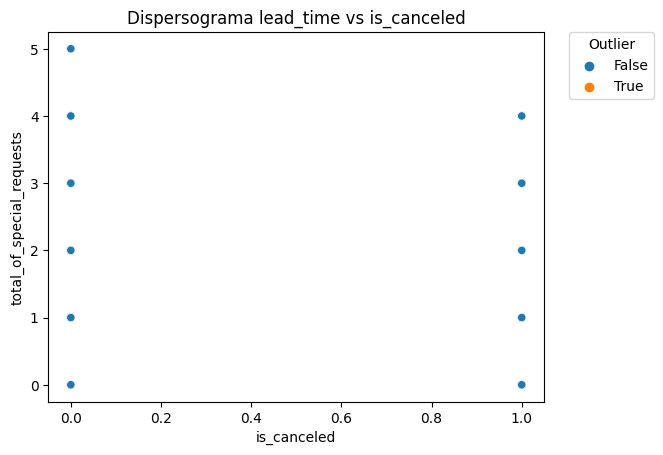

In [202]:
#Grafico scatter
es_outlier = (ds_m['mahalanobis'] > umbral)

sns.scatterplot(x=ds_m.is_canceled,y=ds_m.total_of_special_requests, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma lead_time vs is_canceled')
plt.show()

In [153]:
ds_m=mah(ds_m,"total_of_special_requests",umbral)

In [154]:
ds_hotels_modificado.loc[:,'total_of_special_requests']=ds_m.loc[:,'total_of_special_requests']

# Árbol

In [178]:
ds_trabajo=ds_hotels_modificado.copy()

In [179]:
ds_ting=ds_hotels_modificado2.copy()

El siguiente gráfico muestra las ctegorías que más pesan sobre otras. En este caso para nosotros es solo de interés la última fila donde se muestran el efecto sobre las cancelaciones

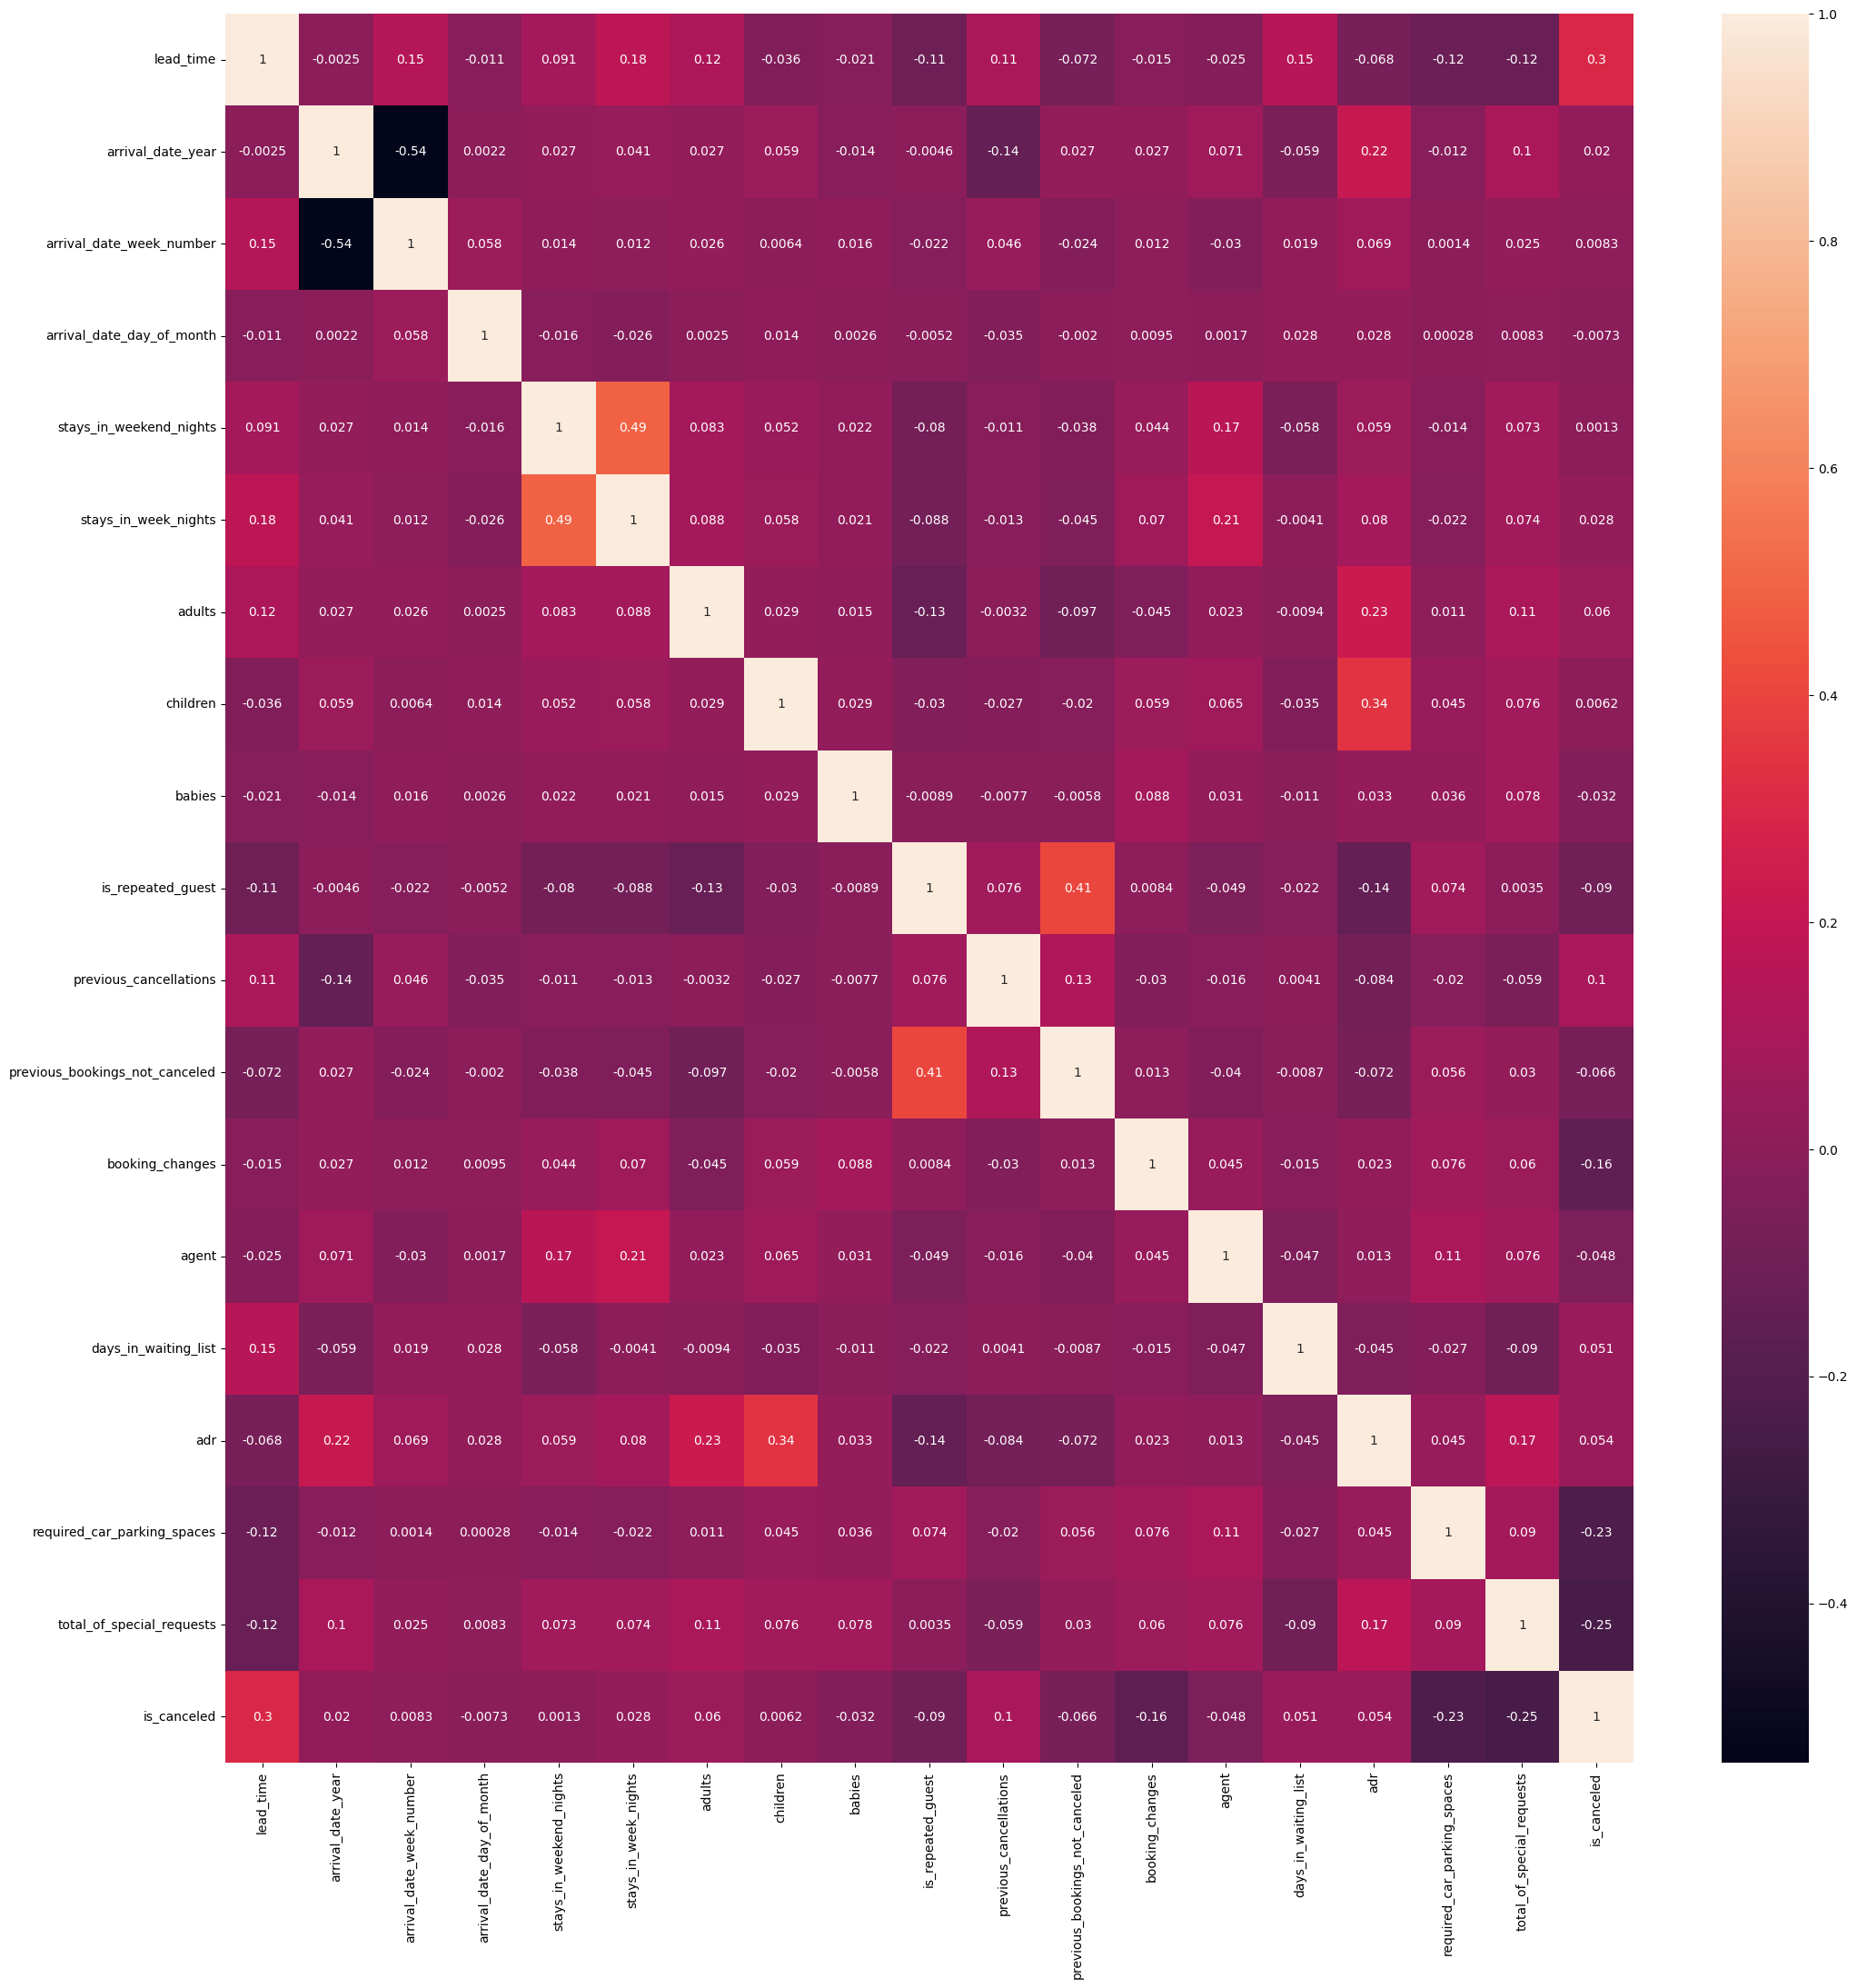

In [230]:
matriz_correlacion=ds_trabajo.corr()

plt.figure(figsize=(25,25))
sns.heatmap(matriz_correlacion, annot = True)
plt.show()

In [180]:
target='is_canceled'

In [181]:
ds_trabajo[target].value_counts(normalize=True)*100

0    50.028267
1    49.971733
Name: is_canceled, dtype: float64

In [182]:
filas_totales=ds_trabajo.shape[0]
print(ds_trabajo.isna().sum()/filas_totales*100)

hotel                             0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr                               0.0
required_car

Se chequean las columas que se deben modificar según su tipo de dato para poder hacer el análisis de forma más extensa

In [198]:
ds_trabajo.dtypes

hotel                              object
lead_time                         float64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
days_in_waiting_list              

Se deciden eliminar las columnas id (ya que es particular para cada caso), countru (por la cantidad de datos faltantes) y reservation date (para no hacer trampa). El resto se la modifica a valores numéricos de ser posible o se la divide en distintas columnas binarias de no serlo.

In [183]:
columnas_eliminar_NANs=['id']
ds_trabajo.drop(columnas_eliminar_NANs, axis='columns', inplace=True)

In [184]:
columnas_eliminar_NANs=['reservation_status_date','country']
ds_trabajo.drop(columnas_eliminar_NANs, axis='columns', inplace=True)

In [185]:
ds_trabajo.loc[:,"hotel"].replace(to_replace=["Resort Hotel","City Hotel"],value=[0,1],inplace=True)

In [186]:
ds_trabajo.loc[:,"reserved_room_type"].replace(to_replace=["A","B","C","D","E","F","G","H","I","K","L","P"],value=[1,2,3,4,5,6,7,8,9,11,12,16],inplace=True)

In [187]:
ds_trabajo.loc[:,"assigned_room_type"].replace(to_replace=["A","B","C","D","E","F","G","H","I","K","L","P"],value=[1,2,3,4,5,6,7,8,9,11,12,16],inplace=True)

In [188]:
#One hot encoding para variables categoricas
ds_trabajo = pd.get_dummies(ds_trabajo, columns=["deposit_type","customer_type","meal","market_segment","distribution_channel"], drop_first=True)
ds_trabajo.head()

hotel  lead_time  arrival_date_year arrival_date_month  \
0      1         49               2016          September   
1      0          4               2015            October   
2      1         25               2016            October   
3      1         26               2016           December   
4      1        104               2017              March   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        37                          5   
1                        44                         31   
2                        42                         13   
3                        51                         12   
4                        12                         19   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                        1                     2       1       0.0  ...   
1                        0                     1       2       0.0  ...   
2                        0                     1       2       2.0  ...   
3                        2                     5       2       0.0  ...   
4                        2                     5       2       0.0  ...   

   meal_SC  market_segment_Complementary  market_segment_Corporate  \
0        0                             0                         0   
1        0                             0                         0   
2        0                             0                         0   
3        0                             0                         0   
4        0                             0                         0   

   market_segment_Direct  market_segment_Groups  market_segment_Offline TA/TO  \
0                      0                      0                             0   
1                      0                      1                             0   
2                      0                      0                             0   
3                      0                      1                             0   
4                      0                      0                             1   

   market_segment_Online TA  distribution_channel_Direct  \
0                         1                            0   
1                         0                            1   
2                         1                            0   
3                         0                            0   
4                         0                            0   

   distribution_channel_GDS  distribution_channel_TA/TO  
0                         0                           1  
1                         0                           0  
2                         0                           1  
3                         0                           1  
4                         0                           1  

[5 rows x 40 columns]

In [189]:

ds_trabajo.loc[:,"arrival_date_month"].replace(to_replace=["January","February","March","April","May","June","July","August","September",
 'October','November','December'],value=[1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)

Se deja a la base de datos para predecir cancelaciones en iguales condiciones que sobre la que se testea

In [190]:
ds_ting.loc[:,"arrival_date_month"].replace(to_replace=["January","February","March","April","May","June","July","August","September",
 'October','November','December'],value=[1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)
ds_ting = pd.get_dummies(ds_ting, columns=["deposit_type","customer_type","meal","market_segment","distribution_channel"], drop_first=True)
ds_ting.loc[:,"hotel"].replace(to_replace=["Resort Hotel","City Hotel"],value=[0,1],inplace=True)
columnas_eliminar_NANs=['reservation_status_date','country','id']
ds_ting.drop(columnas_eliminar_NANs, axis='columns', inplace=True)
ds_ting.loc[:,"reserved_room_type"].replace(to_replace=["A","B","C","D","E","F","G","H","I","K","L","P"],value=[1,2,3,4,5,6,7,8,9,11,12,16],inplace=True)
ds_ting.loc[:,"assigned_room_type"].replace(to_replace=["A","B","C","D","E","F","G","H","I","K","L","P"],value=[1,2,3,4,5,6,7,8,9,11,12,16],inplace=True)

Se hace un primer arbol de predicciones de tipo isolation forest, más sencillo

In [191]:
from sklearn.ensemble import IsolationForest

In [192]:
#Creo un dataset con los features que voy a usar para clasificar
ds_trabajo_x=ds_trabajo.drop(['is_canceled'], axis='columns', inplace=False)

#Creo un dataset con la variable target
ds_trabajo_y = ds_trabajo['is_canceled'].copy()

In [93]:
X,y = ds_trabajo_x,ds_trabajo_y
df = ds_trabajo
df.head()

hotel  lead_time  arrival_date_year  arrival_date_month  \
0      1         49               2016                   9   
1      0          4               2015                  10   
2      1         25               2016                  10   
3      1         26               2016                  12   
4      1        104               2017                   3   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        37                          5   
1                        44                         31   
2                        42                         13   
3                        51                         12   
4                        12                         19   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                        1                     2       1       0.0  ...   
1                        0                     1       2       0.0  ...   
2                        0                     1       2       2.0  ...   
3                        2                     5       2       0.0  ...   
4                        2                     5       2       0.0  ...   

   meal_SC  market_segment_Complementary  market_segment_Corporate  \
0        0                             0                         0   
1        0                             0                         0   
2        0                             0                         0   
3        0                             0                         0   
4        0                             0                         0   

   market_segment_Direct  market_segment_Groups  market_segment_Offline TA/TO  \
0                      0                      0                             0   
1                      0                      1                             0   
2                      0                      0                             0   
3                      0                      1                             0   
4                      0                      0                             1   

   market_segment_Online TA  distribution_channel_Direct  \
0                         1                            0   
1                         0                            1   
2                         1                            0   
3                         0                            0   
4                         0                            0   

   distribution_channel_GDS  distribution_channel_TA/TO  
0                         0                           1  
1                         0                           0  
2                         0                           1  
3                         0                           1  
4                         0                           1  

[5 rows x 40 columns]

In [94]:
#Creo el modelo
iforest = IsolationForest(n_estimators=1000, max_samples=0.3, 
                          contamination=0.0002, max_features=39, 
                          bootstrap=False, n_jobs=-1, random_state=1)

In [96]:
#Entreno y genero la predicción
pred= iforest.fit_predict(X)

In [97]:
#Calculo las métricas en el conjunto de evaluación
accuracy=accuracy_score(ds_hotels_modificado['is_canceled'],pred)


print("Accuracy: "+str(accuracy))

Accuracy: 0.4996688688235959


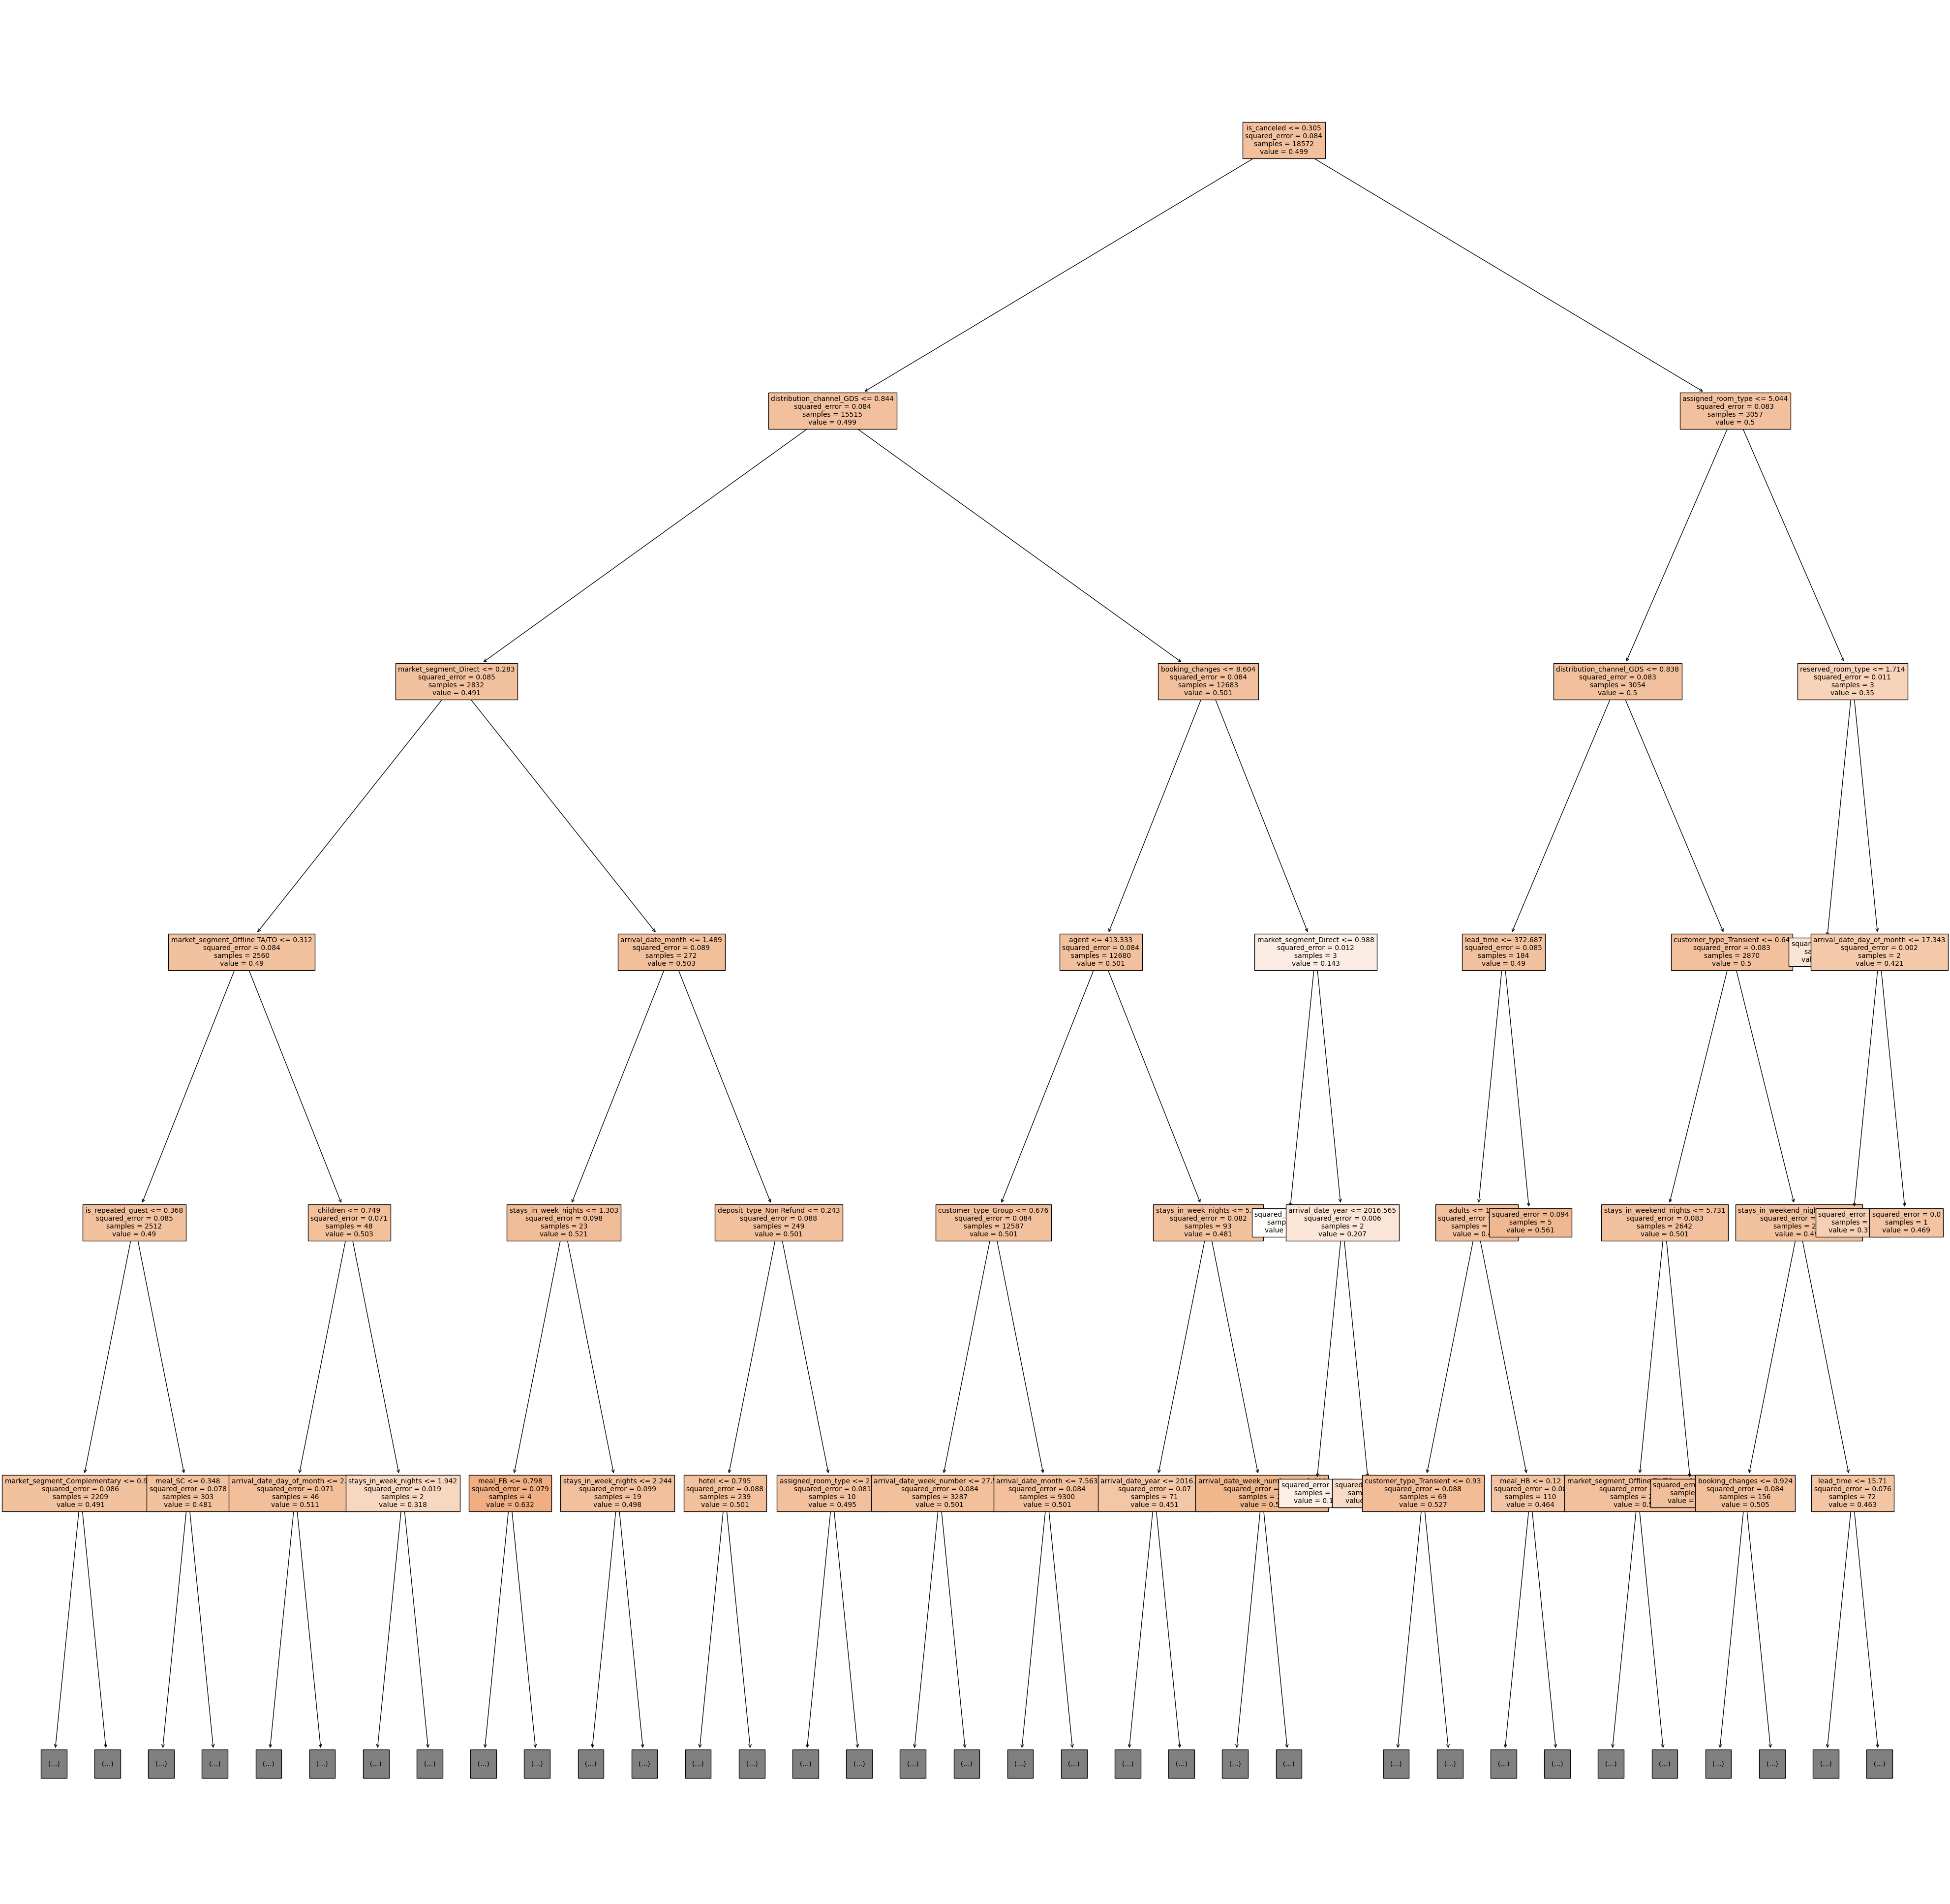

In [167]:
#Selecciono el árbol
estimator = iforest.estimators_[5]

#Grafico
plt.figure(figsize=(50,50))
sk.tree.plot_tree(estimator,feature_names=df.columns,filled=True,max_depth=5,fontsize=10)
plt.show()

In [ ]:
#Almaceno scores y etiquetas
df['scores']=iforest.decision_function(X)
df['outlier_label']=pred

#Observaciones anómalas
df[df.outlier_label==-1]

hotel  lead_time  arrival_date_year  arrival_date_month  \
525        0        157               2016                   8   
5445       0         33               2017                   8   
8269       0        138               2017                   3   
11056      0          0               2017                   1   
35054      0        211               2017                   6   
41367      1          0               2016                  11   
45150      0        280               2015                  10   
45355      1          0               2016                  12   
45431      0          1               2017                   3   
46794      0        112               2015                  12   
50375      0        275               2016                   4   
59161      0        338               2015                  10   
59385      1          0               2015                   8   

       arrival_date_week_number  arrival_date_day_of_month  \
525                          33                         12   
5445                         33                         18   
8269                         12                         19   
11056                         5                         29   
35054                        25                         22   
41367                        47                         17   
45150                        41                          9   
45355                        50                          6   
45431                        10                          9   
46794                        53                         30   
50375                        16                         10   
59161                        41                          4   
59385                        33                         11   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
525                          4                     9       2       0.0  ...   
5445                         1                     2       2       2.0  ...   
8269                         2                     2       2       0.0  ...   
11056                        1                     0       2       2.0  ...   
35054                        2                     7       2       0.0  ...   
41367                        4                    11       0       0.0  ...   
45150                        3                     7       1       0.0  ...   
45355                        0                     0       0       0.0  ...   
45431                        0                     1       1       1.0  ...   
46794                        0                     3       2       0.0  ...   
50375                        6                    11       2       0.0  ...   
59161                        2                     0      55       0.0  ...   
59385                        2                    10       0       0.0  ...   

       market_segment_Corporate  market_segment_Direct  market_segment_Groups  \
525                           0                      1                      0   
5445                          0                      0                      0   
8269                          0                      1                      0   
11056                         0                      1                      0   
35054                         0                      1                      0   
41367                         1                      0                      0   
45150                         0                      0                      1   
45355                         0                      0                      0   
45431                         0                      1                      0   
46794                         0                      0                      1   
50375                         0                      0                      1   
59161                         0                      1                      0   
59385                         1                      

In [ ]:
#Cantidad de obs. anómalas
df.outlier_label.value_counts()

 1    58813
-1     3096
Name: outlier_label, dtype: int64

In [ ]:
#Grafico dispersograma
df['outlier_label'].values

array([1, 1, 1, ..., 1, 1, 1])

In [99]:
features=ds_ting.columns.tolist()

In [193]:


#Genero los conjuntos de train y de test
x_train, x_test, y_train, y_test = train_test_split(ds_trabajo_x,
                                                    ds_trabajo_y, 
                                                    test_size=0.3, 
                                                    random_state=1) #semilla)

In [168]:
#Genero los conjuntos de train y de test
x_train, x_test, y_train, y_test = train_test_split(ds_trabajo_x,
                                                    ds_trabajo_y, 
                                                    test_size=0.3, 
                                                    random_state=0,
                                                    stratify=ds_trabajo_y.values) #semilla) 

In [76]:
y_test.shape

(18573,)

In [ ]:
import pickle

Se crea un segundo arbol con los clasificaciones que se creen mejores

In [213]:
#Creamos un clasificador con hiperparámetros 
tree_model = tree.DecisionTreeClassifier(criterion="entropy",
                                            max_depth = 18,
                                            ccp_alpha=0.0001)
#Entrenamos el modelo
model = tree_model.fit(X = x_train, y = y_train)
filename = 'modelentropy.sav'
pickle.dump(model, open(filename, 'wb'))

Sobre este es el que se evalúa de forma más rápida con los datos de mejores predicciones obtenidos a continuación

In [260]:
#Creamos un clasificador con hiperparámetros 22, 'criterion': 'gini', 'ccp_alpha': 7.692307692307693e-05}
tree_model = tree.DecisionTreeClassifier(criterion="gini",
                                            max_depth = 22,
                                            ccp_alpha= 7.692307692307693e-05)
#Entrenamos el modelo
model = tree_model.fit(X = x_train, y = y_train)


In [220]:
# save the model to disk
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

In [261]:
#Realizamos una predicción sobre el set de test
y_pred = model.predict(x_test)
#Valores Predichos
y_pred

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [262]:
#Calculo las métricas en el conjunto de evaluación
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred,)
precision=precision_score(y_test,y_pred)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("Precision: "+str(precision))
print("f1 score: "+str(f1))

Accuracy: 0.81893070586335
Recall: 0.8088568042236828
Precision: 0.8253078276165348
f1 score: 0.8169995102573869


F1-Score: 0.8134924980834519


Text(50.722222222222214, 0.5, 'True')

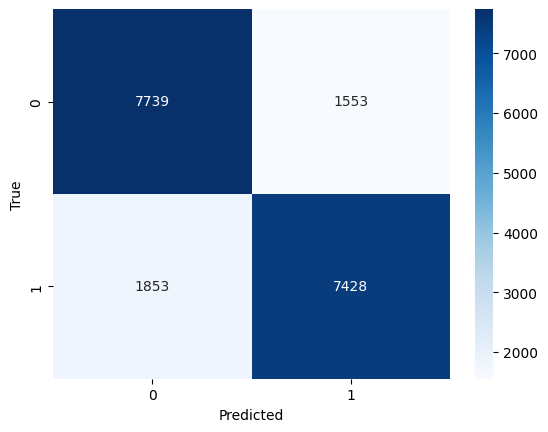

In [141]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score

#Hago predicción sobre el set de evaluacion
y_pred= model.predict(x_test)

#Arbol Reporte y Matriz de Confusion
#print(classification_report(y_test,y_pred))
print('F1-Score: {}'.format(f1_score(y_test, y_pred))) #, average='binary'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [266]:
y_pr=model.predict(ds_ting)

In [267]:
submition=pd.DataFrame(y_pr)
submition.rename(columns={0: "is_canceled"})

is_canceled
0                1
1                1
2                0
3                1
4                1
...            ...
26530            0
26531            0
26532            1
26533            0
26534            0

[26535 rows x 1 columns]

In [268]:
submition1 = pd.DataFrame(ds_hotels_modificado2['id'])

In [269]:
submition1["is_canceled"]= submition

In [270]:
submition1.to_csv('subMA.csv', index=False)

In [133]:
ds_trabajo[features].values.shape

(61909, 39)

In [132]:
ds_ting[features].values

array([[1.000e+00, 2.770e+02, 2.016e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.000e+00, 2.860e+02, 2.016e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.000e+00, 0.000e+00, 2.016e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [0.000e+00, 4.500e+01, 2.016e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.000e+00, 1.640e+02, 2.017e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [0.000e+00, 1.360e+02, 2.016e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

In [214]:

from sklearn.model_selection import train_test_split

ds_trabajo_x=ds_trabajo.drop(['is_canceled'], axis='columns', inplace=False)

ds_trabajo_y = ds_trabajo['is_canceled'].copy()
x_train, x_test, y_train, y_test = train_test_split(ds_trabajo[features].values, 
                                                    ds_trabajo[target].values, 
                                                    test_size=0.3,    
                                                    random_state=0, 
                                                    stratify=ds_trabajo[target].values) #estratificado para mantener proporcion

#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 43336
# Datos Prueba: 18573
% Positivos Entrenamiento: 49.972
% Positivos Prueba: 49.970


Búsqueda de mejor árbol

El número de folds es el mejor pada dividir y testear los datos. Al ser bastante la cantidad de estos,pero no un montón se sabía que debía ser mayor a 5 y 10, se analizaro todos los casos y se quedó con el que daba mejor resultados

In [272]:
##KFOLD CV Random Search para buscar el mejor arbol (los mejores atributos, hiperparametros,etc)
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

#Cantidad de combinaciones que quiero porbar
n=40 

#Conjunto de parámetros que quiero usar
params_grid = {'criterion':['gini','entropy'],
               'ccp_alpha':np.linspace(0,0.0002,n), 
               'max_depth':list(range(1,25))}
                
#Cantidad de splits para el Cross Validation
folds=7

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
base_tree = DecisionTreeClassifier() 

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(sk.metrics.f1_score)

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n) 

#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train,y_train);
model = tree_model.fit(X = x_train, y = y_train)
filename = 'modelMejorArbol.sav'
pickle.dump(model, open(filename, 'wb'))


In [273]:
#Mejores hiperparametros del arbol
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_)

{'max_depth': 24, 'criterion': 'gini', 'ccp_alpha': 7.692307692307693e-05}
0.8113416006642102


In [274]:
#Atributos considerados y su importancia
best_tree = randomcv.best_estimator_
feat_imps = best_tree.feature_importances_

for feat_imp,feat in sorted(zip(feat_imps,features)):
  if feat_imp>0:
    print('{}: {}'.format(feat,feat_imp))

is_repeated_guest: 0.00025193035157375945
distribution_channel_Direct: 0.0005057061837675822
market_segment_Corporate: 0.0008798112009362649
meal_FB: 0.0009311218365178888
distribution_channel_TA/TO: 0.0011027344390142745
meal_SC: 0.0013135279604263004
market_segment_Direct: 0.0015603533445302214
children: 0.0021559590349948016
hotel: 0.002251110966454514
days_in_waiting_list: 0.0023948791405236005
meal_HB: 0.003020481630294897
market_segment_Offline TA/TO: 0.003086465564241906
adults: 0.003572484569589281
market_segment_Groups: 0.0036237140534000596
arrival_date_month: 0.0043364556144592555
previous_bookings_not_canceled: 0.005434873368848515
stays_in_weekend_nights: 0.005576060213359756
reserved_room_type: 0.00929097753727971
customer_type_Transient: 0.01110314175111505
stays_in_week_nights: 0.011777914333909038
arrival_date_year: 0.015082545864871325
booking_changes: 0.015649069911182898
assigned_room_type: 0.015981423672693475
arrival_date_day_of_month: 0.017220530731959338
custome

F1-Score: 0.8161288567230778


Text(50.722222222222214, 0.5, 'True')

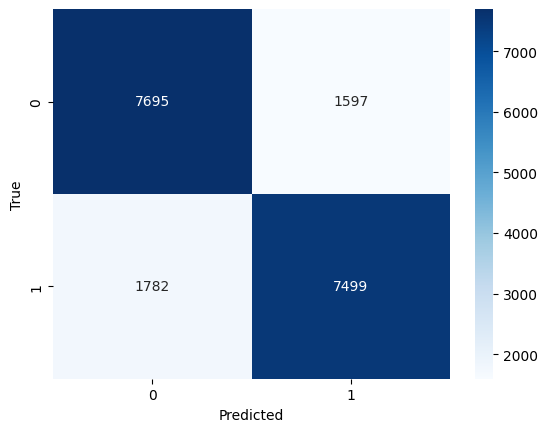

In [276]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score

y_pred= arbol.predict(x_test)

print('F1-Score: {}'.format(f1_score(y_test, y_pred), average='binary'))

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

### Gráfico Mejor Árbol

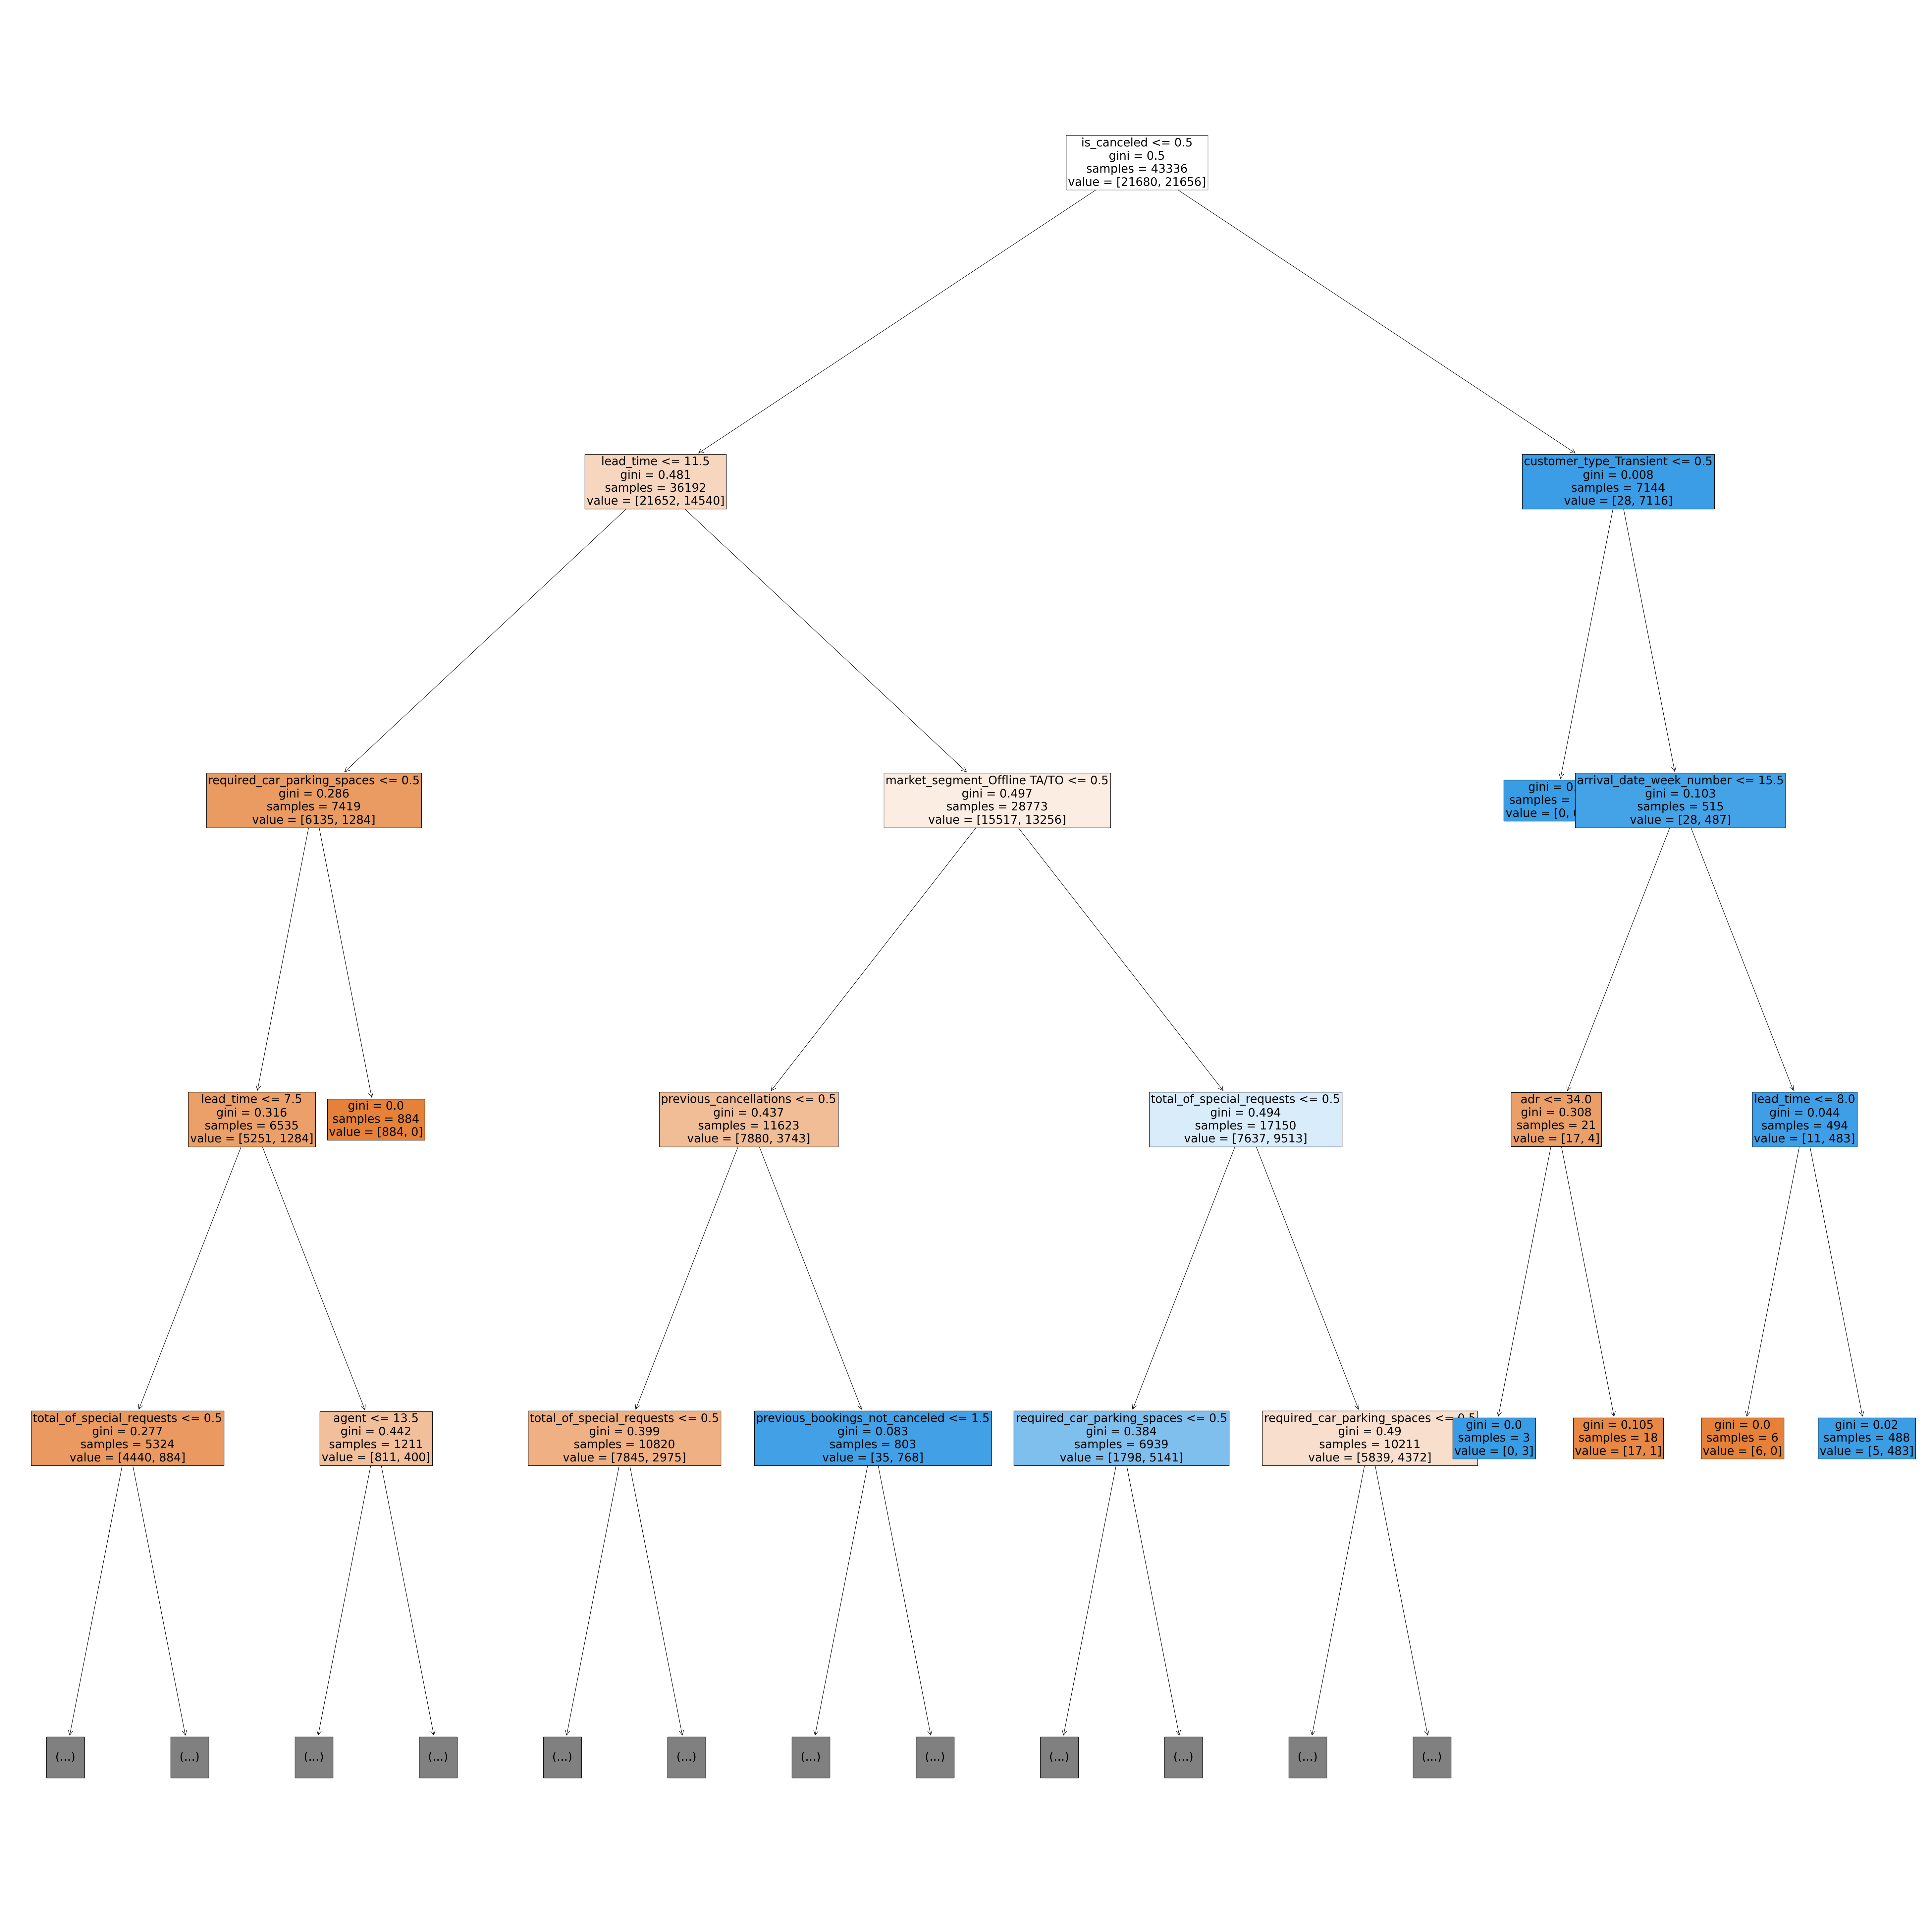

In [284]:
#Grafico Mejor Arbol
plt.figure(figsize=(75,75))
sk.tree.plot_tree(arbol,feature_names=df.columns,filled=True,max_depth=4,fontsize=25)
plt.show()

Como no es posible graficar todo el arbol de forma visual eficiente se enumeran las reglas de dicho arbol a continuación

In [285]:
#Creo el árbol con los mejores hiperparámetros
from sklearn.tree import export_text

arbol=DecisionTreeClassifier().set_params(**randomcv.best_params_)

#Entreno el arbol en todo el set
arbol.fit(x_train,y_train)

reglas = export_text(arbol, feature_names=list(features))
print(reglas)

|--- deposit_type_Non Refund <= 0.50
|   |--- lead_time <= 11.50
|   |   |--- required_car_parking_spaces <= 0.50
|   |   |   |--- lead_time <= 7.50
|   |   |   |   |--- total_of_special_requests <= 0.50
|   |   |   |   |   |--- booking_changes <= 0.50
|   |   |   |   |   |   |--- hotel <= 0.50
|   |   |   |   |   |   |   |--- adr <= 104.00
|   |   |   |   |   |   |   |   |--- adr <= 24.00
|   |   |   |   |   |   |   |   |   |--- adr <= 2.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- adr >  2.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- adr >  24.00
|   |   |   |   |   |   |   |   |   |--- lead_time <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- lead_time >  1.50
|   |   |   |   |   |   |   |   |   |   |--- market_segment_Offline TA/TO <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   

In [701]:
y_p=arbol.predict(ds_ting)

In [224]:
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred,)
precision=precision_score(y_test,y_pred)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("Precision: "+str(precision))
print("f1 score: "+str(f1))

Accuracy: 0.8172077747267539
Recall: 0.8044391768128435
Precision: 0.8253371655980544
f1 score: 0.8147541878103345


In [650]:
y_p

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [703]:
sub = pd.DataFrame(ds_hotels_modificado2['id'])

In [704]:
submition=pd.DataFrame(y_p)
submition.rename(columns={0: "is_canceled"})

is_canceled
0                1
1                1
2                0
3                1
4                1
...            ...
26530            1
26531            0
26532            1
26533            0
26534            0

[26535 rows x 1 columns]

In [705]:
sub["is_canceled"]= submition
sub

id  is_canceled
0      e6d0d58a-ab96-44d3-b28f-85df1cc15f1e            1
1      aba9aac2-4495-4645-a60e-90328713c999            1
2      b345b5dc-c804-4d77-a39f-1f4e65d1f1ad            0
3      ce1b400e-afa1-4946-bdff-004b859eb61c            1
4      c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214            1
...                                     ...          ...
26530  636ccded-66ad-4538-8006-c0b9f84c6256            1
26531  11e19741-bd28-4459-8ea3-184f1664000f            0
26532  36a4c7b0-d6b1-4528-93db-311be96ec1c6            1
26533  89c85fa5-2b3d-4131-844c-e151a65ca240            0
26534  bd4e9eee-f28e-4a53-b4a1-277426efbcee            0

[26535 rows x 2 columns]

Guardado de predicciones

In [706]:
sub.to_csv('submacsv', index=False)